<a href="https://colab.research.google.com/github/kbpoz/airbnb-prague/blob/main/airbnb_Prague_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analiza zbioru danych dotyczącego wynajmu lokali w Pradze poprzez platformę Airbnb

## 1. Zaimportowanie potrzebnych bibliotek i analizowanego zbioru danych

In [ ]:
!pip install pandas==1.5.2 #instalacja nowszej wersji pandas
!pip install sweetviz -qq
##!pip install pandas-profiling==3.6.2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 42.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 40.3 MB/s eta 0:00:00


In [ ]:
#załadowanie danych do ramki
df = pd.read_csv('http://data.insideairbnb.com/czech-republic/prague/prague/2022-12-23/data/listings.csv.gz')

## 2. Wyświetlenie podstawowych informacji o zbiorze
### Możemy zauważyć, że zbiór listings.csv dotyczący Pragi zawiera 7940 obserwacji i 75 kolumn - zmiennych które je opisują. Jest to niewielki zbiór stąd też sama analiza nie powinna zająć zbyt dużo czasu, najbardziej czasochłonne będzie odpowiednie opracowanie zmiennych.

### Zbiór zawiera 18 kolumn typu float64, 23 typu int64,  oraz 34 typu object.

### Dzięki bibliotece sweetviz możemy łatwo przejść przez wszystkie kolumny i zweryfikować z jakiego typu danymi mamy do czynienia, ile występuje nulli w poszczególnych kolumnach, ile mamy unikalnych zmiennych oraz jakieś wstępne statystyki.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7940 entries, 0 to 7939
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7940 non-null   int64  
 1   listing_url                                   7940 non-null   object 
 2   scrape_id                                     7940 non-null   int64  
 3   last_scraped                                  7940 non-null   object 
 4   source                                        7940 non-null   object 
 5   name                                          7939 non-null   object 
 6   description                                   7805 non-null   object 
 7   neighborhood_overview                         4275 non-null   object 
 8   picture_url                                   7940 non-null   object 
 9   host_id                                       7940 non-null   i

/usr/local/lib/python3.8/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.8/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.8/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.8/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.8/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.8/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.8/dist-packages/s


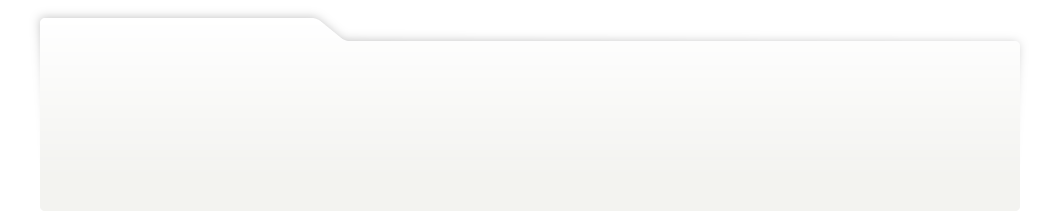
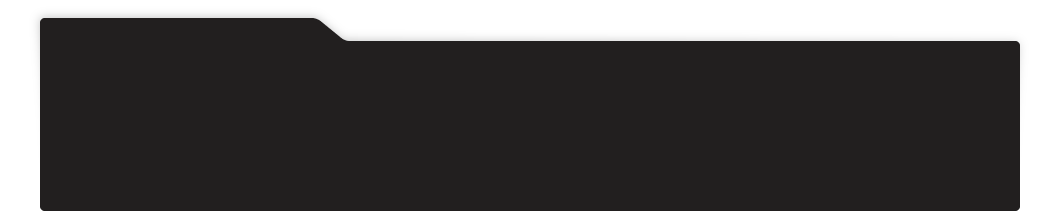
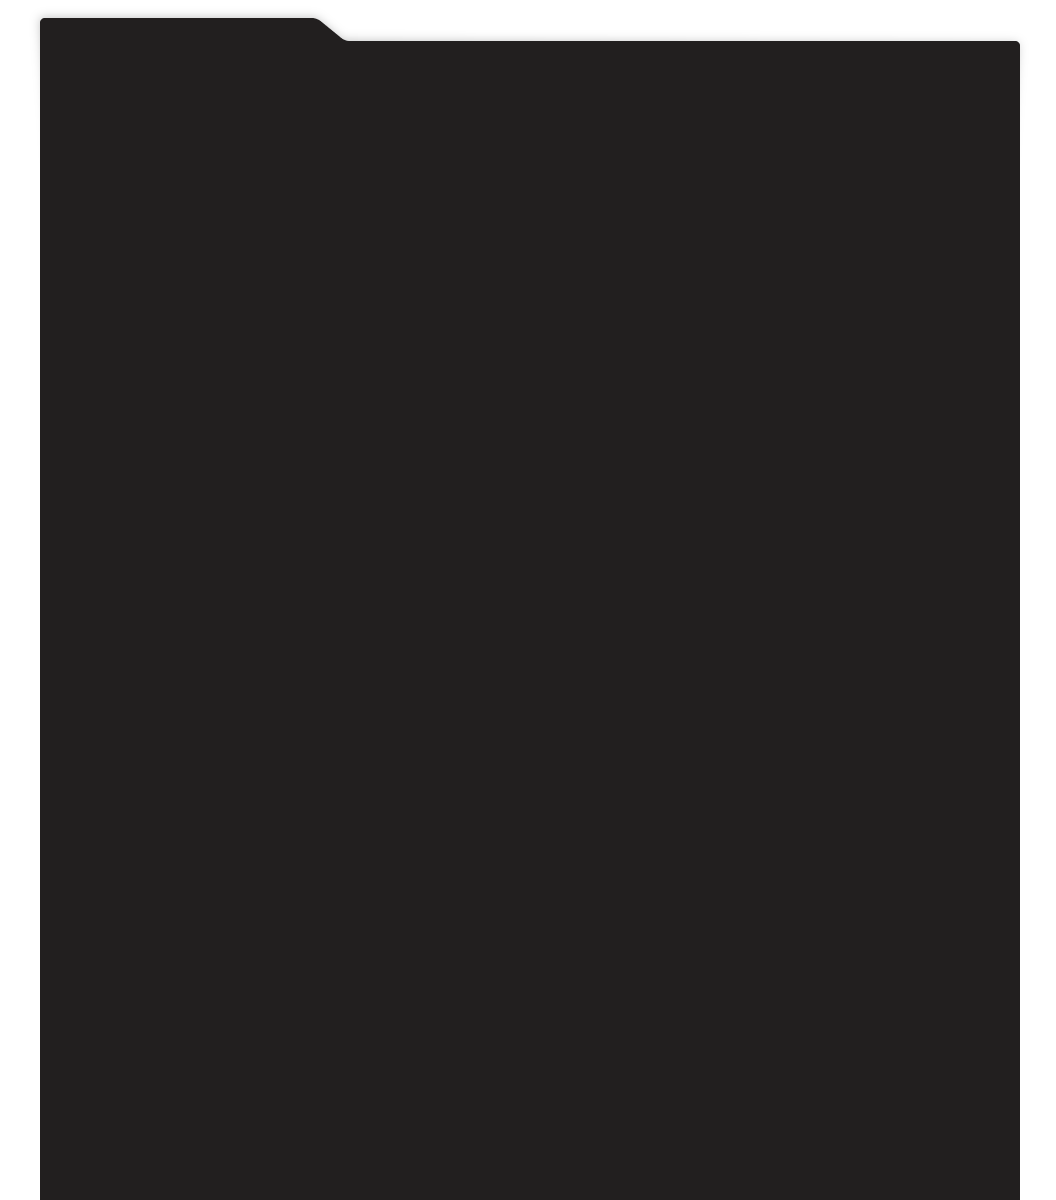
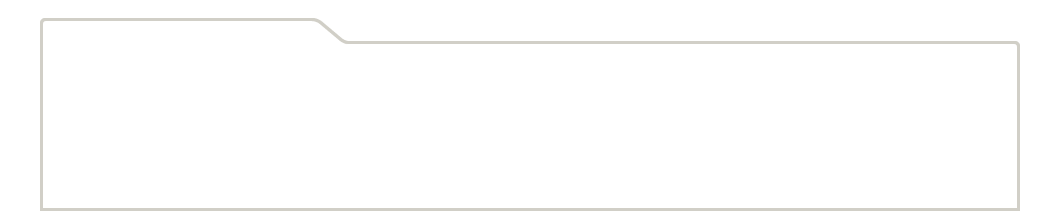
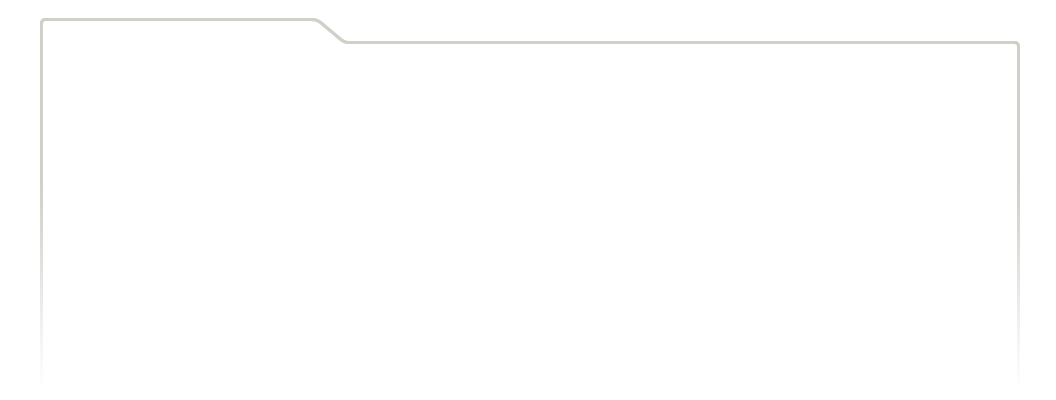
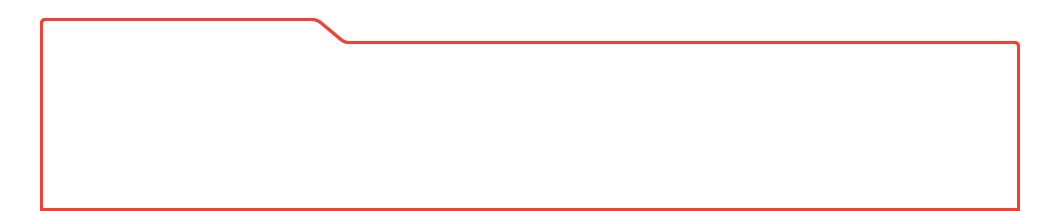
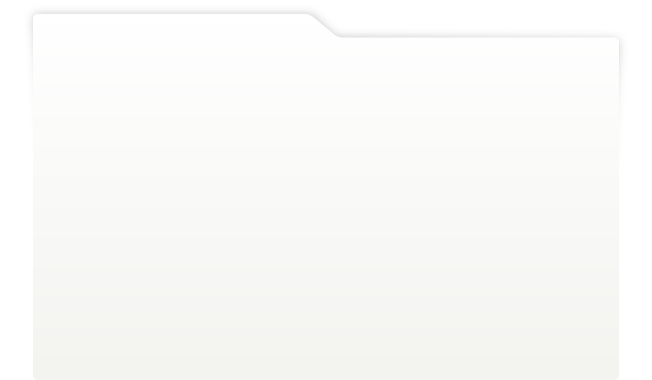
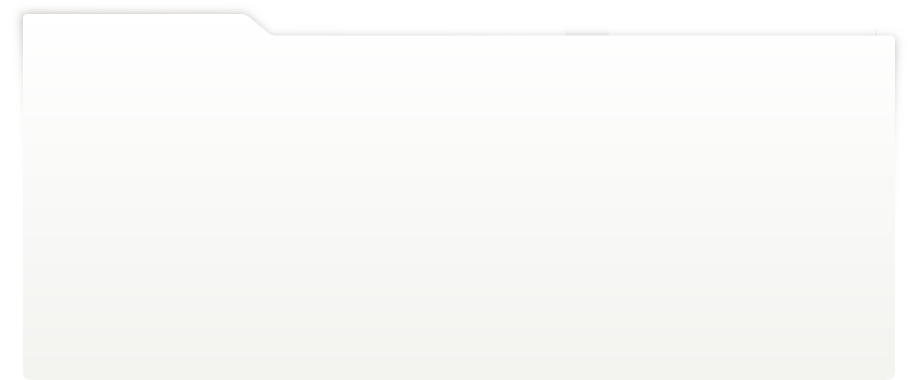
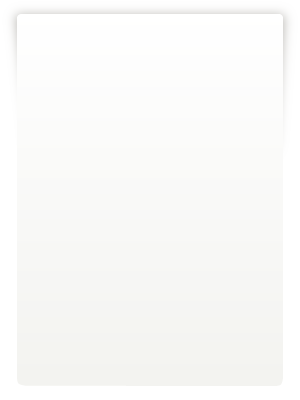
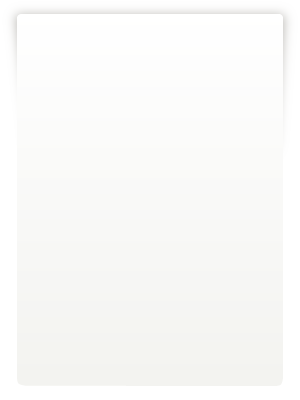
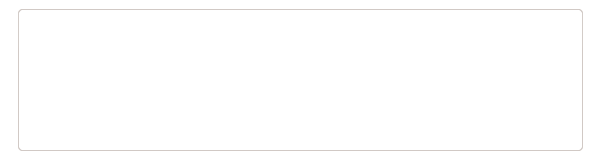
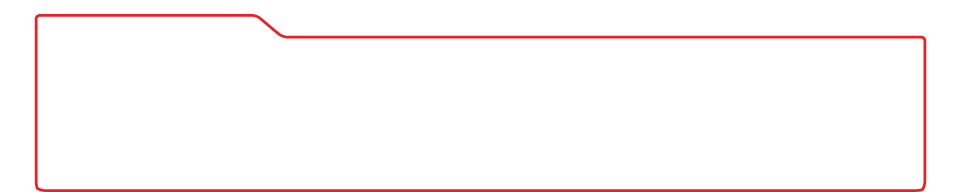
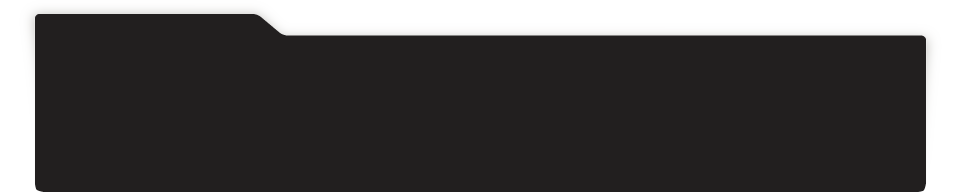
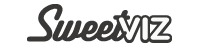
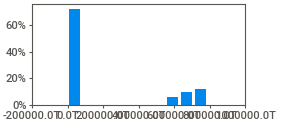
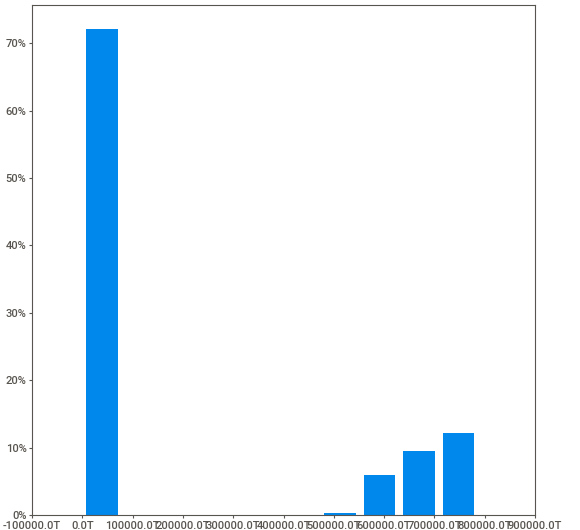
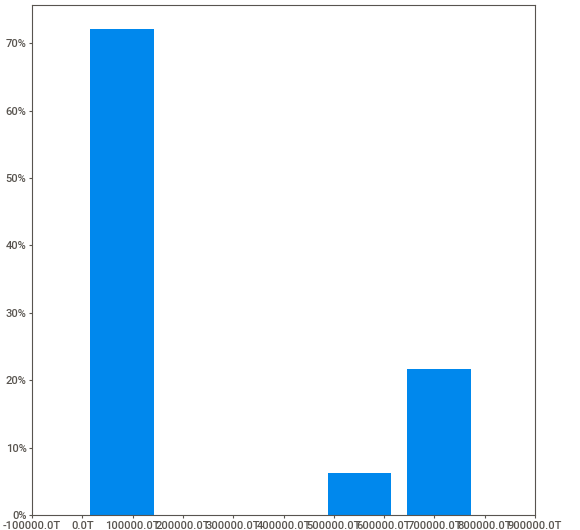
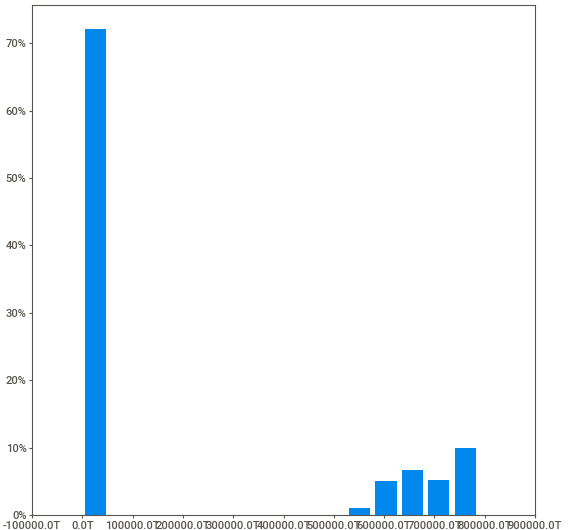
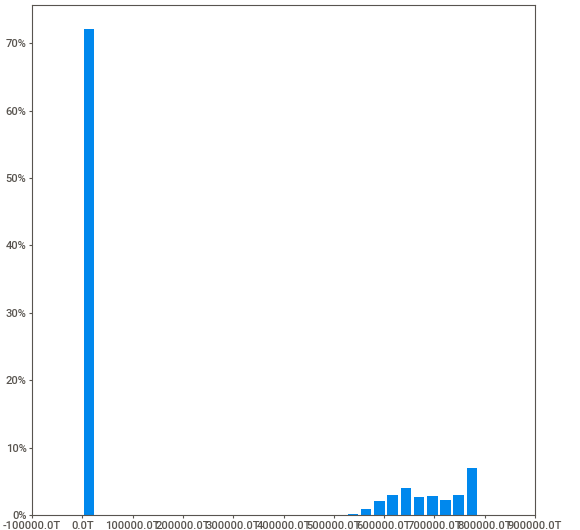
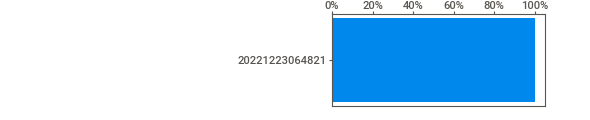
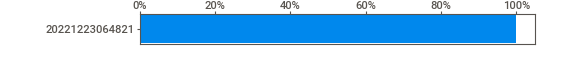
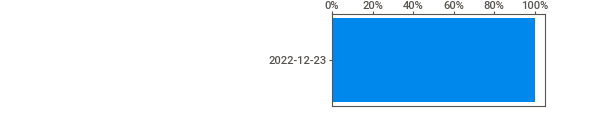
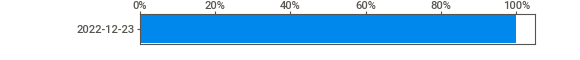
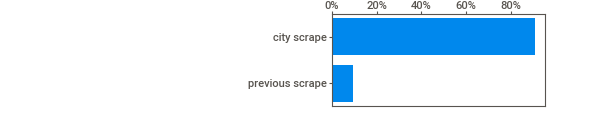
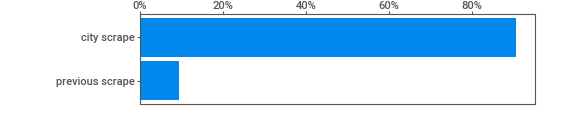
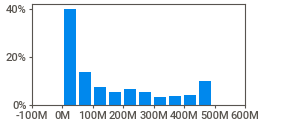
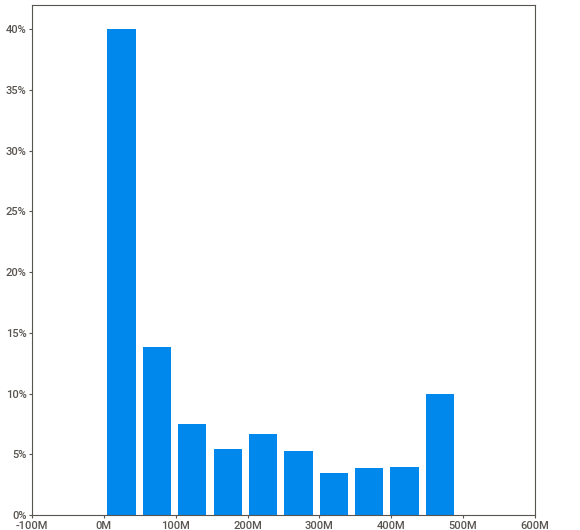
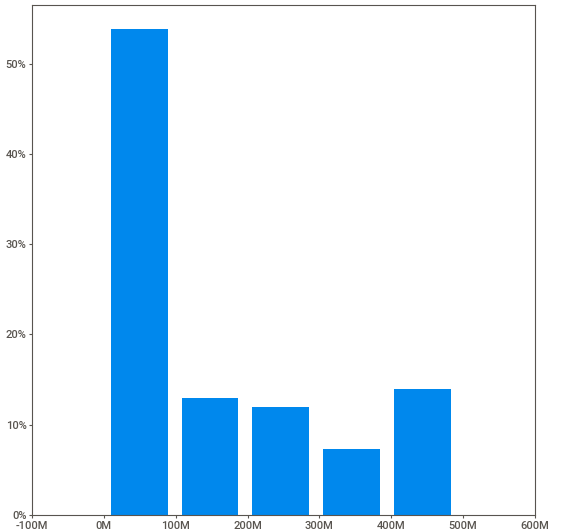
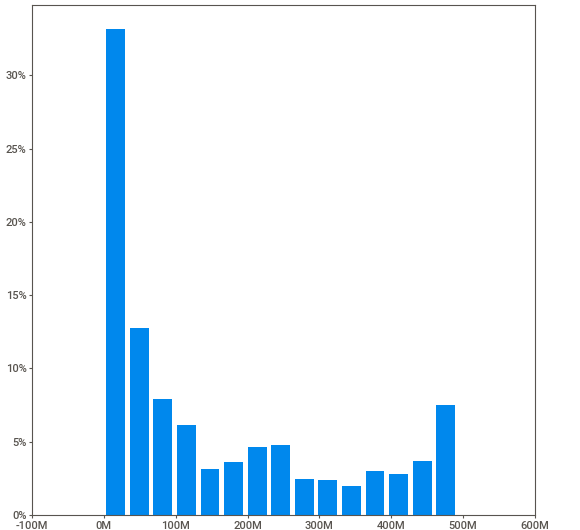
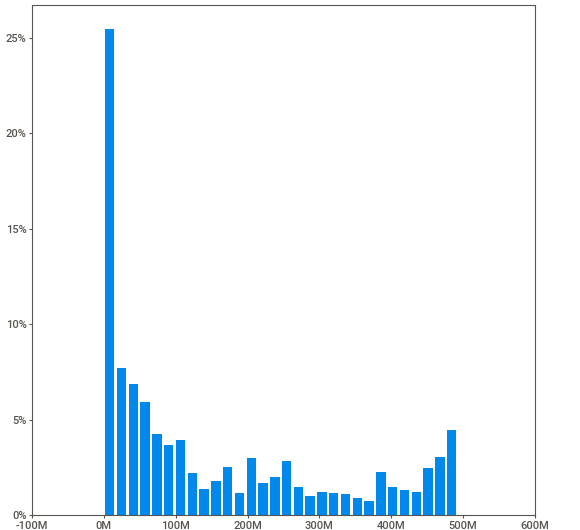
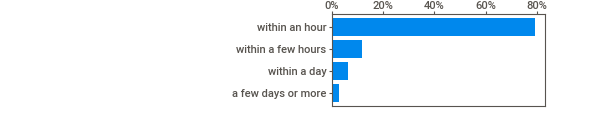
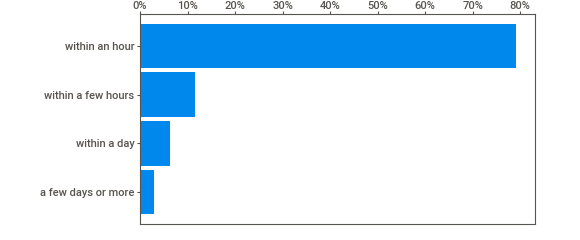
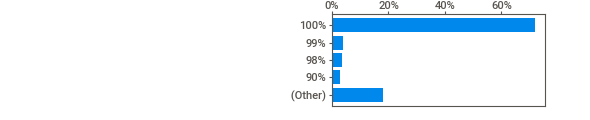
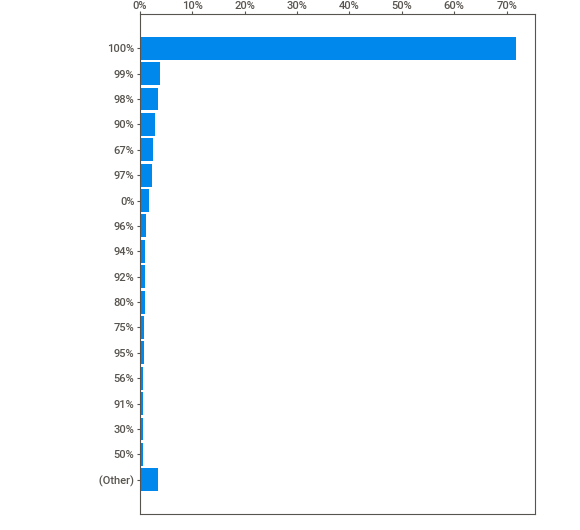
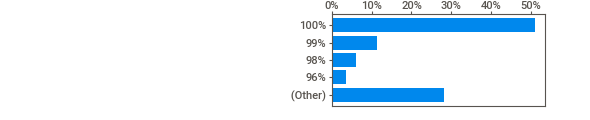
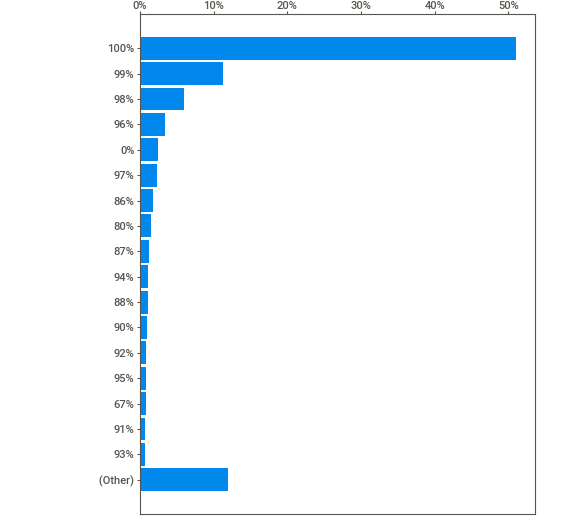
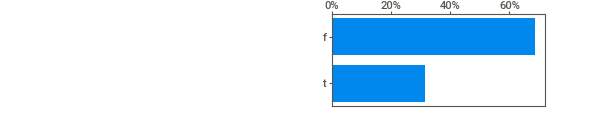
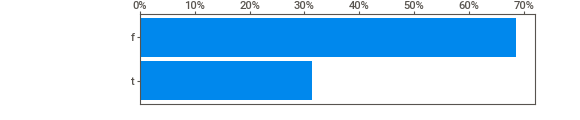
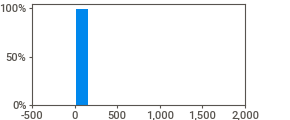
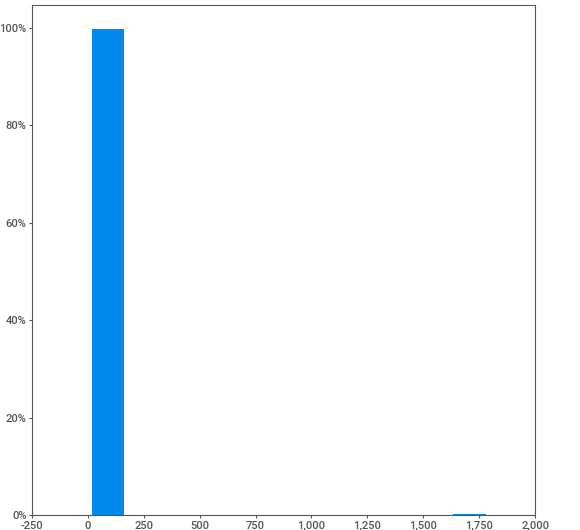
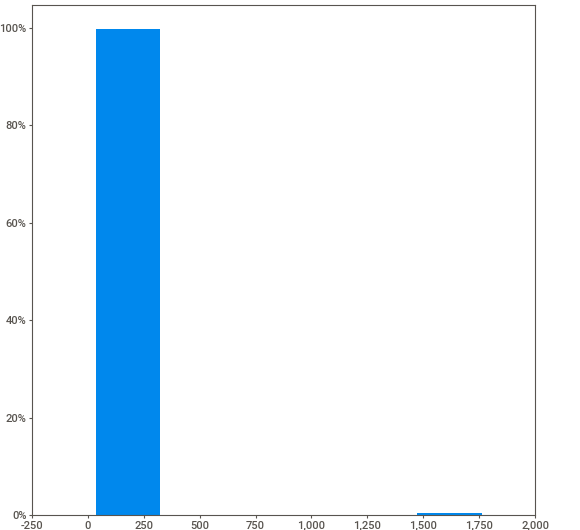
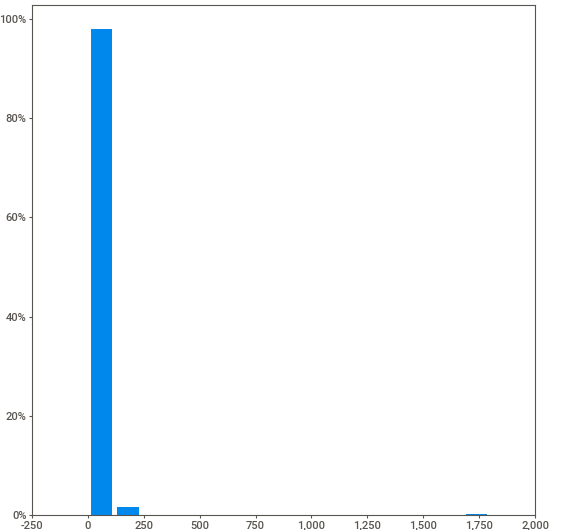
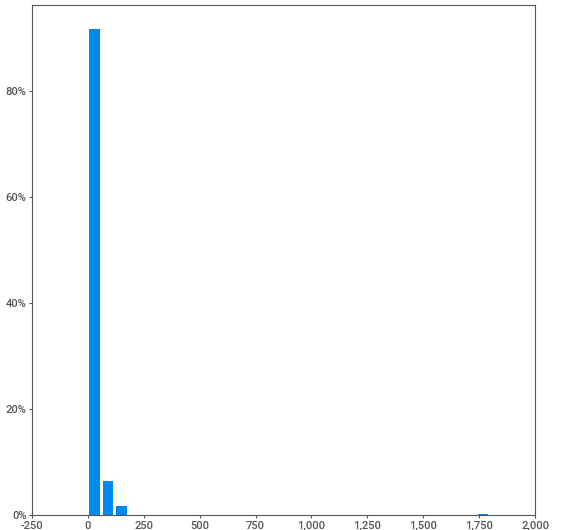
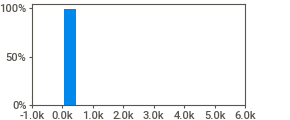
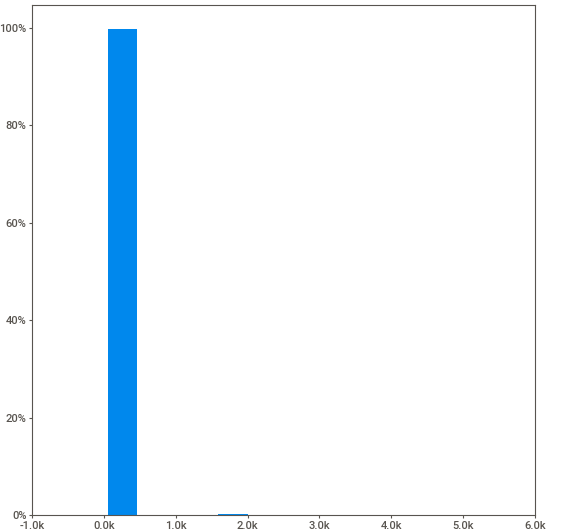
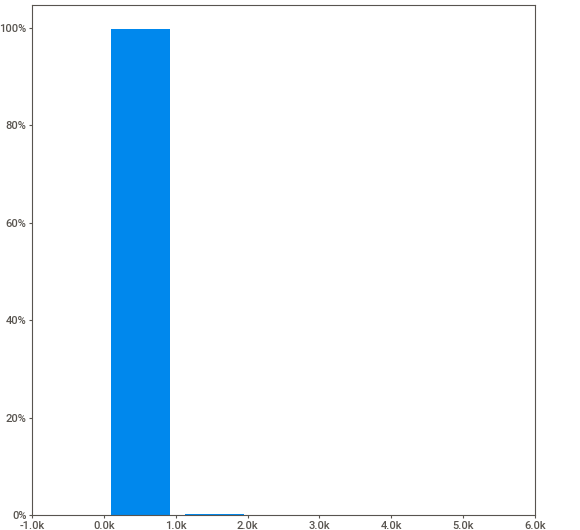
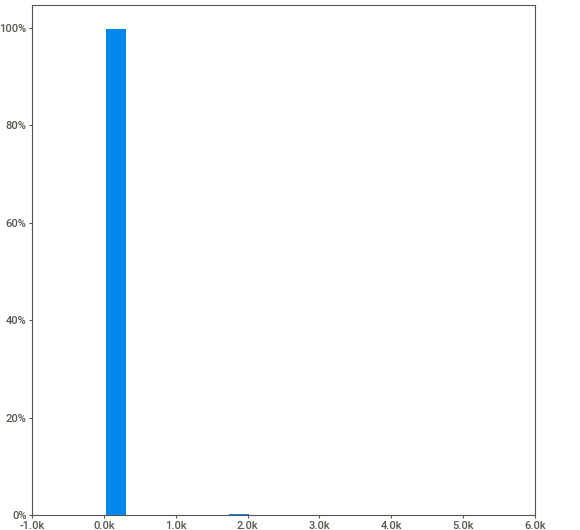
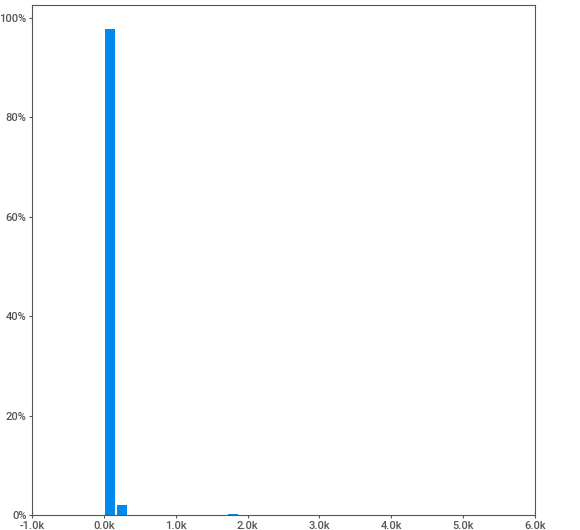
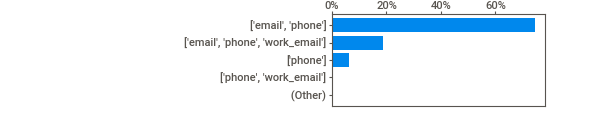
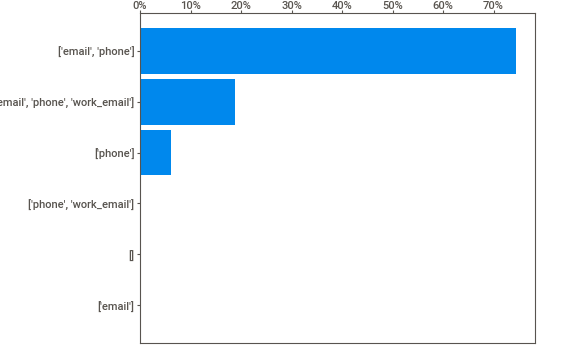
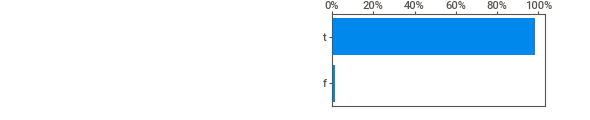
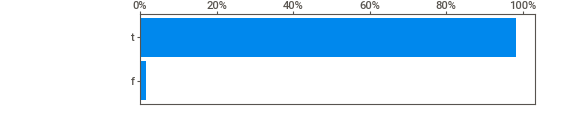
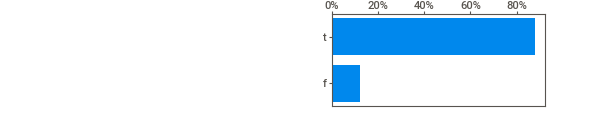
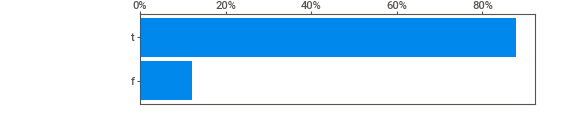
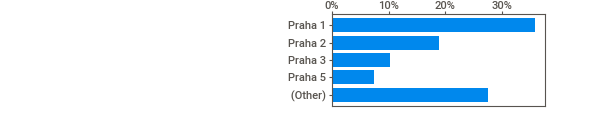
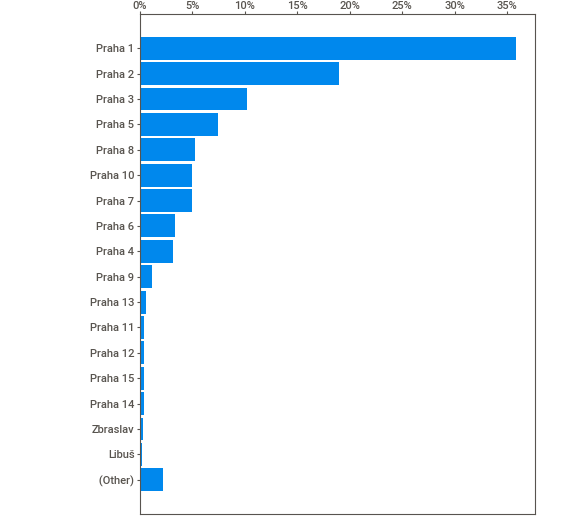
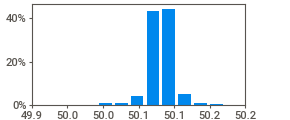
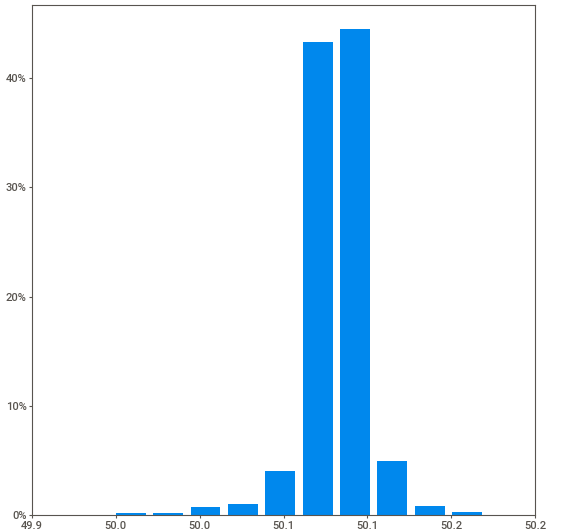
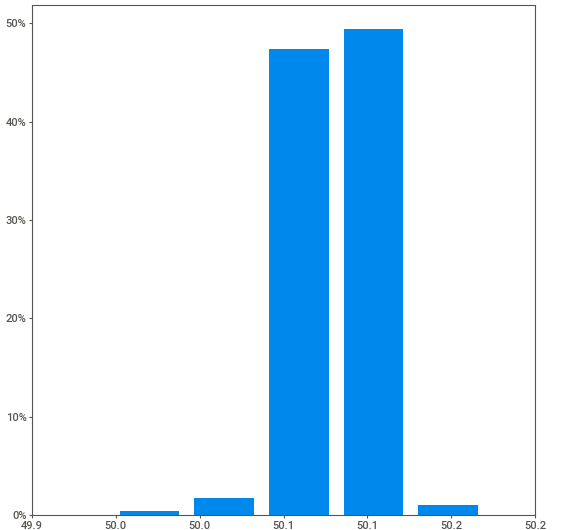
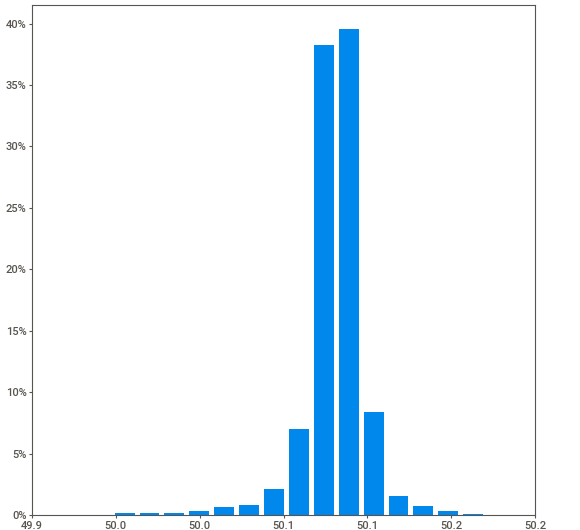
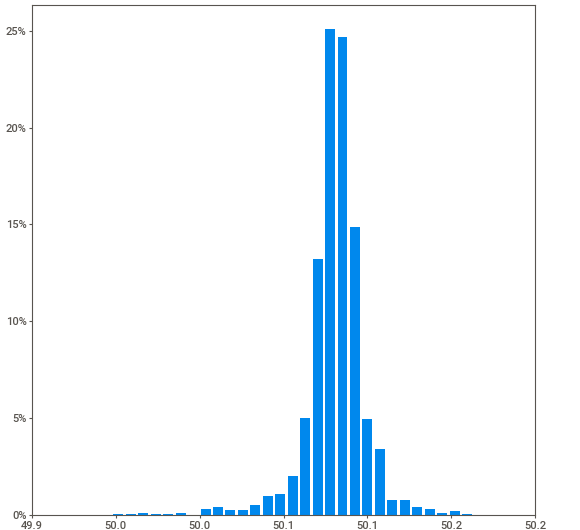
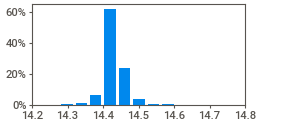
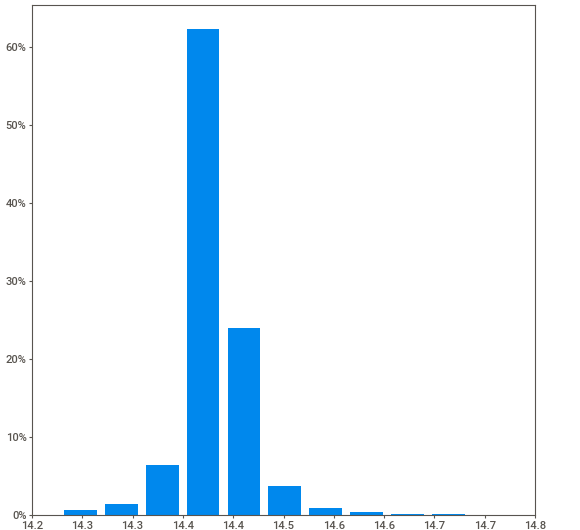
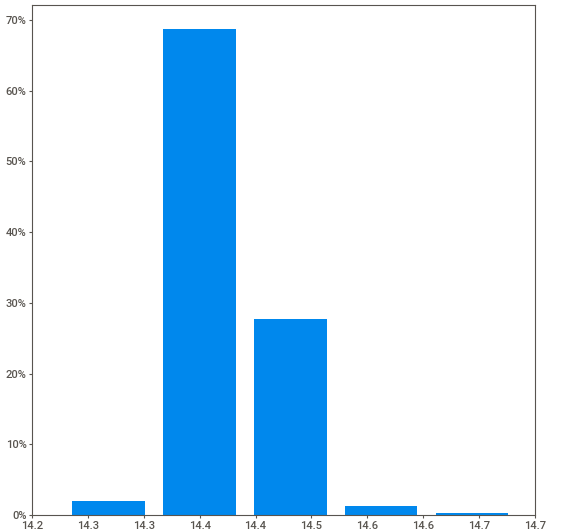
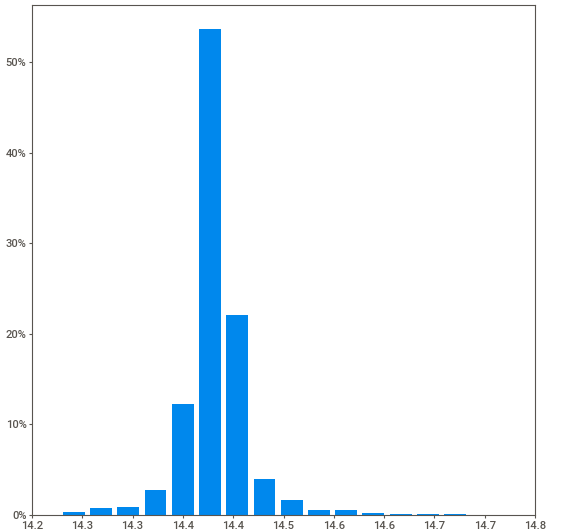
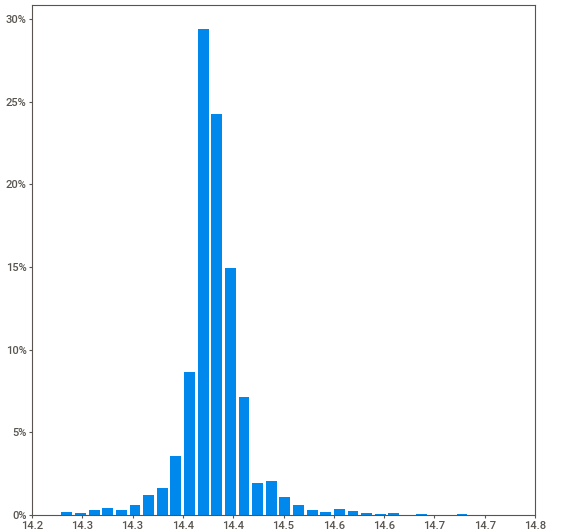
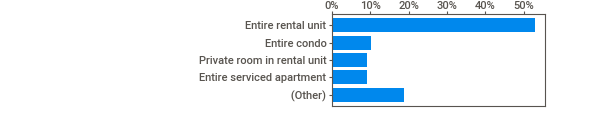
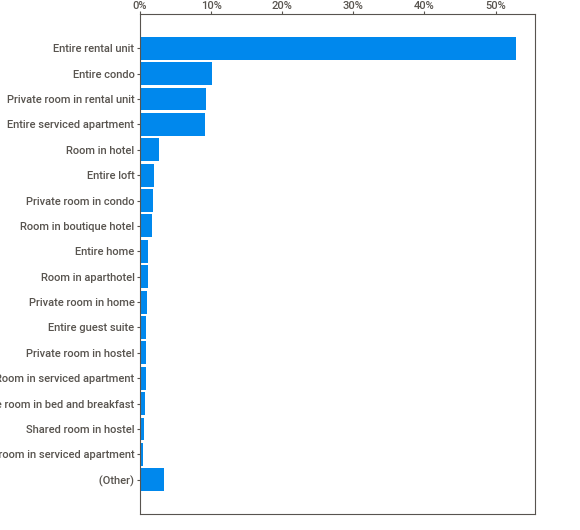
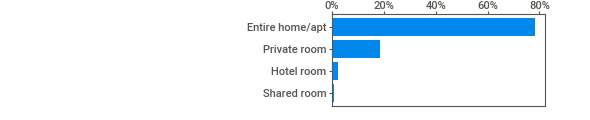
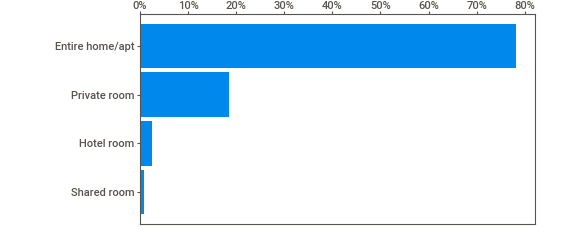
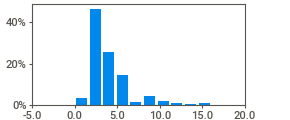
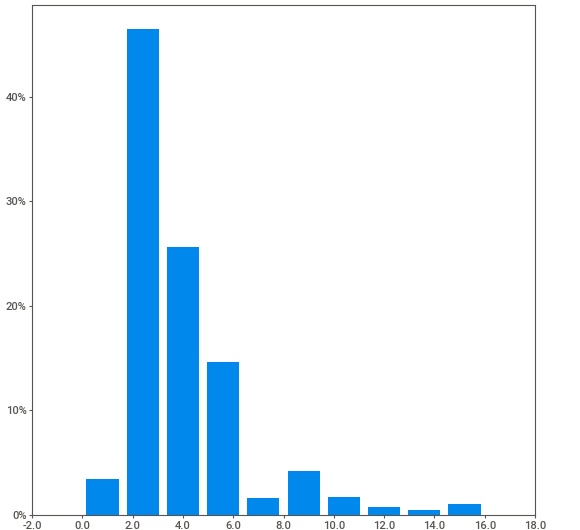
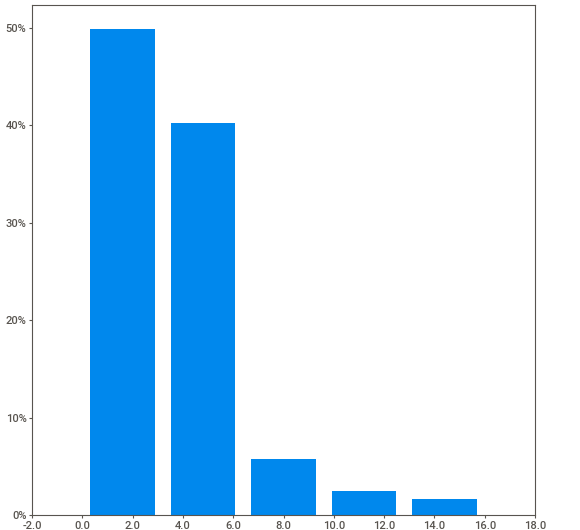
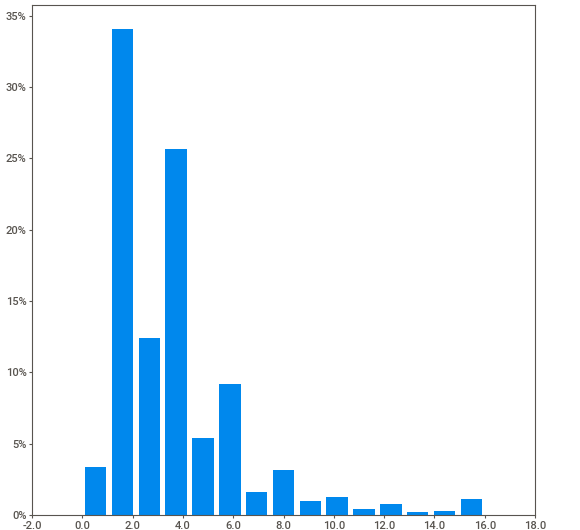
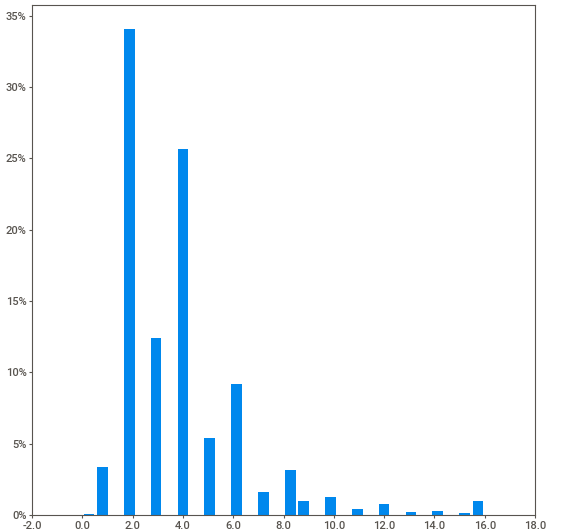
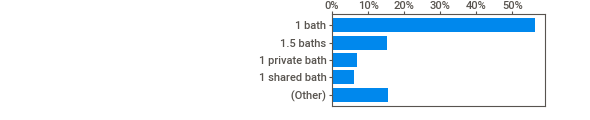
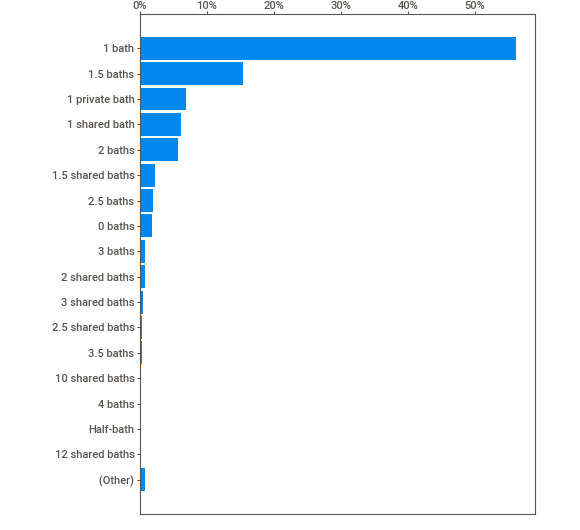
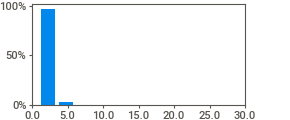
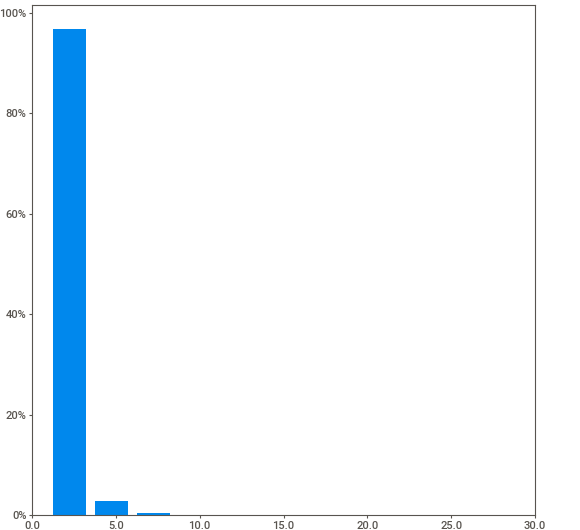
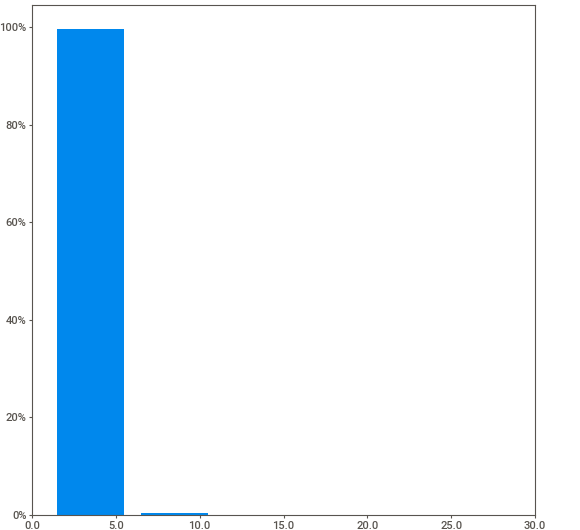
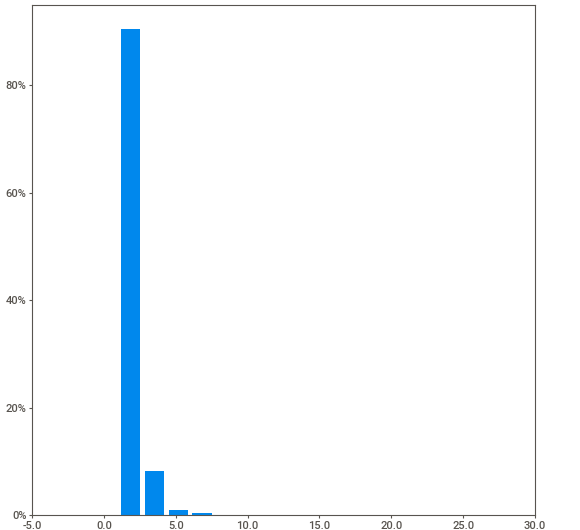
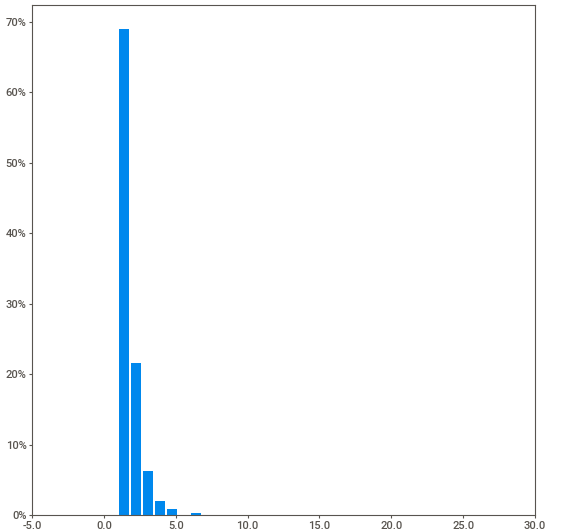
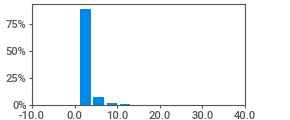
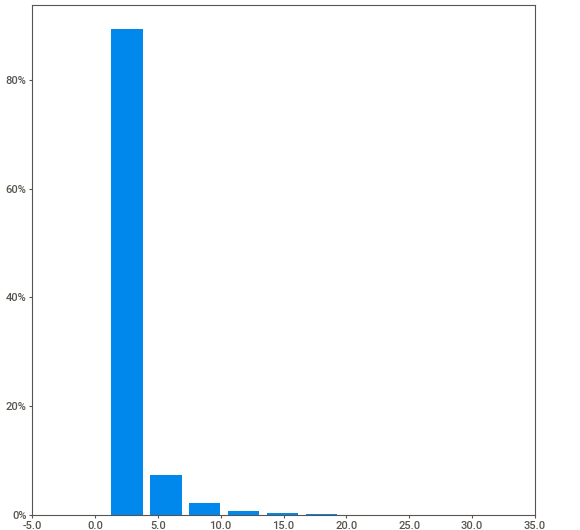
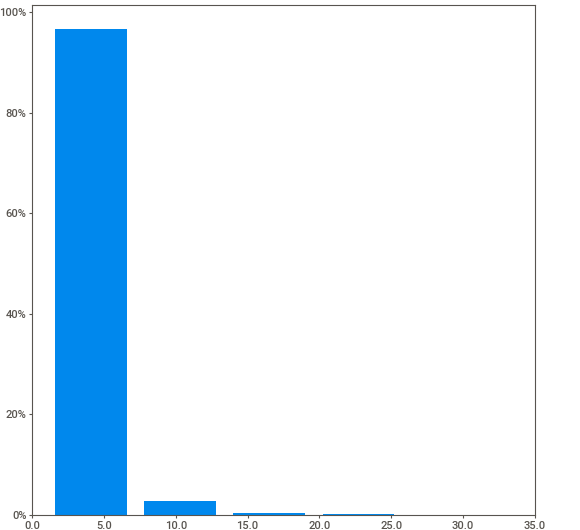
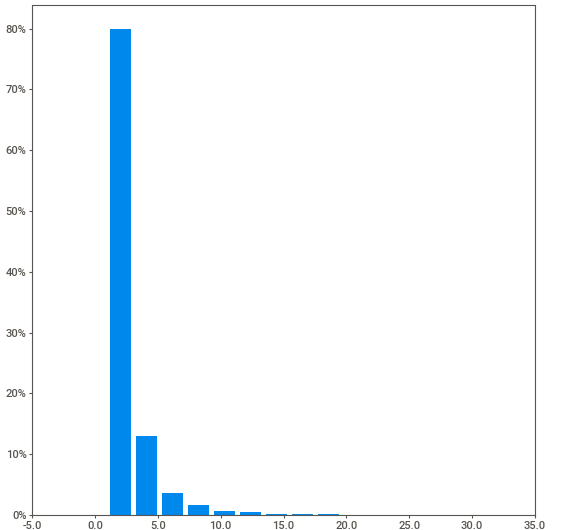
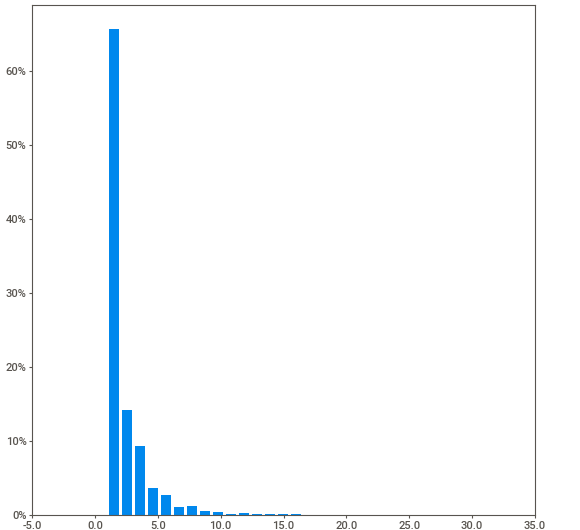
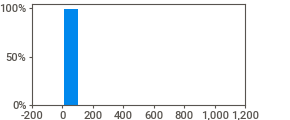
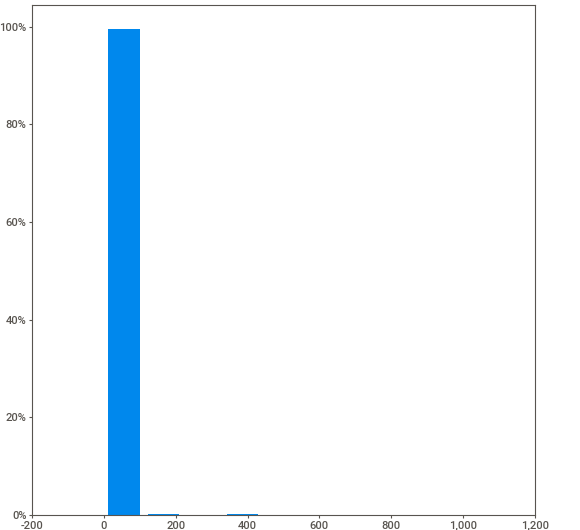
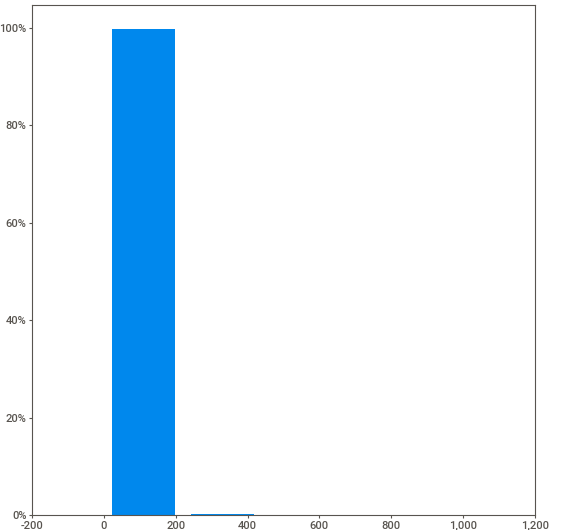
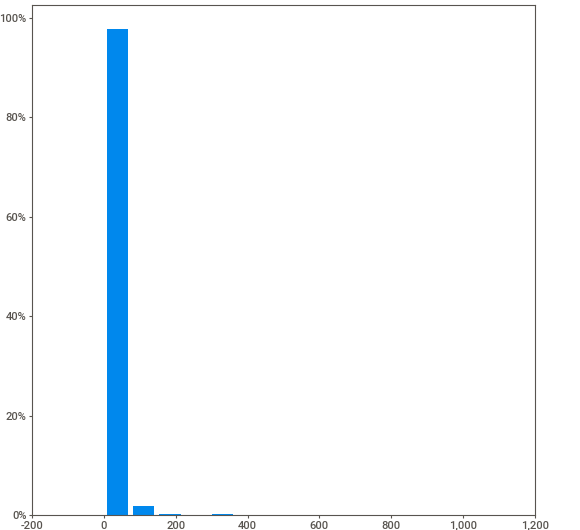
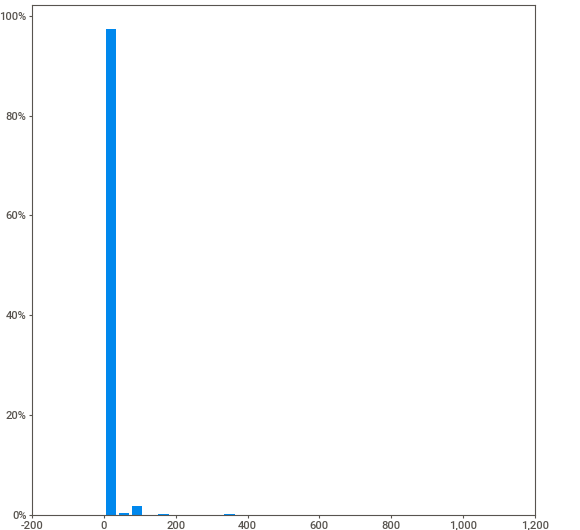
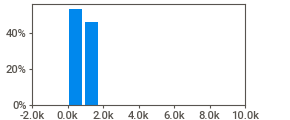
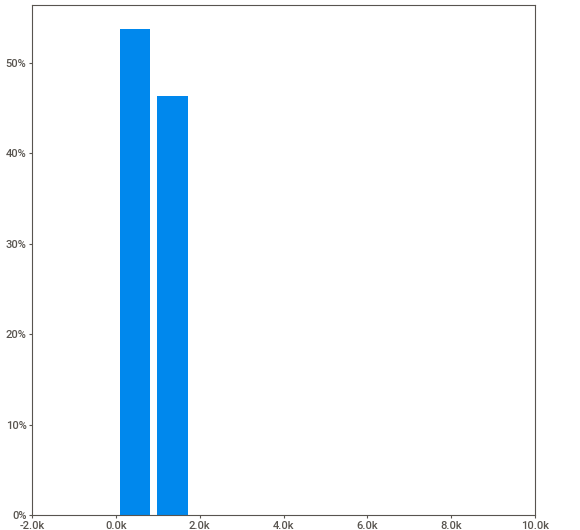
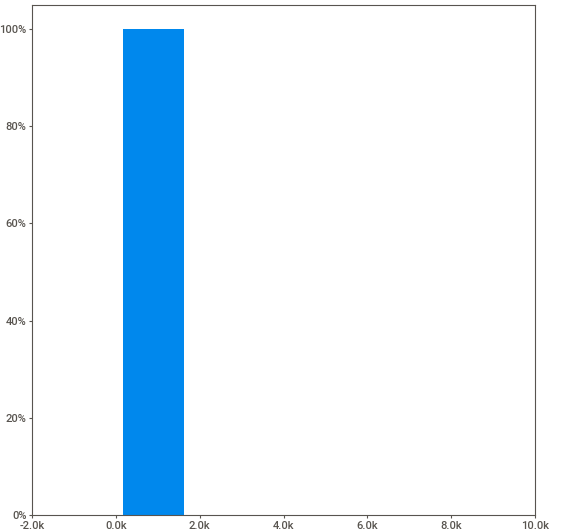
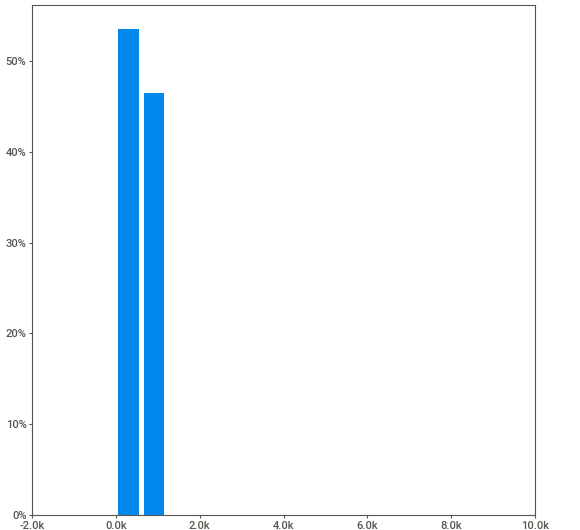
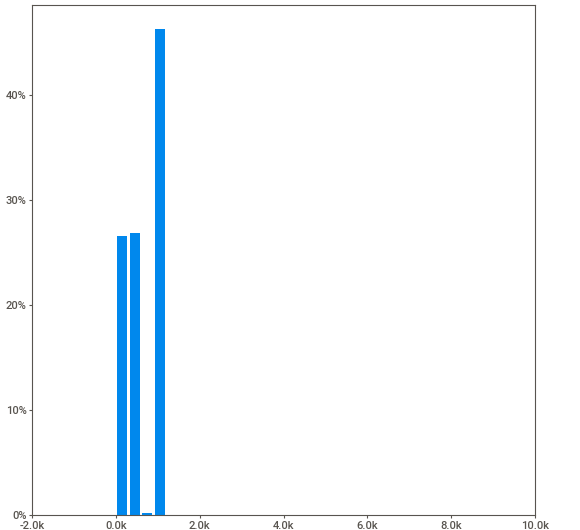
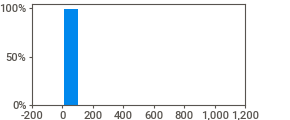
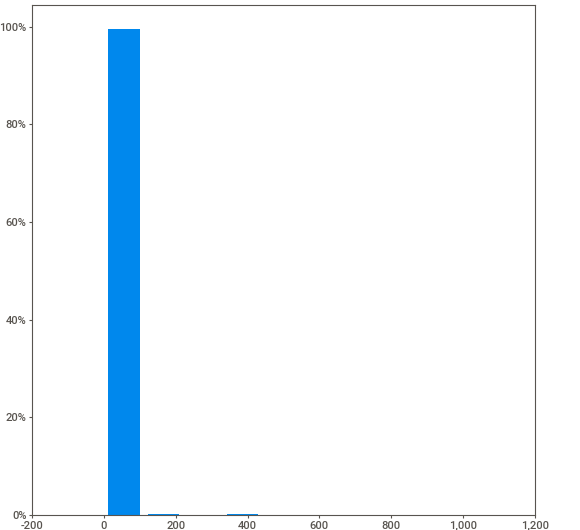
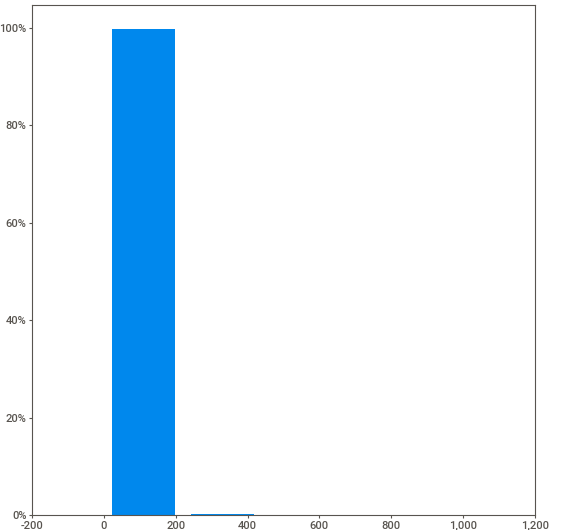
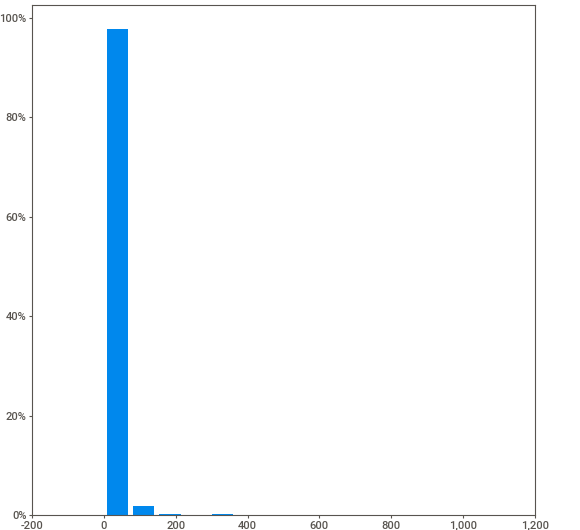
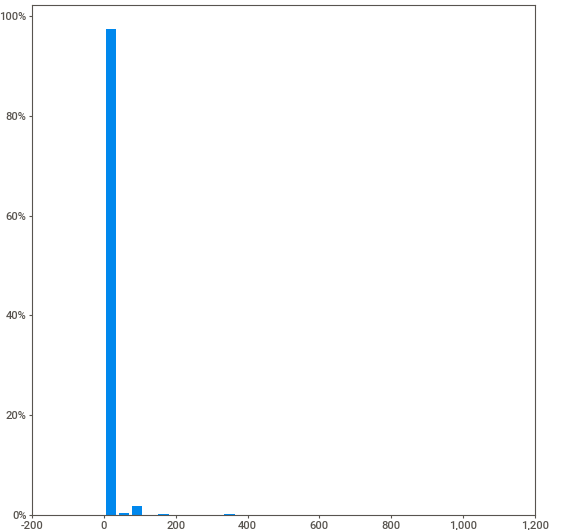
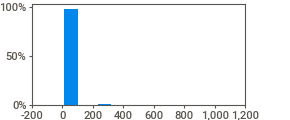
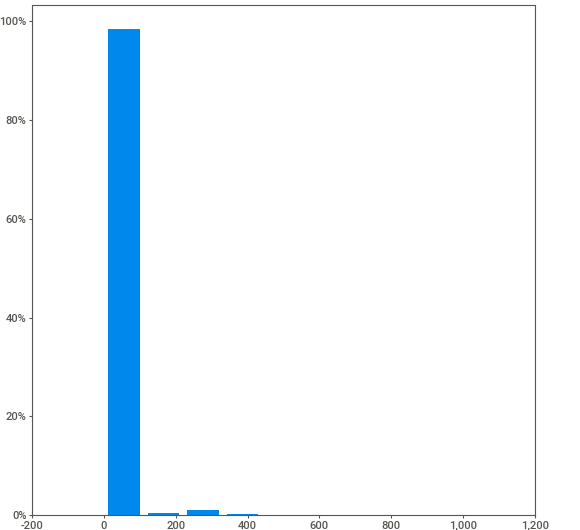
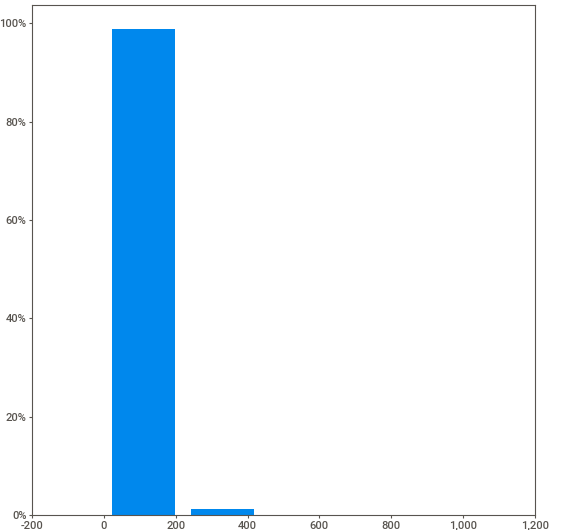
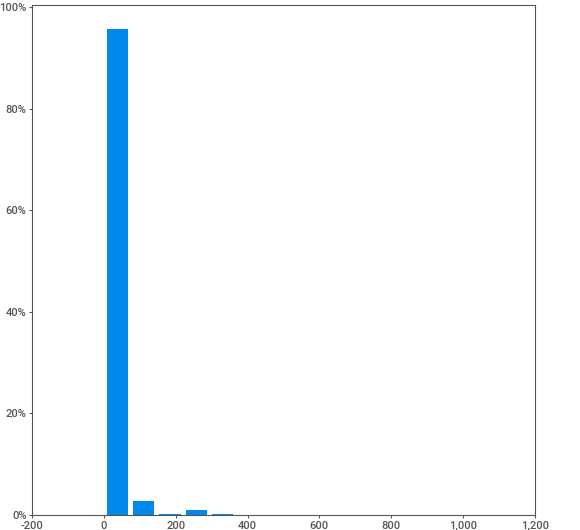
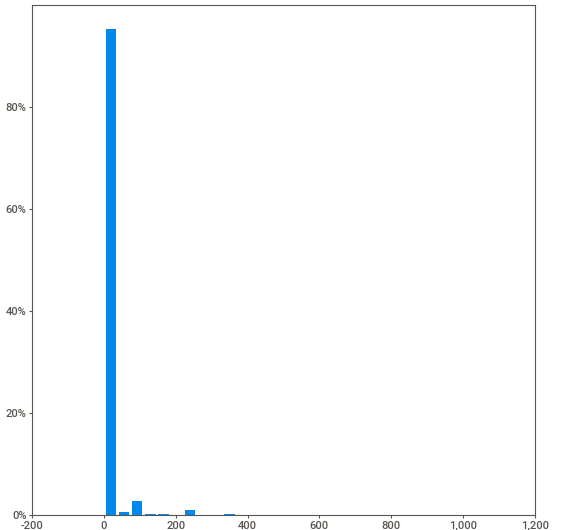
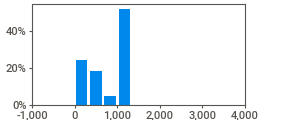
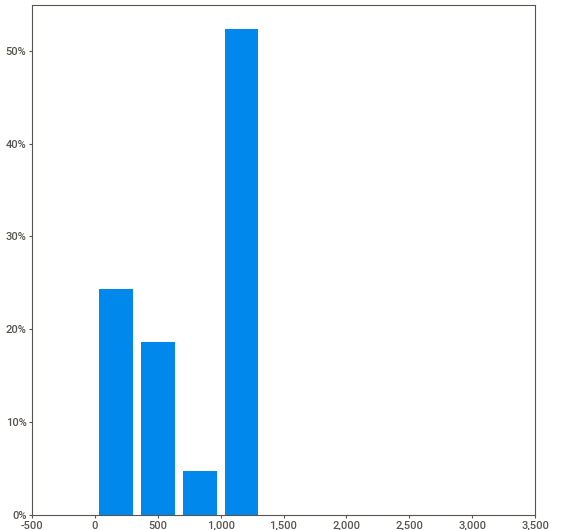
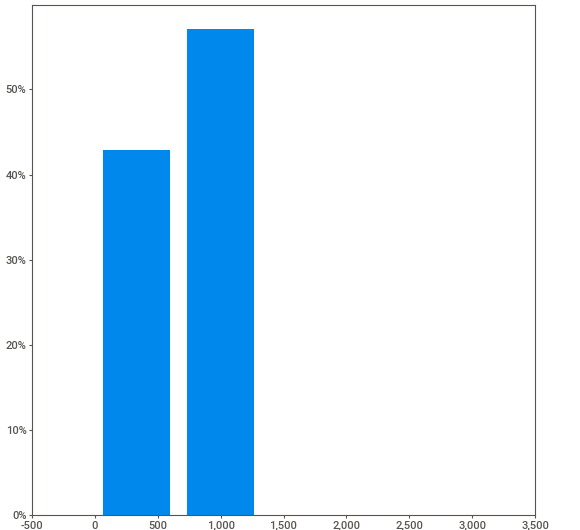
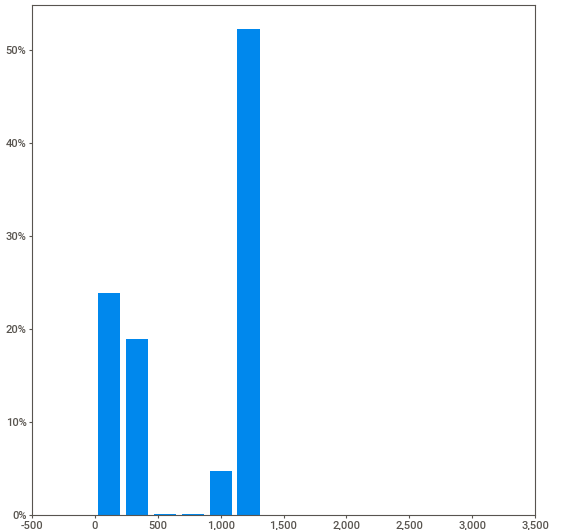
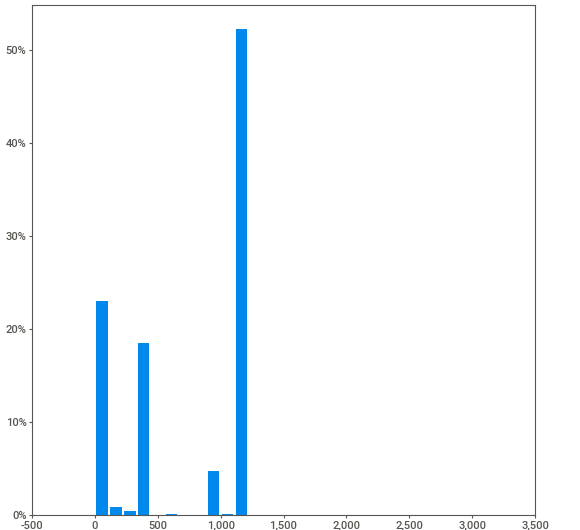
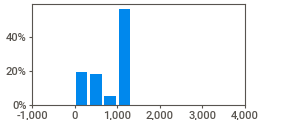
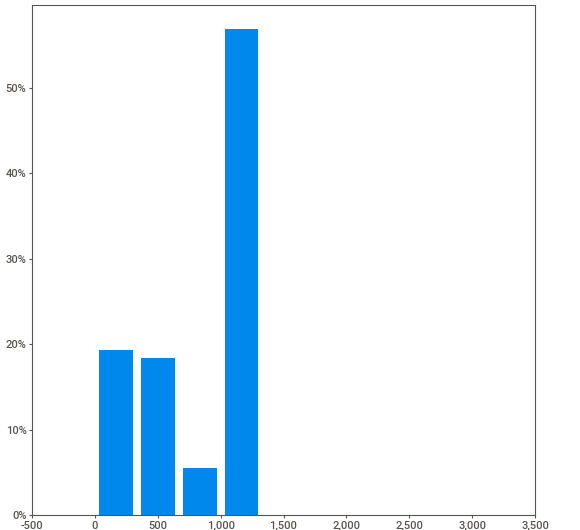
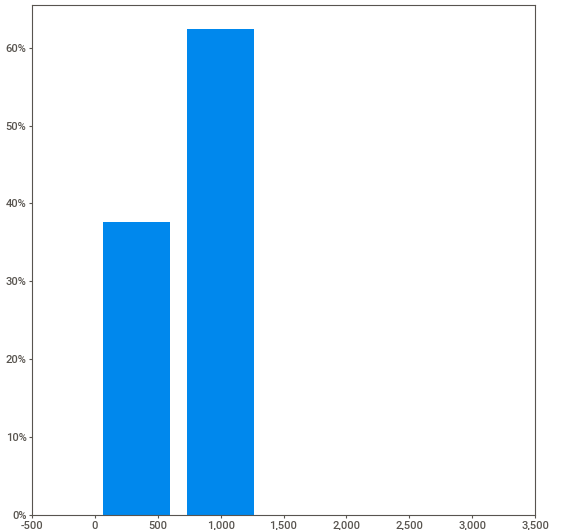
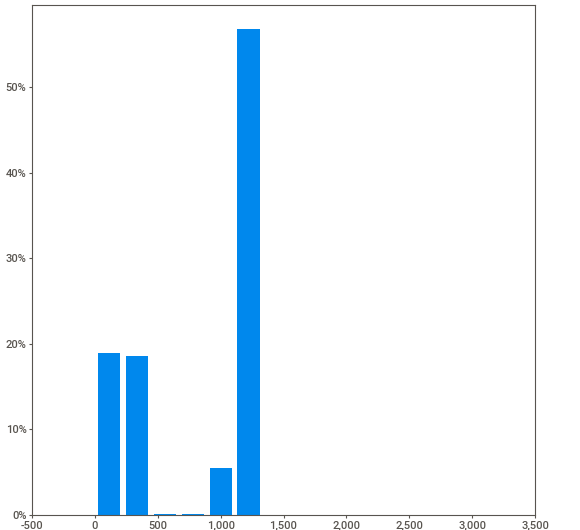
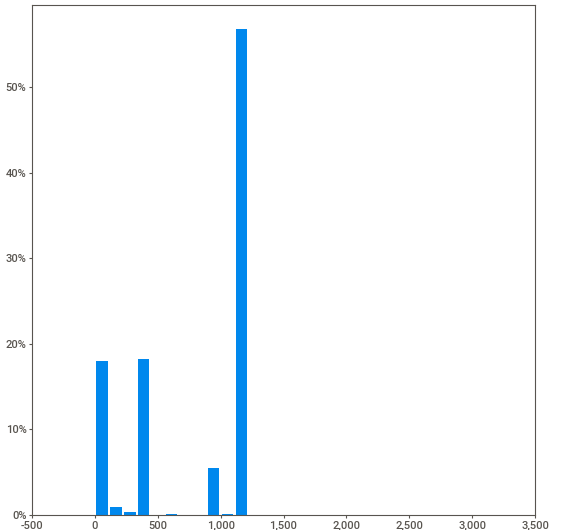
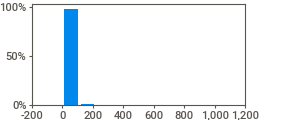
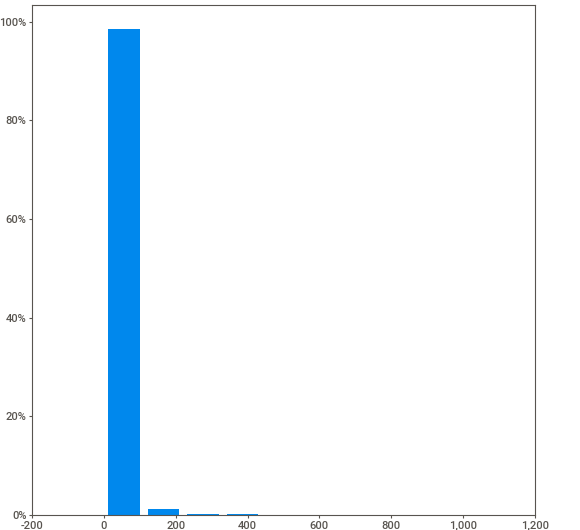
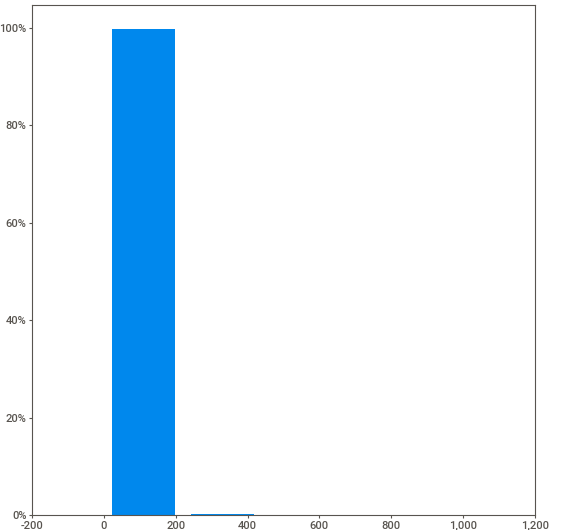
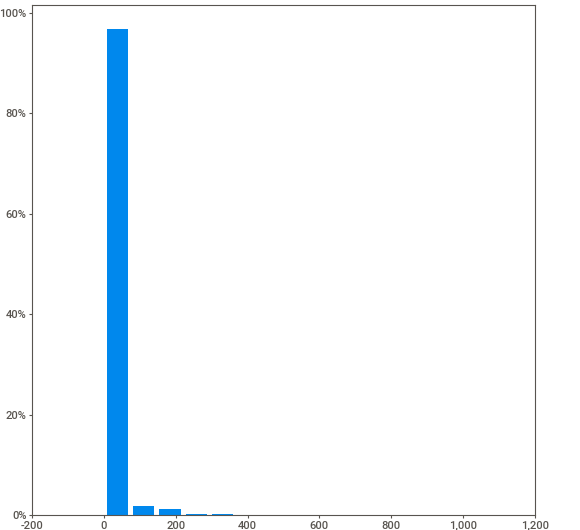
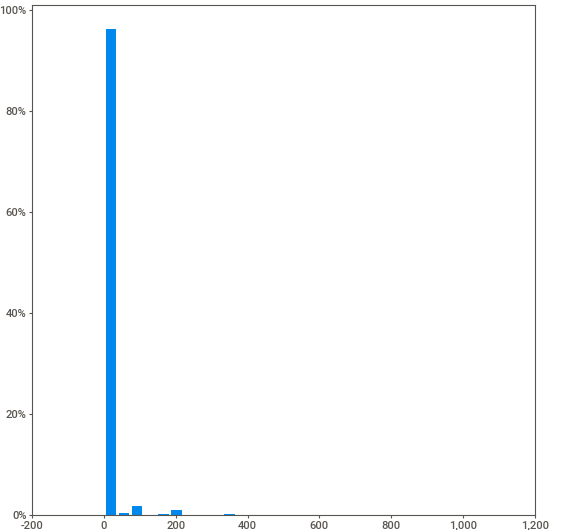
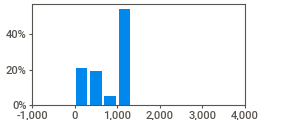
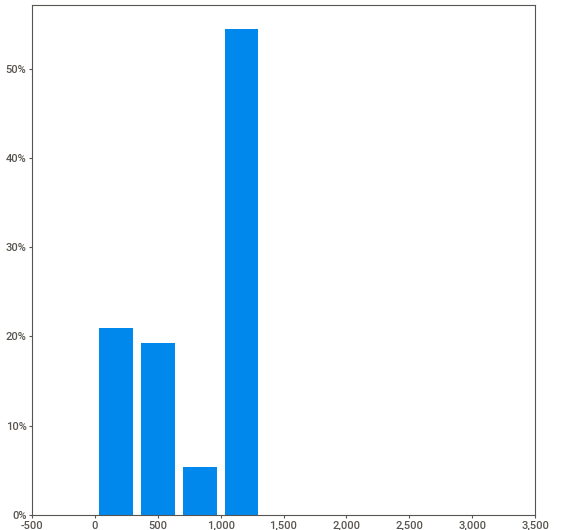
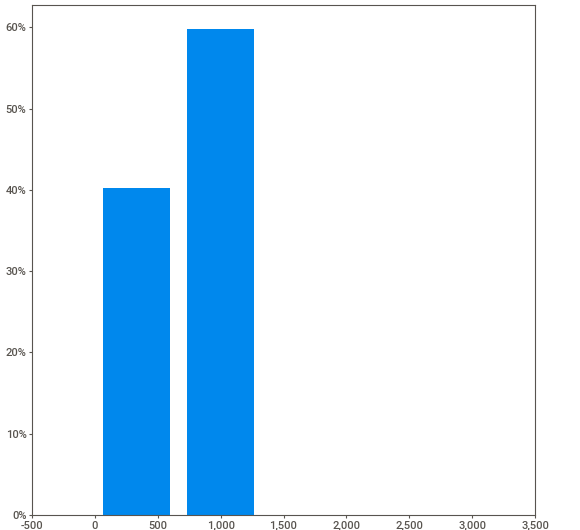
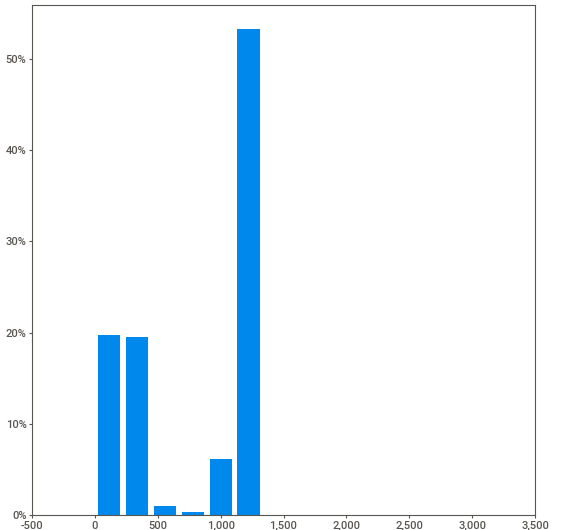
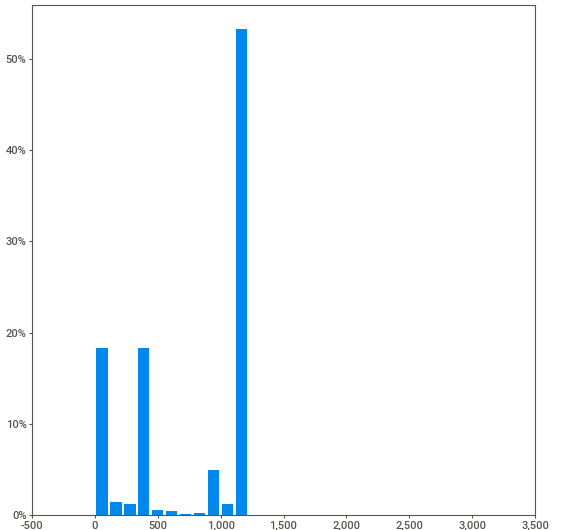
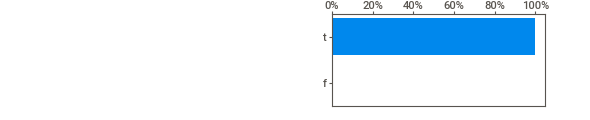
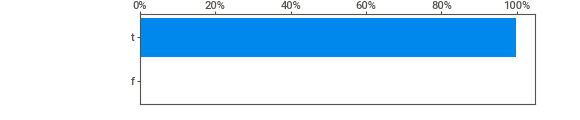
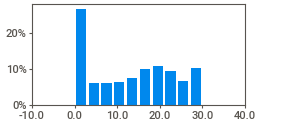
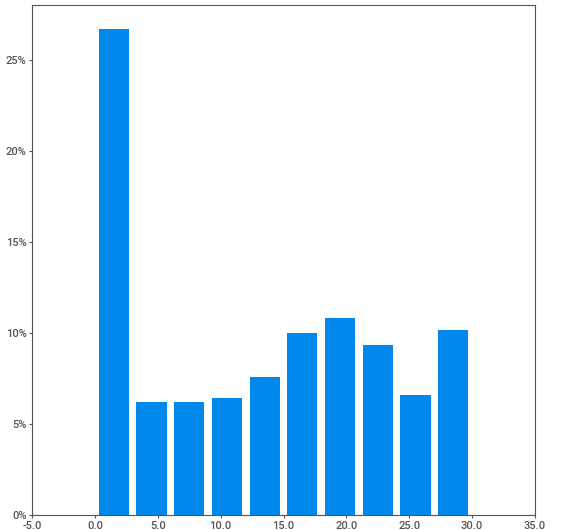
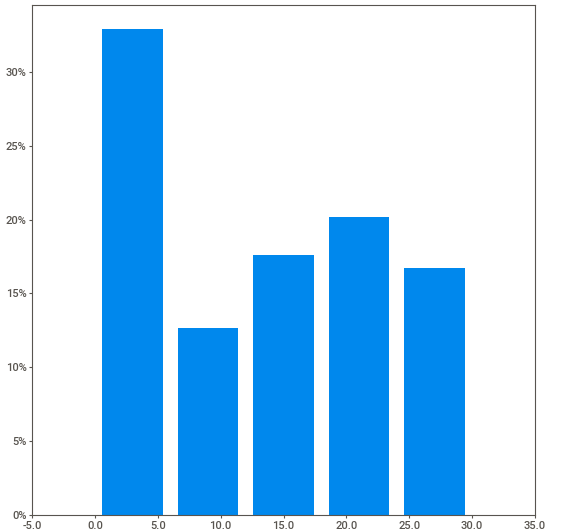
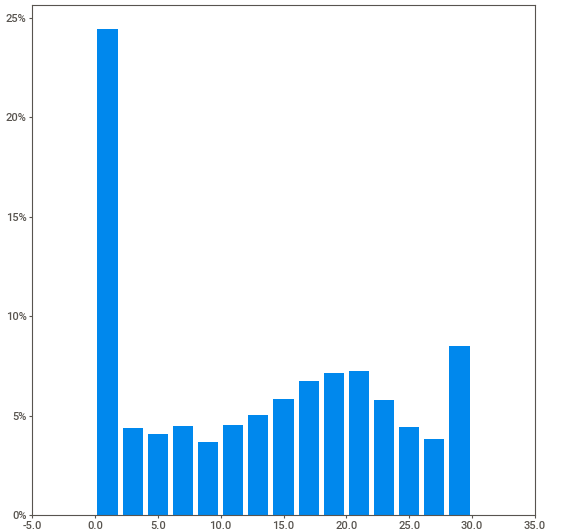
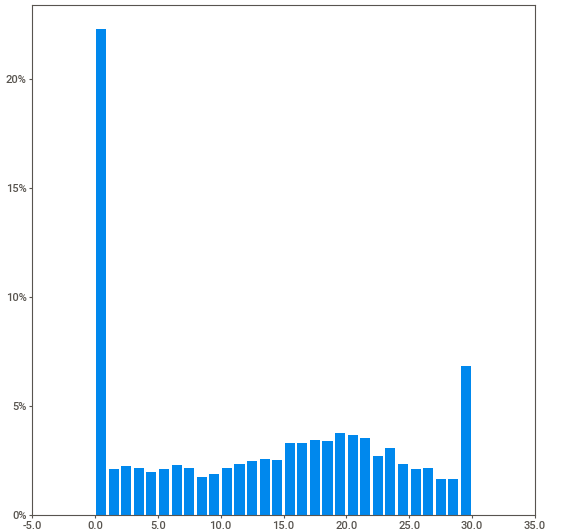
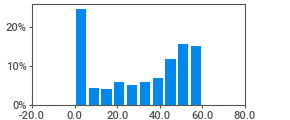
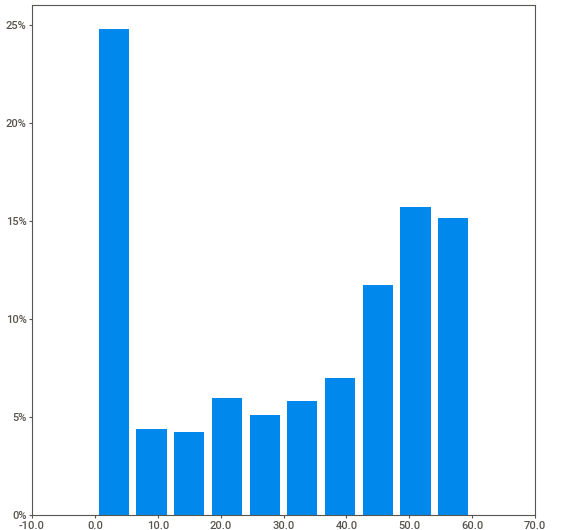
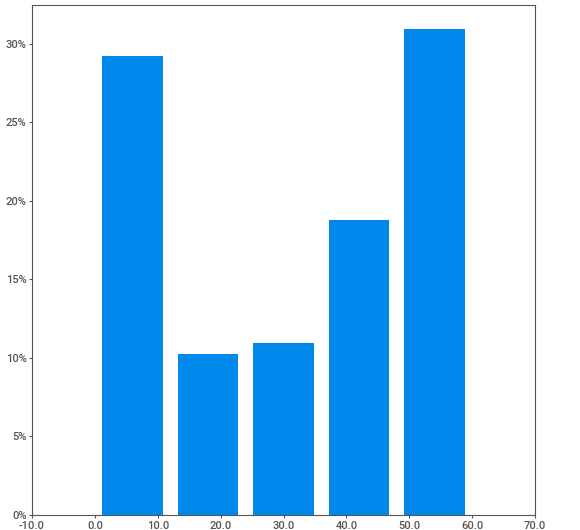
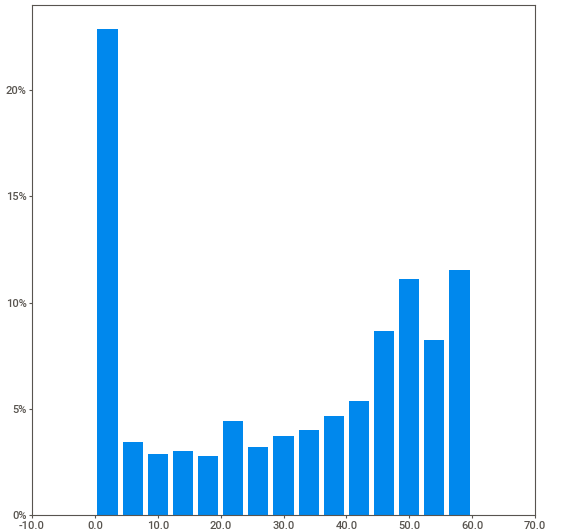
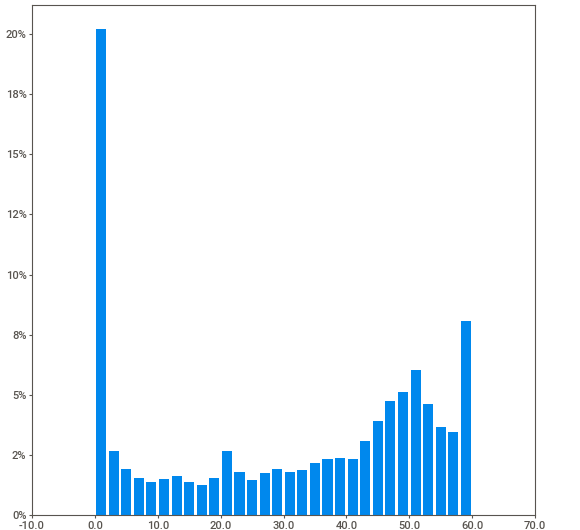
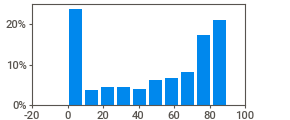
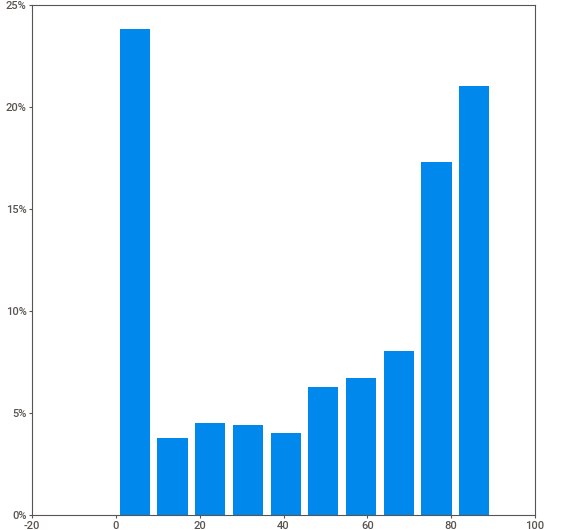
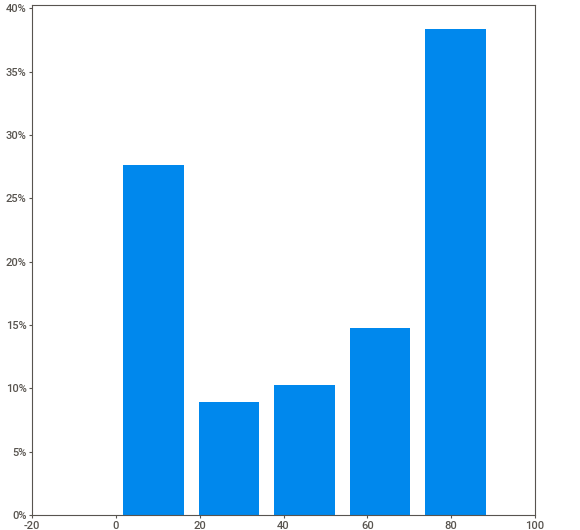
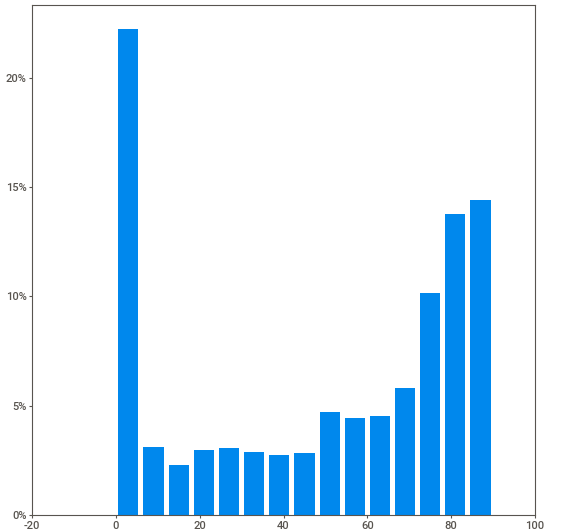
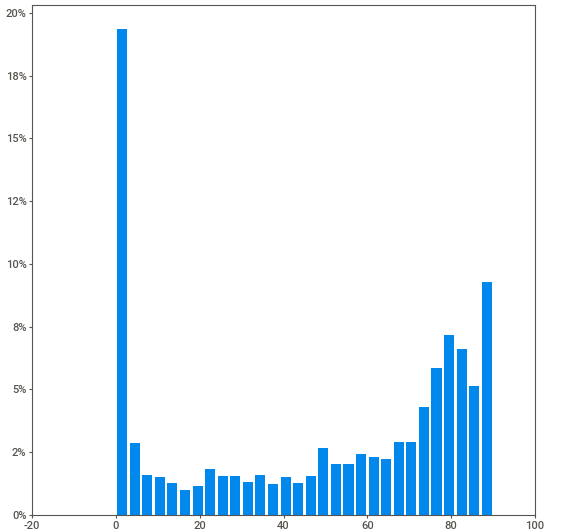
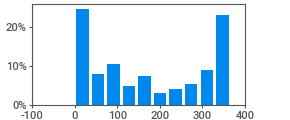
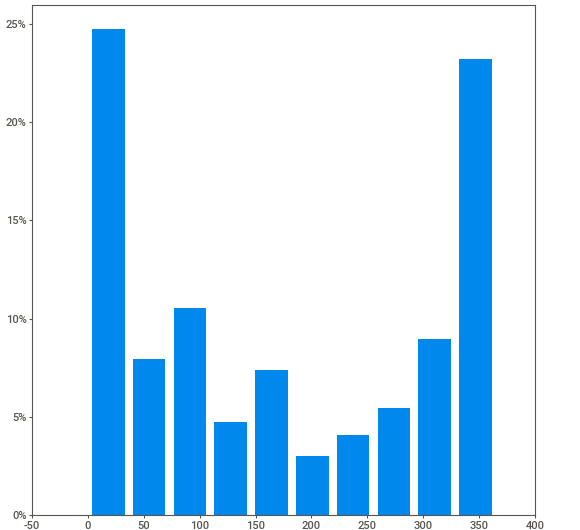
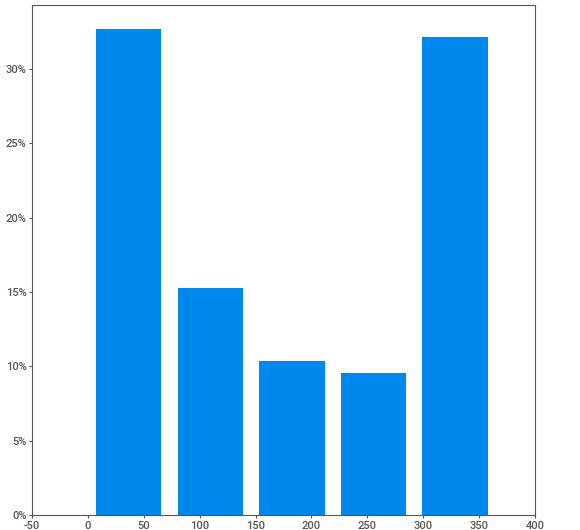
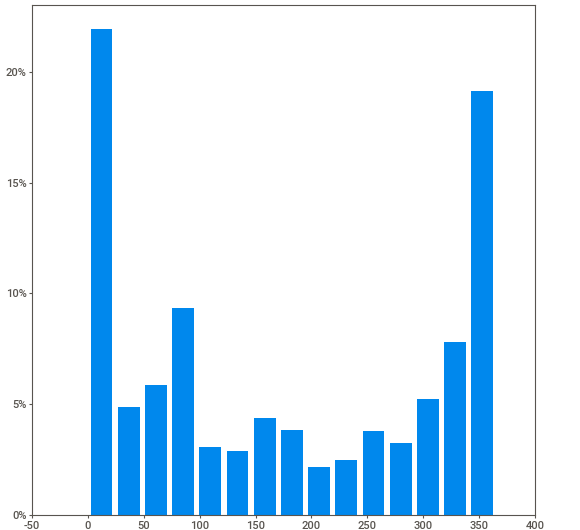
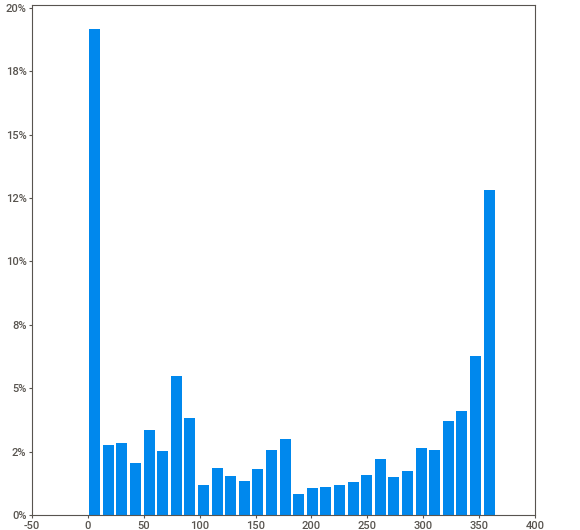
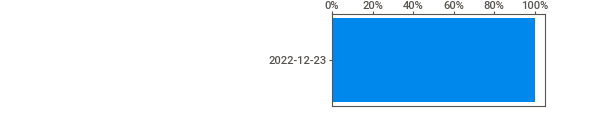
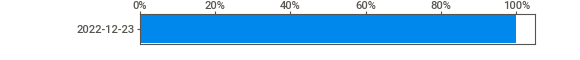
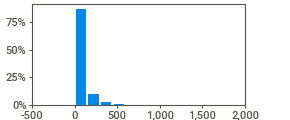
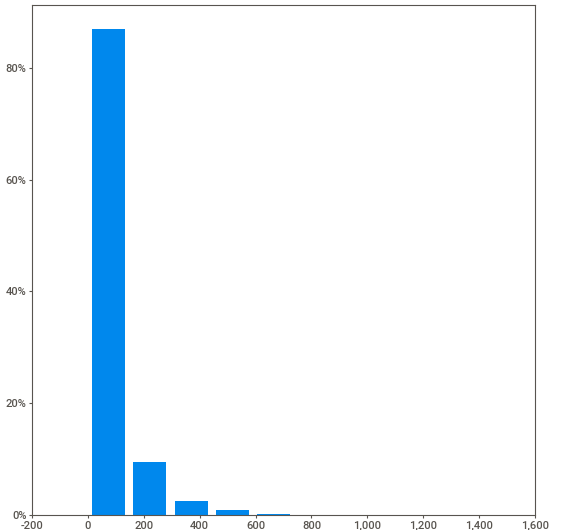
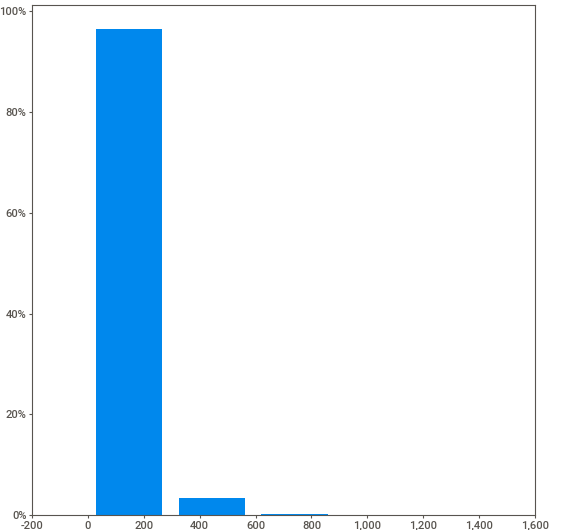
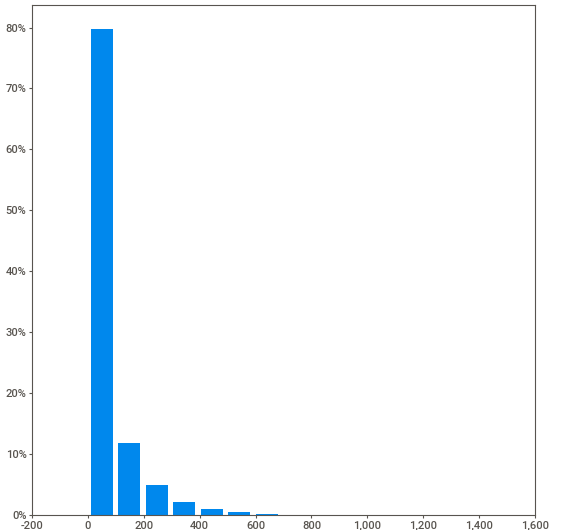
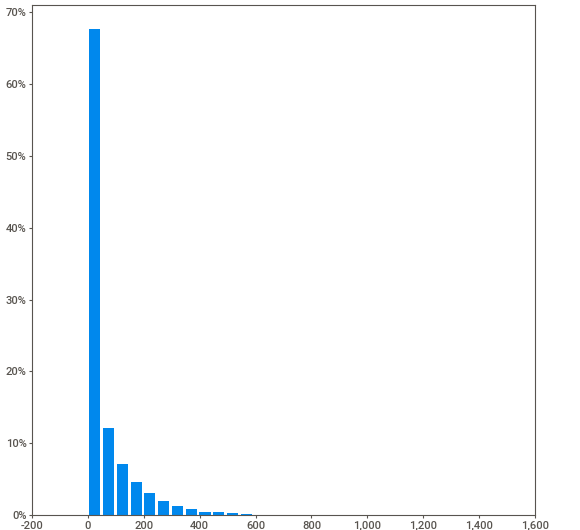
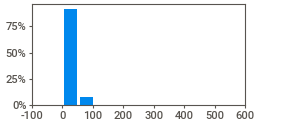
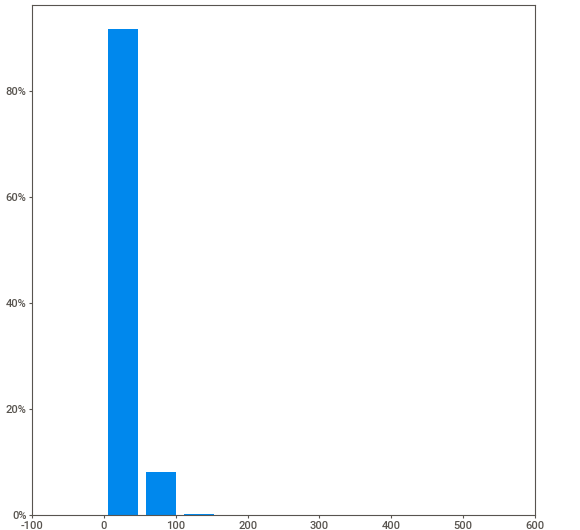
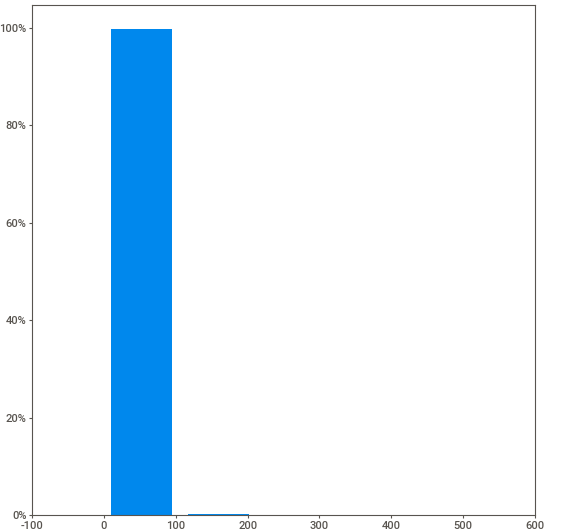
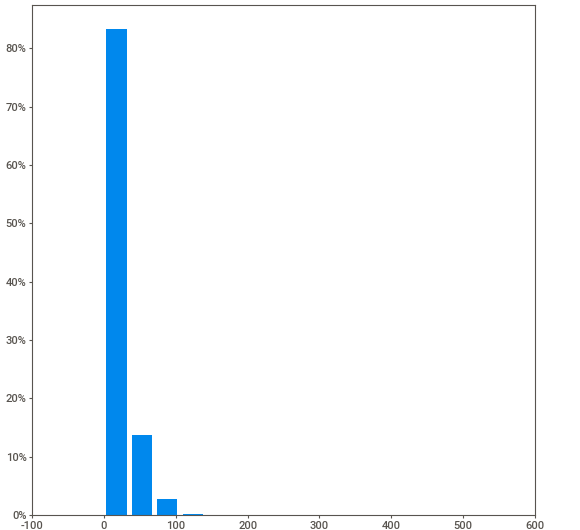
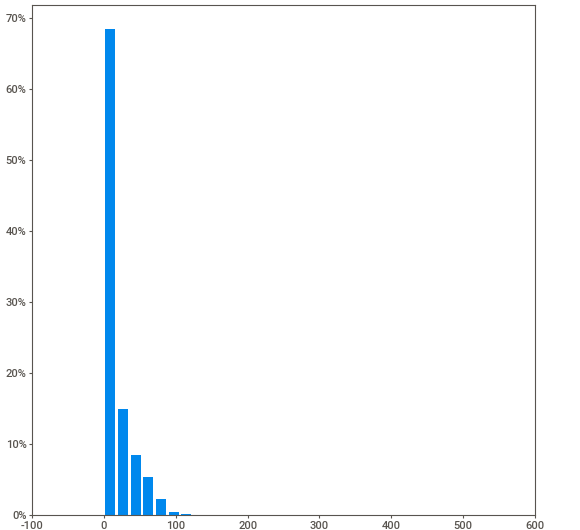
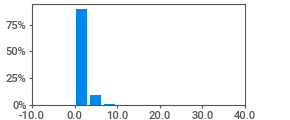
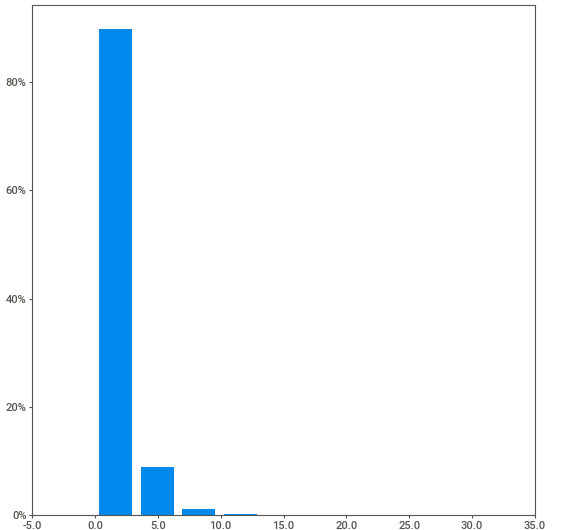
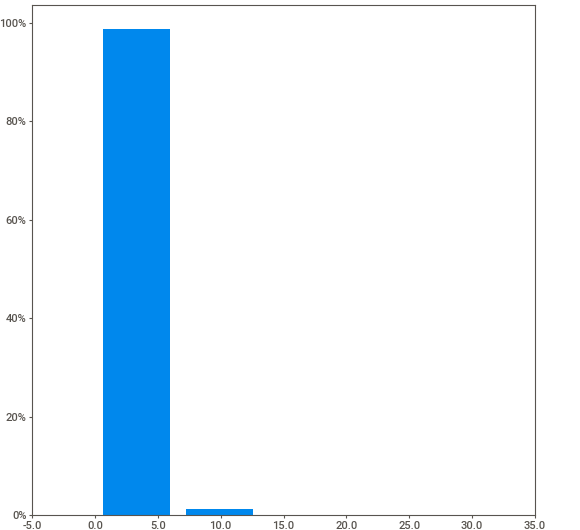
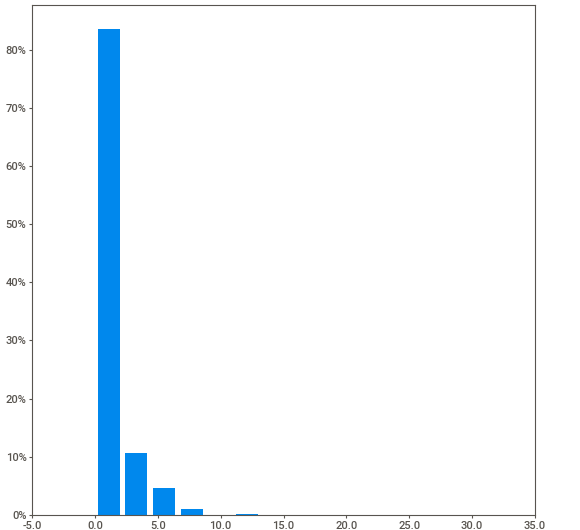
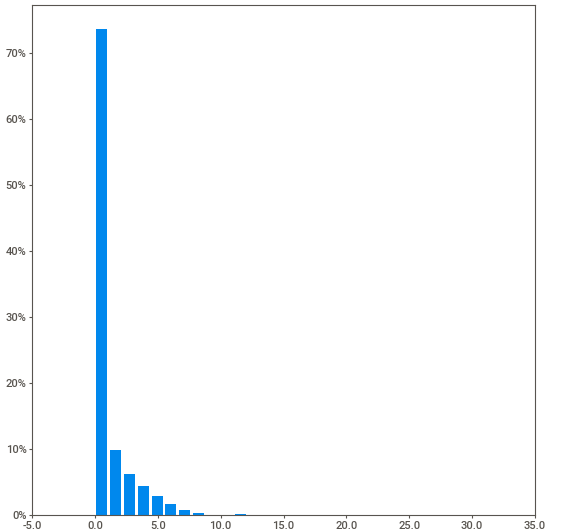
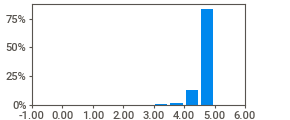
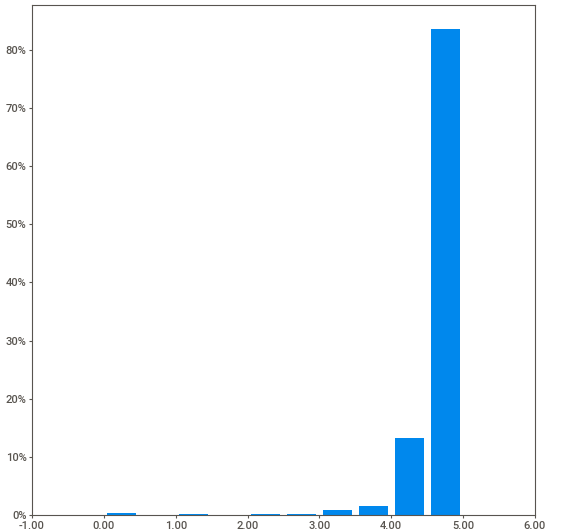
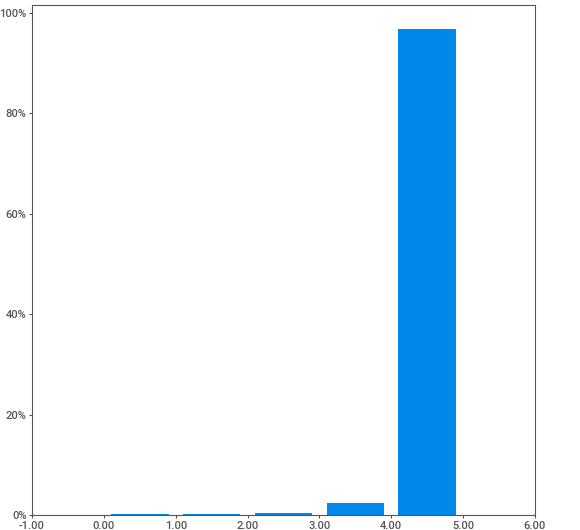
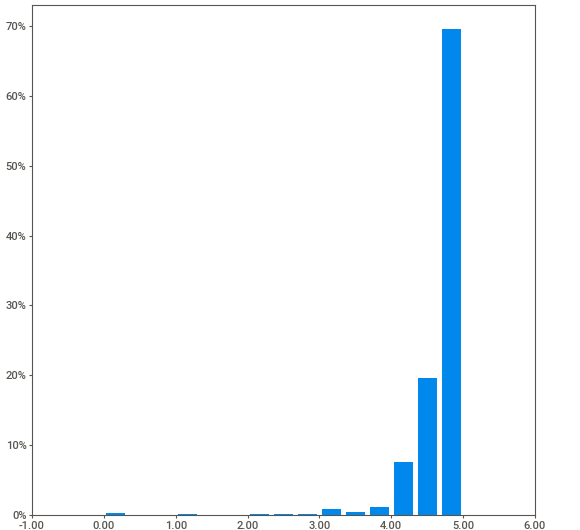
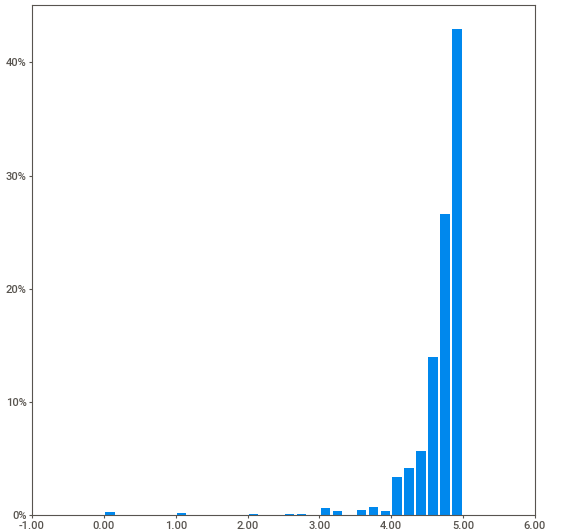
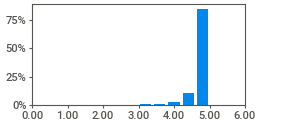
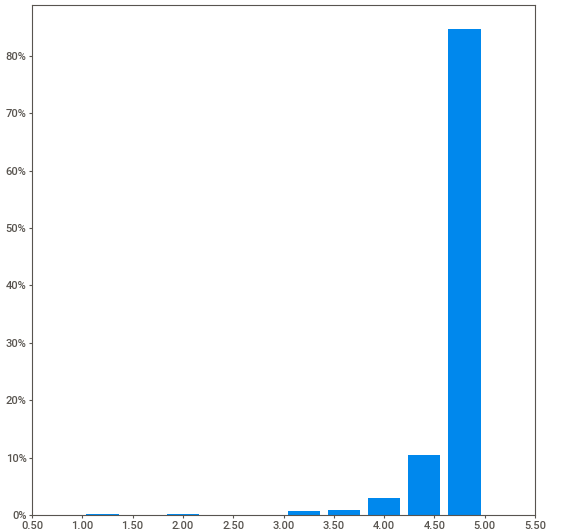
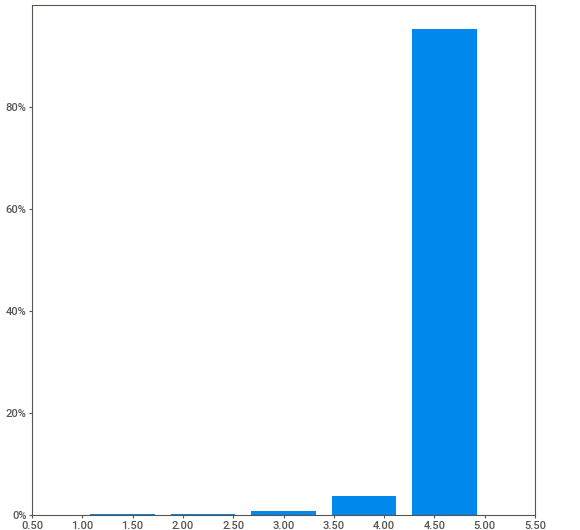
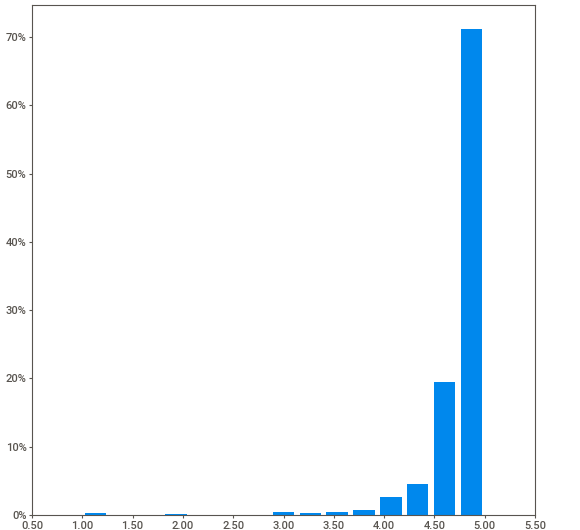
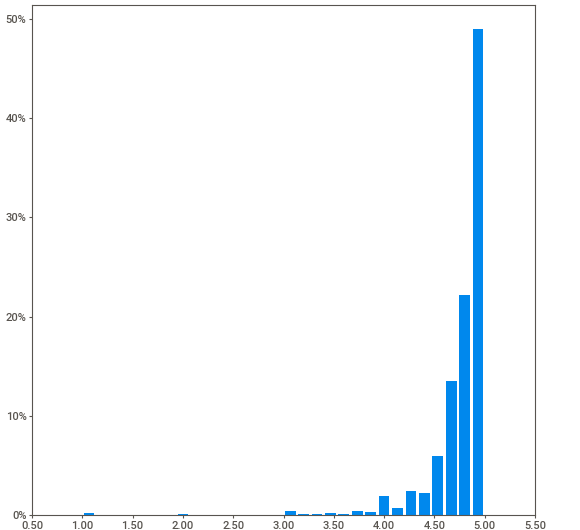
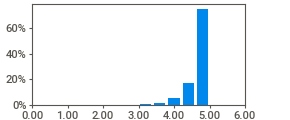
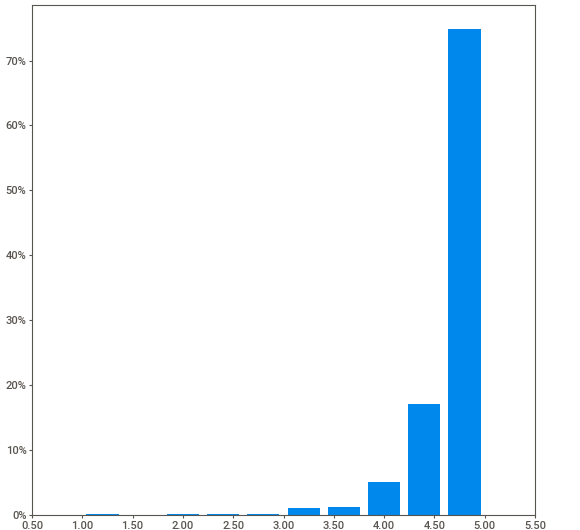
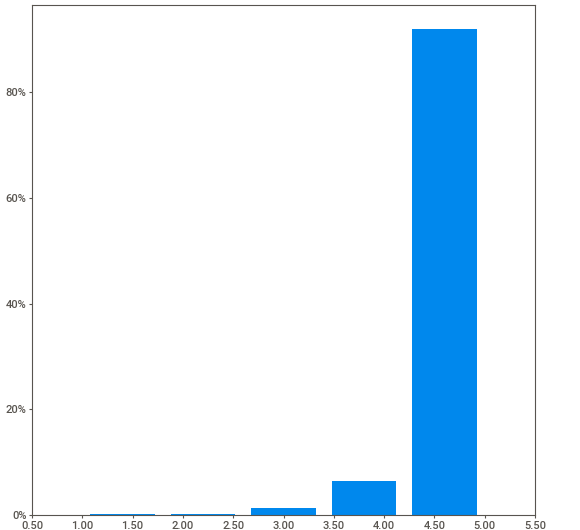
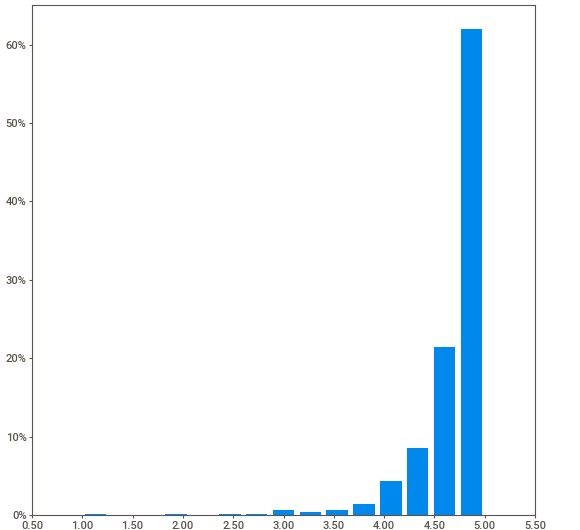
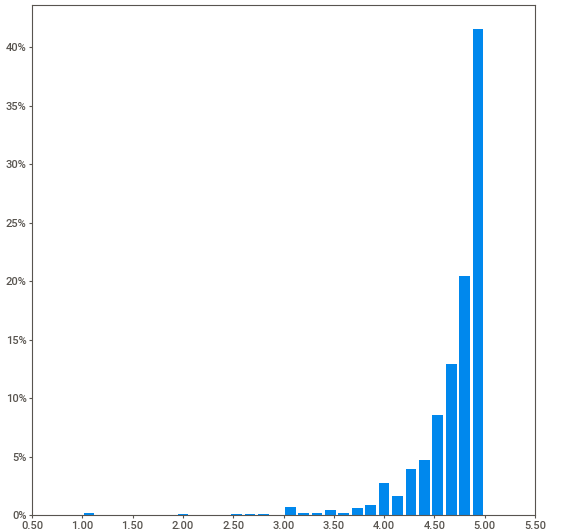
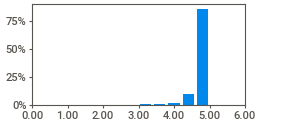
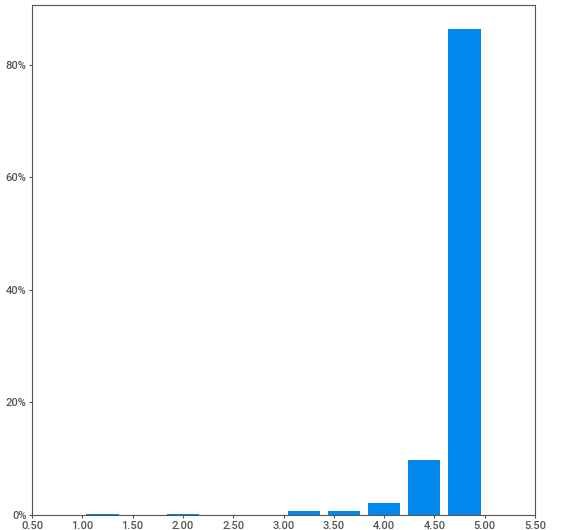
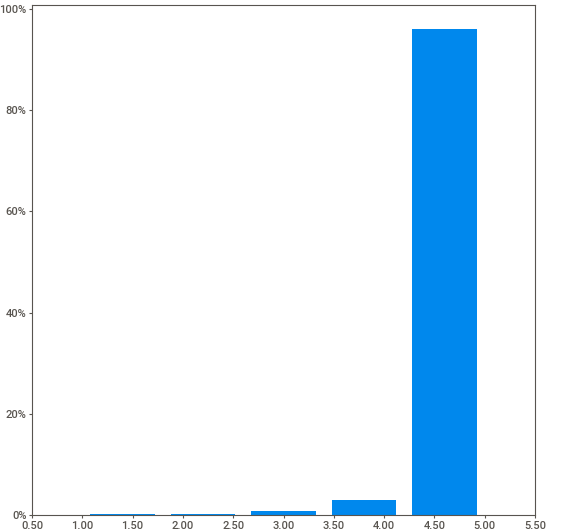
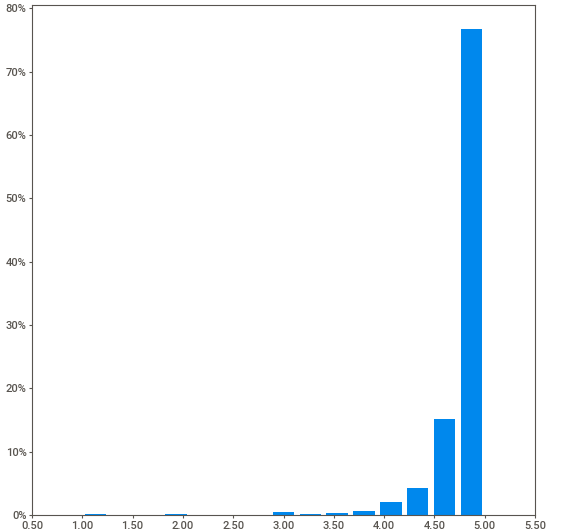
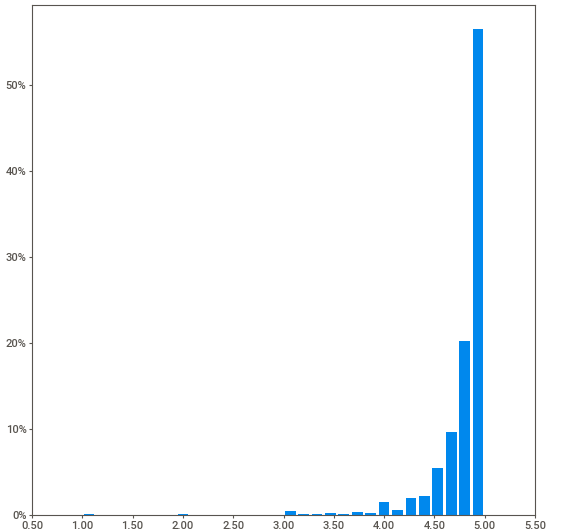
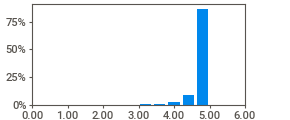
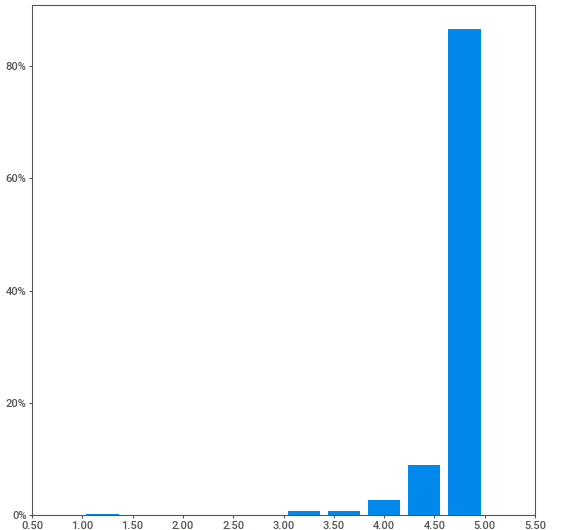
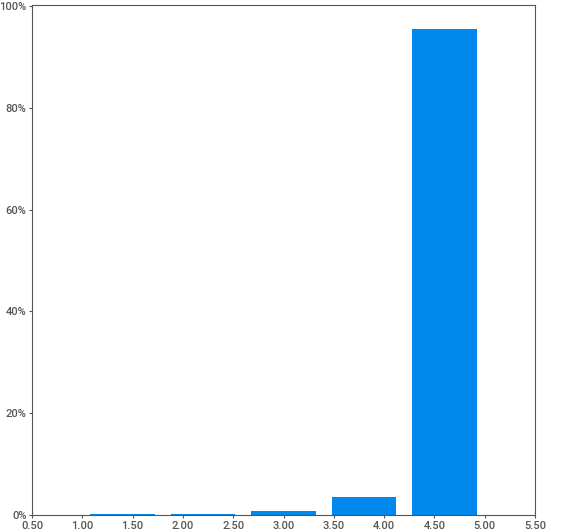
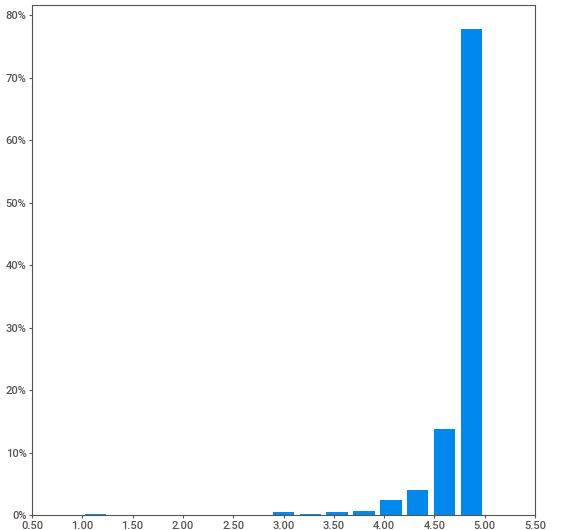
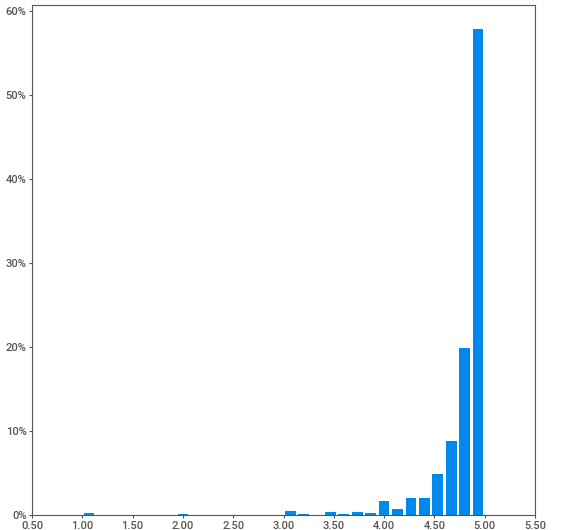
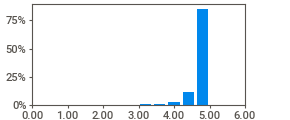
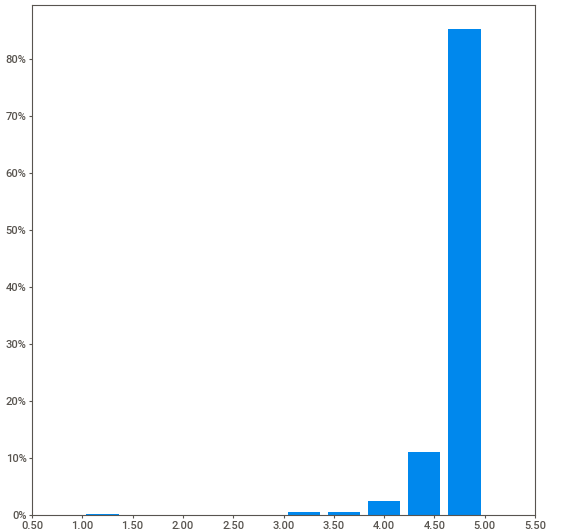
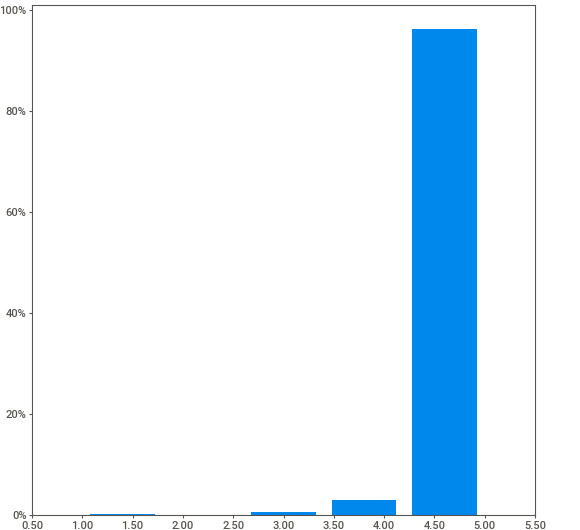
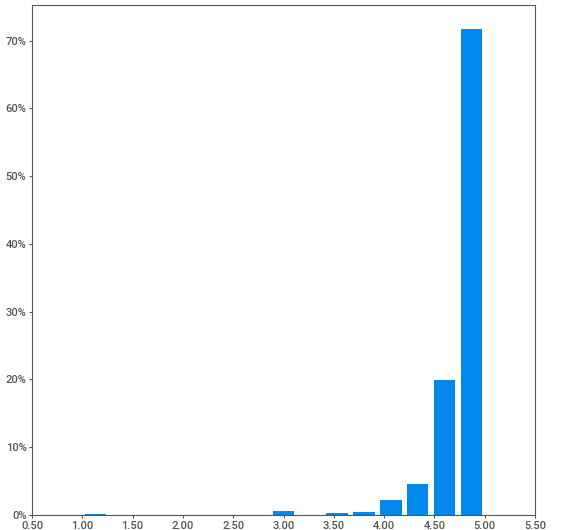
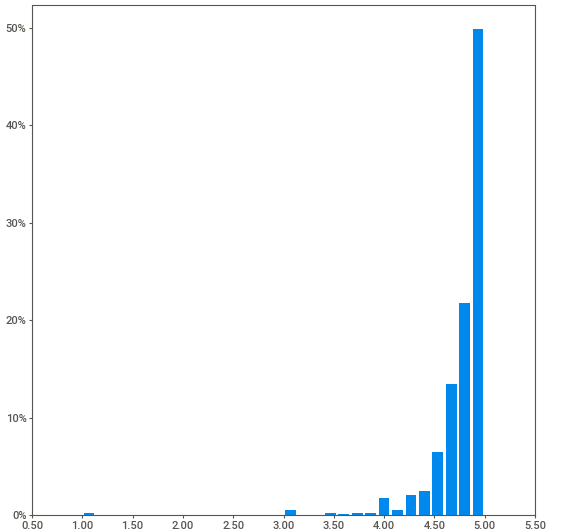
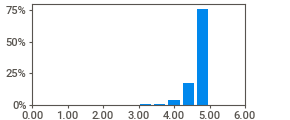
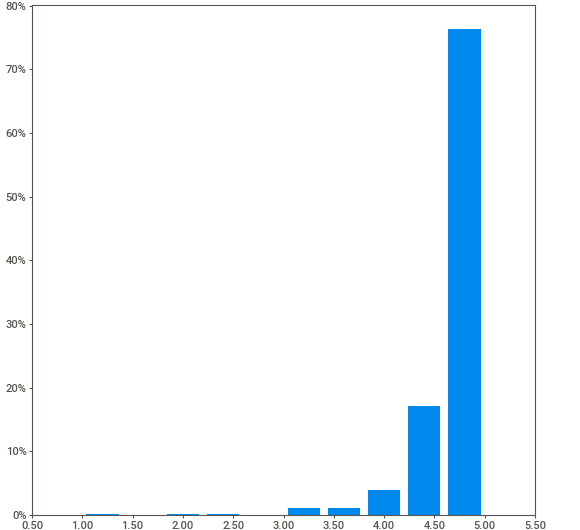
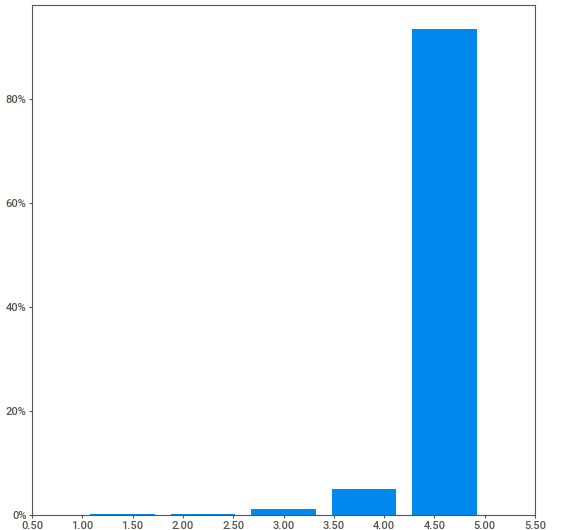
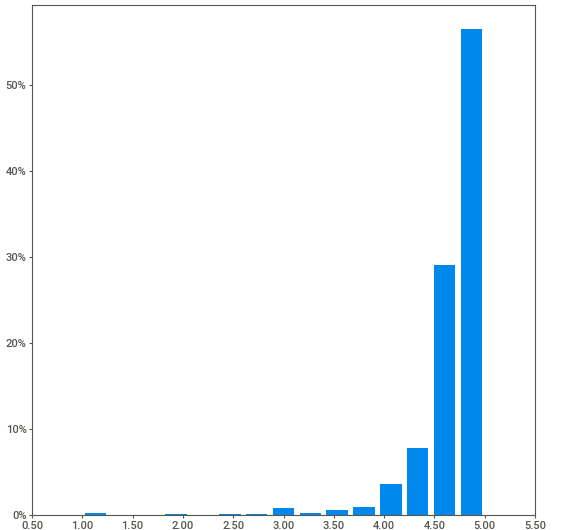
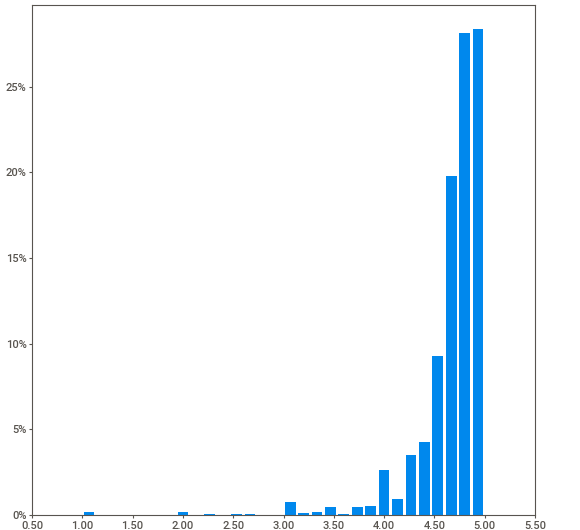
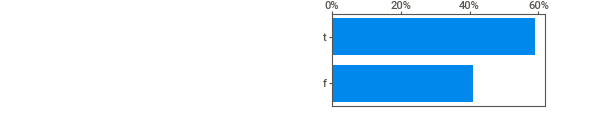
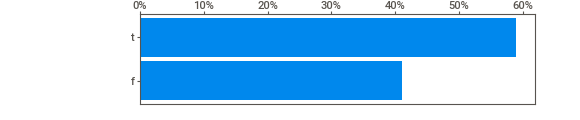
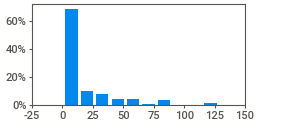
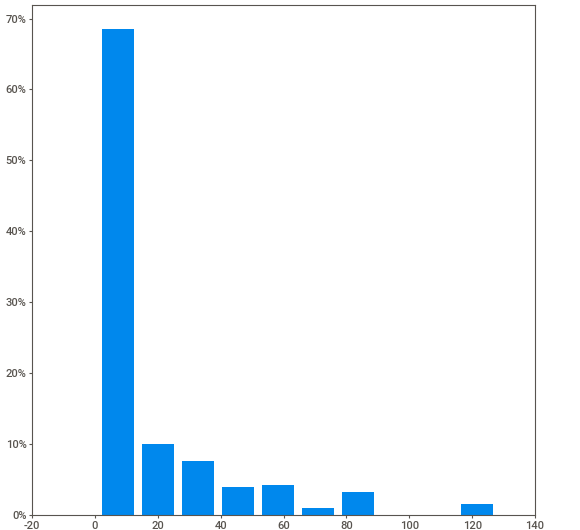
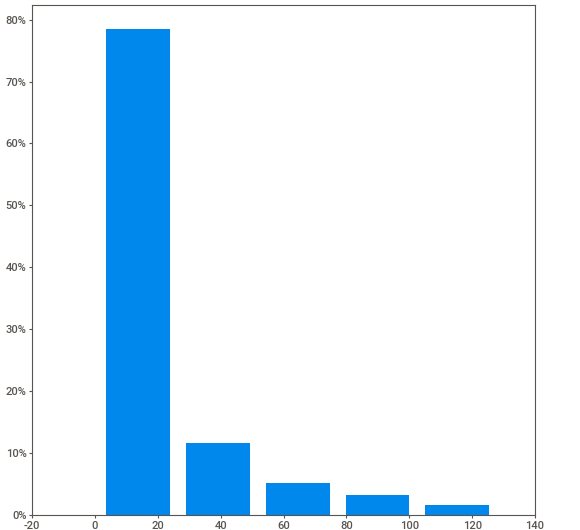
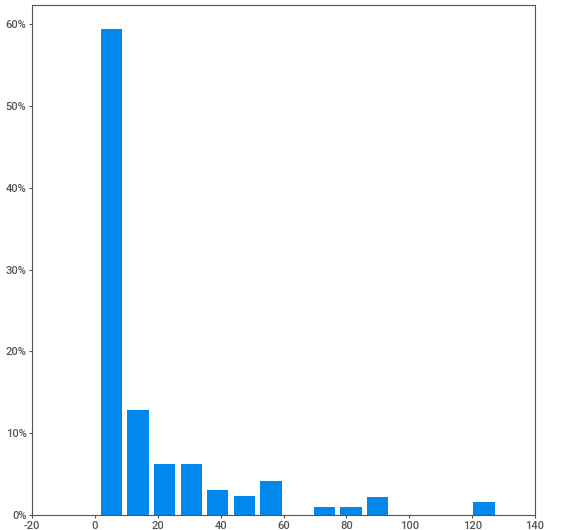
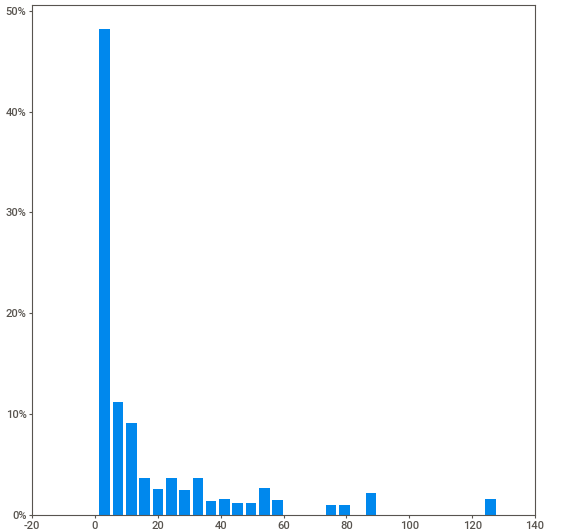
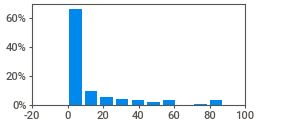
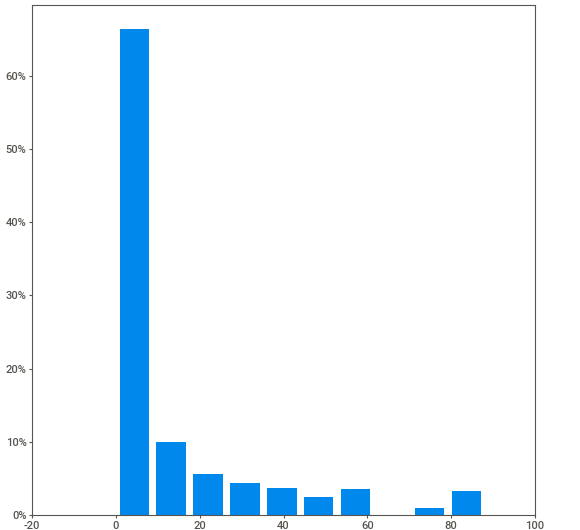
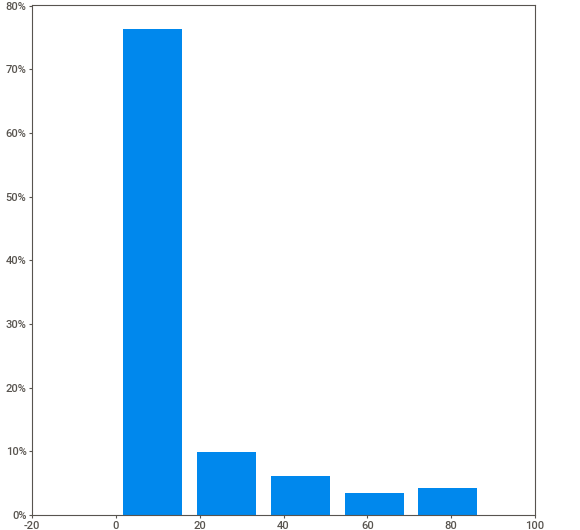
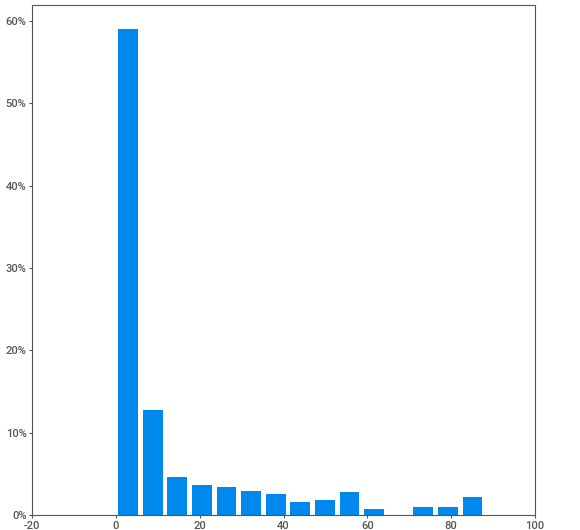
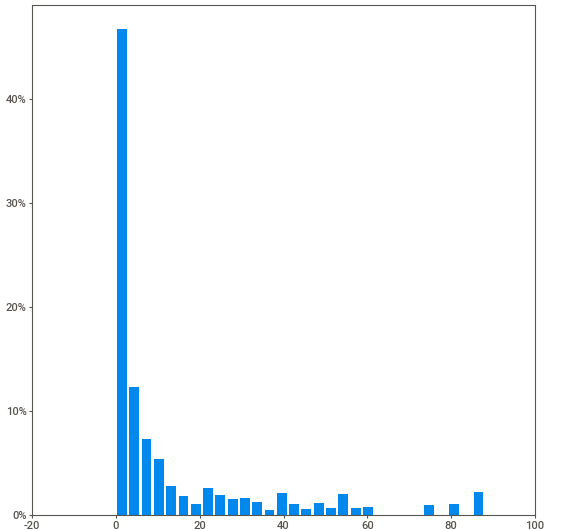
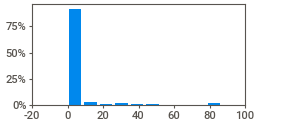
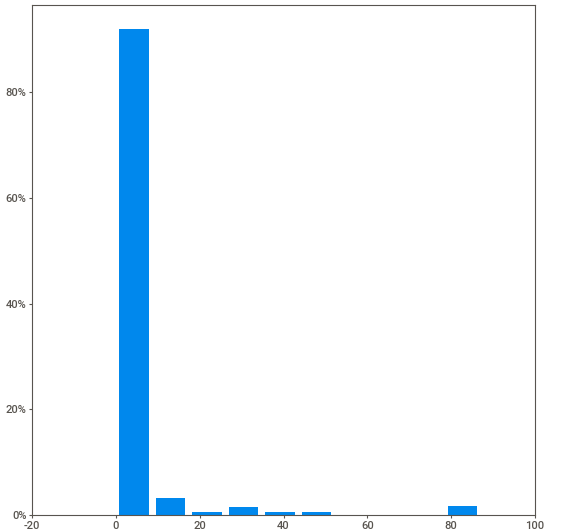
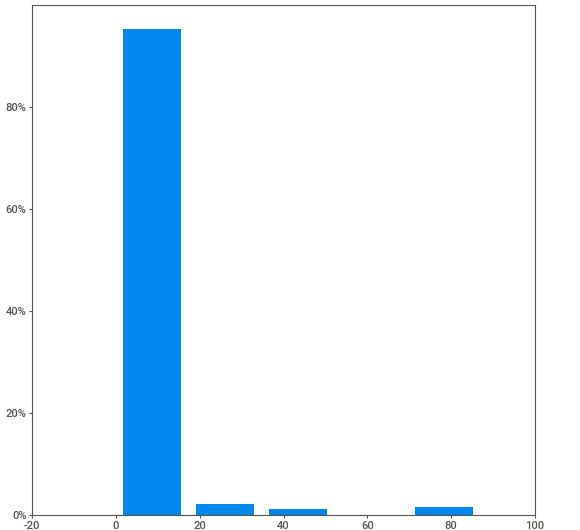
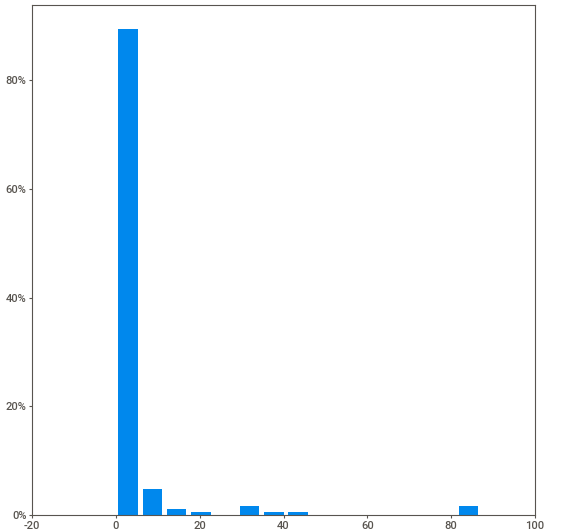
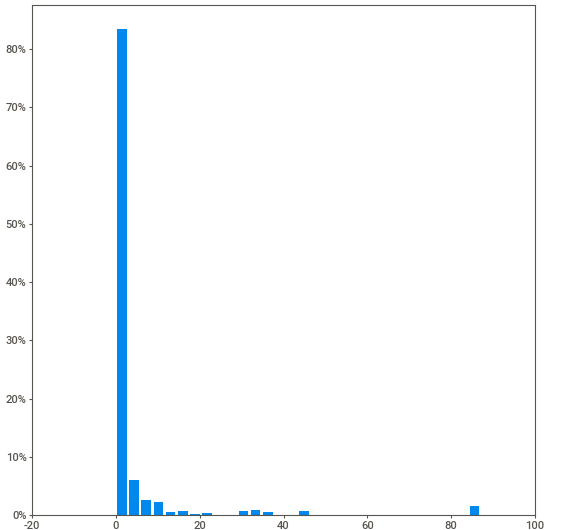
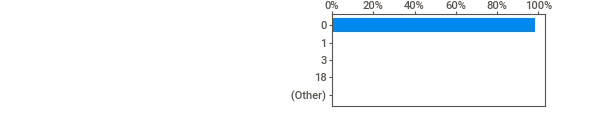
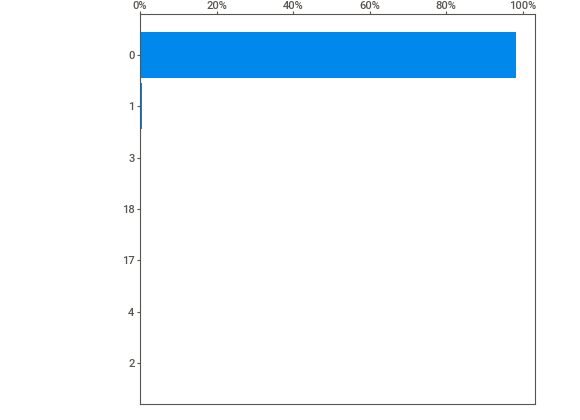
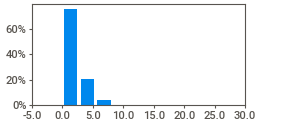
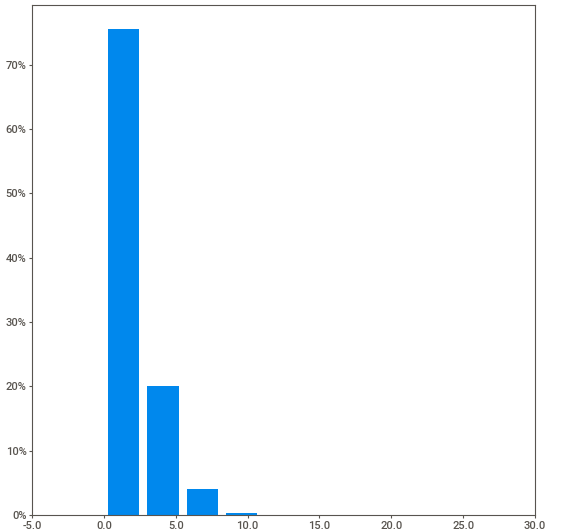
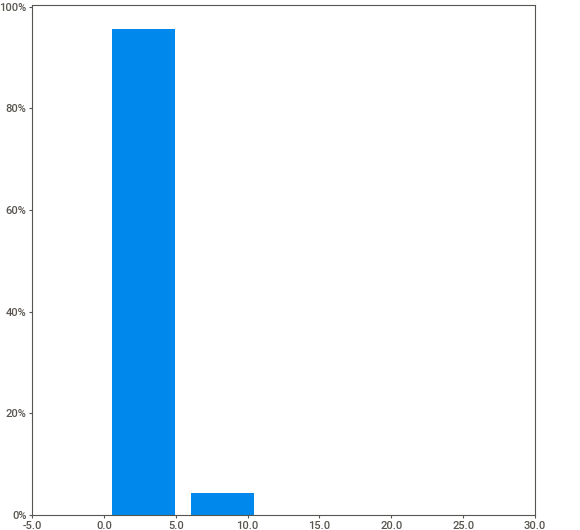
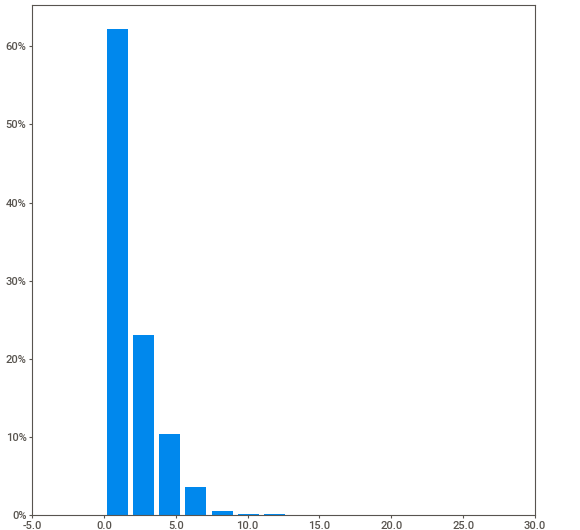
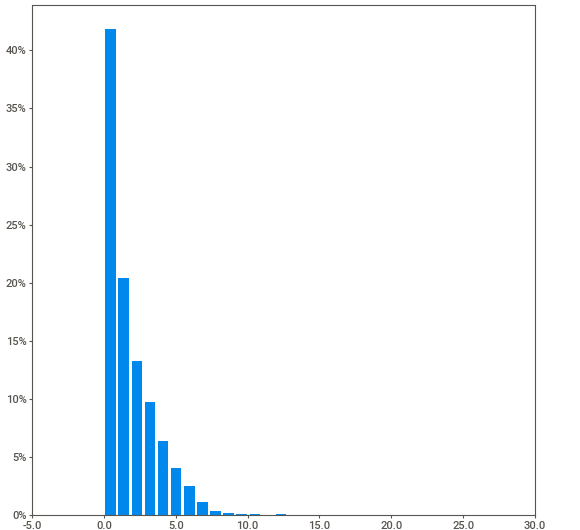

In [ ]:
#przy wstępnej analizie zdecydowanie pomoże sweetviz
import sweetviz as sv

my_report = sv.analyze(df, pairwise_analysis="off")
my_report.show_notebook()

## 3. Wyświetlenie próbki surowych danych - poznanie struktury danych i przydatności poszczególnych zmiennych.

#### W tym punkcie możemy dokładniej zweryfikować jakiego typu wartości pojawiają się w poszczególnych kolumnach.
#### Następnie weryfikuję ilość nulli.

In [ ]:
pd.options.display.max_rows = 5
df

id                                      listing_url  \
0                   3884                https://www.airbnb.com/rooms/3884   
1                 668880              https://www.airbnb.com/rooms/668880   
...                  ...                                              ...   
7938  786898719622611072  https://www.airbnb.com/rooms/786898719622611072   
7939  786905264333225137  https://www.airbnb.com/rooms/786905264333225137   

           scrape_id last_scraped           source  \
0     20221223064821   2022-12-23  previous scrape   
1     20221223064821   2022-12-23      city scrape   
...              ...          ...              ...   
7938  20221223064821   2022-12-23      city scrape   
7939  20221223064821   2022-12-23      city scrape   

                                    name  \
0       Enjoy/relax/hide Old Town Prague   
1     City Center Heights No.5 1-Bedroom   
...                                  ...   
7938       Gorgeous Old Prague Apartment   
7939                        Konevova 005   

                                            description  \
0     <b>The space</b><br />for detailed info see ht...   
1     1 bedroom apartment with A/C  can accommodate ...   
...                                                 ...   
7938  Z tohoto unikátního ubytování je to blízko všu...   
7939  Welcome to our brand new, peaceful and crisp a...   

                                  neighborhood_overview  \
0     Surpricing quiet atmosphere,  the street is cl...   
1                                                   NaN   
...                                                 ...   
7938                                                NaN   
7939                                                NaN   

                                            picture_url    host_id  ...  \
0     https://a0.muscache.com/pictures/8072/27c136d4...       3128  ...   
1     https://a0.muscache.com/pictures/79680420/7226...    2635161  ...   
...                                                 ...        ...  ...   
7938  https://a0.muscache.com/pictures/miso/Hosting-...    5297514  ...   
7939  https://a0.muscache.com/pictures/miso/Hosting-...  466419900  ...   

     review_scores_communication review_scores_location review_scores_value  \
0                           5.00                    5.0                4.50   
1                           4.93                    5.0                4.58   
...                          ...                    ...                 ...   
7938                         NaN                    NaN                 NaN   
7939                         NaN                    NaN                 NaN   

     license instant_bookable calculated_host_listings_count  \
0        NaN                f                              1   
1        NaN                f                              4   
...      ...              ...                            ...   
7938     NaN                t                             14   
7939     NaN                t                             25   

     calculated_host_listings_count_entire_homes  \
0                                              1   
1                                              4   
...                                          ...   
7938                                          11   
7939                                          25   

     calculated_host_listings_count_private_rooms  \
0                                               0   
1                                               0   
...                                           ...   
7938                                            2   
7939                                            0   

     calculated_host_listings_count_shared_rooms reviews_per_month  
0                                              0              0.01  
1                                              0              0.48  
...                                          ...               ...  
7938                                    

In [ ]:
pd.options.display.max_rows = None
df.isnull().sum().sort_values(ascending=False)

license                                         7940
neighbourhood_group_cleansed                    7940
bathrooms                                       7940
calendar_updated                                7940
neighbourhood                                   3665
neighborhood_overview                           3665
host_about                                      3138
host_location                                   1578
review_scores_value                             1190
review_scores_location                          1190
review_scores_checkin                           1190
review_scores_accuracy                          1190
review_scores_communication                     1189
review_scores_cleanliness                       1189
reviews_per_month                               1168
first_review                                    1168
last_review                                     1168
review_scores_rating                            1168
host_response_time                            

## 4. Weryfikacja typów poszczególnych zmiennych

In [ ]:
#Kolumny posortowane według typu danych
df.dtypes.sort_values(ascending=False)

host_is_superhost                                object
bathrooms_text                                   object
host_picture_url                                 object
host_neighbourhood                               object
has_availability                                 object
calendar_last_scraped                            object
host_verifications                               object
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood                                    object
neighbourhood_cleansed                           object
first_review                                     object
price                                            object
amenities                                        object
property_type                                    object
room_type                                        object
last_review                                      object
host_thumbnail_url                              

In [ ]:
#statystyki dla zmiennych innych niż numeryczne
df.describe(exclude=np.number)

listing_url last_scraped       source  \
count                                7940         7940         7940   
unique                               7940            1            2   
top     https://www.airbnb.com/rooms/3884   2022-12-23  city scrape   
freq                                    1         7940         7199   

                                        name  \
count                                   7939   
unique                                  7641   
top     City centre room in shared apartment   
freq                                      23   

                                              description  \
count                                                7805   
unique                                               6683   
top     I offer beautiful accommodation near the cente...   
freq                                                   66   

                                    neighborhood_overview  \
count                                                4275   
unique                                               2750   
top     Check my guidebook for this apartment to disco...   
freq                                                   49   

                                              picture_url  \
count                                                7940   
unique                                               7615   
top     https://a0.muscache.com/pictures/e6f2cb82-f5e4...   
freq                                                   18   

                                           host_url host_name  host_since  \
count                                          7940      7940        7940   
unique                                         2828      1207        1943   
top     https://www.airbnb.com/users/show/380471389     Jakub  2020-12-16   
freq                                            128       281         128   

        ...       property_type        room_type bathrooms_text  \
count   ...                7940             7940           7911   
unique  ...                  59                4             34   
top     ...  Entire rental unit  Entire home/apt         1 bath   
freq    ...                4201             6212           4447   

                          amenities      price has_availability  \
count                          7940       7940             7940   
unique                         6931       3257                2   
top     ["Long term stays allowed"]  $1,200.00                t   
freq                             99         76             7927   

       calendar_last_scraped first_review last_review instant_bookable  
count                   7940         6772        6772             7940  
unique                     1         2376         899                2  
top               2022-12-23   2022-06-06  2022-12-04                t  
freq                    7940           30         314             4682  

[4 rows x 34 columns]

In [ ]:
#usuwam kolumny które po wstępnej weryfikacji uznałem że nie będą potrzebne w dalszej analizie - są to głównie kolumny opisowe i takie które nie mają uzupełnionych żadnych wartości
df.drop(['source','host_name','last_review', 'host_url', 'last_scraped', 'listing_url', 'calendar_last_scraped', 'host_thumbnail_url', 'scrape_id', 'calendar_updated', 'license', 'host_about', 'name', 'description', 'neighborhood_overview', 'neighbourhood_group_cleansed'], axis=1, inplace=True)
#weryfikuję zmiany
df.head(2)

id                                        picture_url  host_id  \
0    3884  https://a0.muscache.com/pictures/8072/27c136d4...     3128   
1  668880  https://a0.muscache.com/pictures/79680420/7226...  2635161   

   host_since    host_location  host_response_time host_response_rate  \
0  2008-09-23              NaN                 NaN                NaN   
1  2012-06-14  Prague, Czechia  within a few hours               100%   

  host_acceptance_rate host_is_superhost  \
0                  NaN                 f   
1                  93%                 f   

                                    host_picture_url  ...  \
0  https://a0.muscache.com/im/users/3128/profile_...  ...   
1  https://a0.muscache.com/im/users/2635161/profi...  ...   

  review_scores_checkin  review_scores_communication  review_scores_location  \
0                  4.00                         5.00                     5.0   
1                  4.89                         4.93                     5.0   

  review_scores_value instant_bookable calculated_host_listings_count  \
0                4.50                f                              1   
1                4.58                f                              4   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           4   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            0               0.01  
1                                            0               0.48  

[2 rows x 59 columns]

In [ ]:
#zmienne typu object
df.select_dtypes(include=object).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7940 entries, 0 to 7939
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   picture_url             7940 non-null   object
 1   host_since              7940 non-null   object
 2   host_location           6362 non-null   object
 3   host_response_time      6884 non-null   object
 4   host_response_rate      6884 non-null   object
 5   host_acceptance_rate    7254 non-null   object
 6   host_is_superhost       7935 non-null   object
 7   host_picture_url        7940 non-null   object
 8   host_neighbourhood      7098 non-null   object
 9   host_verifications      7940 non-null   object
 10  host_has_profile_pic    7940 non-null   object
 11  host_identity_verified  7940 non-null   object
 12  neighbourhood           4275 non-null   object
 13  neighbourhood_cleansed  7940 non-null   object
 14  property_type           7940 non-null   object
 15  room

In [ ]:
#od razu możemy zauważyć że zmienna price w aktualnym formacie nie będzie nam przydatna, konieczne jest usunięcie znaku dolara oraz przekonwertowanie jej na float64
df['price'].unique()

array(['$1,428.00', '$2,832.00', '$3,918.00', ..., '$2,152.00', '$987.00',
       '$4,367.00'], dtype=object)

In [ ]:
#korekta zmiennej price na float
df.price = df.price.str.replace('[$,]', '').astype(np.float64)

In [ ]:
#już w tym momencie można zauważyć że w zbiorze są obserwacje odstające wśród zmiennej price
pd.options.display.float_format = '{:.2f}'.format
df['price'].describe()

count      7940.00
mean       4467.84
std       26225.02
min           0.00
25%        1614.75
50%        2573.50
75%        4164.00
max     1578111.00
Name: price, dtype: float64

In [ ]:
#wyswietlam unikalne wartości w poszczególnych kolumnach
for i in df.columns.tolist():
   print(f'{i}')
   print(df[i].unique())

id
[              3884             668880             668902 ...
 786870083561322462 786898719622611072 786905264333225137]
picture_url
['https://a0.muscache.com/pictures/8072/27c136d4_original.jpg'
 'https://a0.muscache.com/pictures/79680420/7226a9df_original.jpg'
 'https://a0.muscache.com/pictures/79677524/b23949e3_original.jpg' ...
 'https://a0.muscache.com/pictures/miso/Hosting-786870083561322462/original/a3e6ae30-1682-4534-af6f-26ac5c2511a2.jpeg'
 'https://a0.muscache.com/pictures/miso/Hosting-786898719622611072/original/e9d30777-c29f-42b8-aff0-0c7488fc7d4f.jpeg'
 'https://a0.muscache.com/pictures/miso/Hosting-767284145686917917/original/4f341342-945d-499a-820a-2e94cc1ca6ce.png']
host_id
[     3128   2635161   4160716 ...  15844761 123409238 492269421]
host_since
['2008-09-23' '2012-06-14' '2012-11-15' ... '2015-10-21' '2020-08-11'
 '2022-12-21']
host_location
[nan 'Prague, Czechia' 'Tel Aviv, Israel' 'Rio de Janeiro, Brazil'
 'Saint Moritz, Switzerland' 'Tunis, Tunisia'
 'Hlavní 

In [ ]:
#weryfikuję zmienne object
pd.options.display.max_rows = 5
df.select_dtypes(include=object)

picture_url  host_since  \
0     https://a0.muscache.com/pictures/8072/27c136d4...  2008-09-23   
1     https://a0.muscache.com/pictures/79680420/7226...  2012-06-14   
...                                                 ...         ...   
7938  https://a0.muscache.com/pictures/miso/Hosting-...  2013-03-03   
7939  https://a0.muscache.com/pictures/miso/Hosting-...  2022-06-27   

        host_location  host_response_time host_response_rate  \
0                 NaN                 NaN                NaN   
1     Prague, Czechia  within a few hours               100%   
...               ...                 ...                ...   
7938  Prague, Czechia      within an hour                97%   
7939  Prague, Czechia      within an hour                99%   

     host_acceptance_rate host_is_superhost  \
0                     NaN                 f   
1                     93%                 f   
...                   ...               ...   
7938                  90%                 f   
7939                 100%                 f   

                                       host_picture_url host_neighbourhood  \
0     https://a0.muscache.com/im/users/3128/profile_...                NaN   
1     https://a0.muscache.com/im/users/2635161/profi...            Josefov   
...                                                 ...                ...   
7938  https://a0.muscache.com/im/users/5297514/profi...            Josefov   
7939  https://a0.muscache.com/im/pictures/user/ee774...             Žižkov   

                    host_verifications  ... host_identity_verified  \
0                   ['email', 'phone']  ...                      f   
1                   ['email', 'phone']  ...                      t   
...                                ...  ...                    ...   
7938  ['email', 'phone', 'work_email']  ...                      t   
7939                ['email', 'phone']  ...                      t   

        neighbourhood neighbourhood_cleansed       property_type  \
0     Prague, Czechia                Praha 1  Entire rental unit   
1                 NaN                Praha 1  Entire rental unit   
...               ...                    ...                 ...   
7938              NaN                Praha 1  Entire rental unit   
7939              NaN                Praha 3  Entire rental unit   

            room_type bathrooms_text  \
0     Entire home/apt      1.5 baths   
1     Entire home/apt         1 bath   
...               ...            ...   
7938  Entire home/apt         1 bath   
7939  Entire home/apt         1 bath   

                                              amenities has_availability  \
0     ["Heating", "Refrigerator", "Bathtub", "Wifi",...                t   
1     ["Heating", "TV with standard cable", "Essenti...                t   
...                                                 ...              ...   
7938  ["Long term stays allowed", "Kitchen", "Smoke ...                t   
7939  ["Stove", "Heating", "Pack \u2019n play/Travel...                t   

     first_review instant_bookable  
0      2012-01-07                f  
1      2015-04-06                f  
...           ...              ...  
7938          NaN                t  
7939          NaN                t  

[7940 rows x 21 columns]

In [ ]:
#zauważam że w zbiorze danych istnieją również inne zmienne które łatwo możemy zinterpretować jako numeryczne, dotyczą one szybkości odpowiedzi i akceptacji hosta
#konwertuję wartości procentowe do float
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype('float64')/100
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype('float64')/100

#w zbiorze znajduje się również kilka zmiennych True/False które aktualnie nie są typem Bool'owskim a zwykłym tekstem -> mapuję je do właściwego typu
#mapuję znaczniki t/f do typu Bool
df = df[df['host_is_superhost'].notna()]   #tylko 5 rekordów posiada wartości null, usuwam je żeby zachować jak najwięcej zmiennych typu Bool
df.host_is_superhost = df.host_is_superhost.map({'t': True, 'f': False})
df.host_identity_verified = df.host_identity_verified.map({'t': True, 'f': False})
df.has_availability = df.has_availability.map({'t': True, 'f': False})
df.instant_bookable = df.instant_bookable.map({'t': True, 'f': False})
df.host_has_profile_pic = df.host_has_profile_pic.map({'t': True, 'f': False})

In [ ]:
#po zweryfikowaniu unikalnych wartości w poniższych kategoriach konwertuję je na zmienne kategoryczne
df.room_type = df.room_type.astype('category')
df.host_response_time = df.host_response_time.astype('category')
df.property_type = df.property_type.astype('category')

#informacje o zbiorze po wstępnym czyszczeniu i korekcie typów: dtypes: bool(5), category(3), float64(18), int64(22), object(11)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7935 entries, 0 to 7939
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            7935 non-null   int64   
 1   picture_url                                   7935 non-null   object  
 2   host_id                                       7935 non-null   int64   
 3   host_since                                    7935 non-null   object  
 4   host_location                                 6362 non-null   object  
 5   host_response_time                            6880 non-null   category
 6   host_response_rate                            6880 non-null   float64 
 7   host_acceptance_rate                          7250 non-null   float64 
 8   host_is_superhost                             7935 non-null   bool    
 9   host_picture_url                              7935 n

<ipython-input-21-a6b783da3ccc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.room_type = df.room_type.astype('category')
<ipython-input-21-a6b783da3ccc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.host_response_time = df.host_response_time.astype('category')
<ipython-input-21-a6b783da3ccc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

## 5. Podsumowanie zmiennych opisujących zbiór
#### Po wstępnej konwersji typów danych i usunięciu zbędnych kolumn

### a) zmienne numeryczne
#### tabela zawierające podstawowe informacje o poszczególnych zmiennych - nie wskazuje ona bezpośrednio ilości rekordów pustych, aby ją uzyskać trzeba od całkowitej liczby rekordów odjąć zliczone wartości w poszczególnych kolumnach

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.select_dtypes(include = 'number').describe()

id      host_id  host_response_rate  \
count               7935.00      7935.00             6880.00   
mean  193329241734854304.00 152036712.75                0.94   
std   312400104446230464.00 159994698.84                0.17   
min                 3884.00      2738.00                0.00   
25%             18969060.00  15683232.00                0.99   
50%             38273238.00  81230345.00                1.00   
75%   602752573151553152.00 257779276.00                1.00   
max   787592455865712896.00 492269421.00                1.00   

       host_acceptance_rate  host_listings_count  host_total_listings_count  \
count               7250.00              7935.00                    7935.00   
mean                   0.91                25.20                      37.40   
std                    0.21               105.73                     184.89   
min                    0.00                 0.00                       0.00   
25%                    0.94                 2.00                       3.00   
50%                    1.00                 6.00                       8.00   
75%                    1.00                25.00                      32.00   
max                    1.00              1797.00                    5136.00   

       latitude  longitude  accommodates  bathrooms  bedrooms    beds  \
count   7935.00    7935.00       7935.00       0.00   7132.00 7681.00   
mean      50.08      14.43          3.90        NaN      1.47    2.57   
std        0.02       0.03          2.50        NaN      0.96    2.24   
min       49.95      14.28          1.00        NaN      1.00    1.00   
25%       50.07      14.42          2.00        NaN      1.00    1.00   
50%       50.08      14.43          4.00        NaN      1.00    2.00   
75%       50.09      14.45          4.00        NaN      2.00    3.00   
max       50.17      14.68         16.00        NaN     26.00   32.00   

           price  minimum_nights  maximum_nights  minimum_minimum_nights  \
count    7935.00         7935.00         7935.00                 7935.00   
mean     4470.66            5.98          635.66                    5.44   
std     26233.05           31.51          479.61                   28.35   
min       236.00            1.00            1.00                    1.00   
25%      1621.00            1.00          180.00                    1.00   
50%      2576.00            2.00          365.00                    2.00   
75%      4167.00            2.00         1125.00                    2.00   
max   1578111.00         1100.00         9000.00                 1100.00   

       maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
count                 7935.00                 7935.00                 7935.00   
mean                    10.62                  719.86                  775.27   
std                     40.70                  468.26                  448.10   
min                      1.00                    1.00                    1.00   
25%                      2.00                  365.00                  365.00   
50%                      3.00                 1125.00                 1125.00   
75%                      4.00                 1125.00                 1125.00   
max                   1100.00                 3333.00                 3333.00   

       minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  \
count                 7935.00                 7935.00          7935.00   
mean                     8.21                  753.06            12.68   
std                     36.11                  450.90             9.97   
min                      1.00                    1.00             0.00   
25%                      1.00                  365.00             2.00   
50%                      2.00                 1125.00            13.00   
75%                      3.00                 1125.00            21.00   
max                   1100.00                 3333.00            30.00 

In [ ]:
#ilość nulli w poszczególnych kolumnach numerycznych po wstępnej obróbce
df_nb = df.select_dtypes(include = 'number').isna().sum()
df_nb[df_nb.values > 0].sort_values(ascending=False)

bathrooms                      7935
review_scores_accuracy         1188
review_scores_checkin          1188
review_scores_location         1188
review_scores_value            1188
review_scores_cleanliness      1187
review_scores_communication    1187
review_scores_rating           1166
reviews_per_month              1166
host_response_rate             1055
bedrooms                        803
host_acceptance_rate            685
beds                            254
dtype: int64

### b) zmienne kategoryczne

In [ ]:
df.select_dtypes(include = 'category').describe()

host_response_time       property_type        room_type
count                6880                7935             7935
unique                  4                  59                4
top        within an hour  Entire rental unit  Entire home/apt
freq                 5446                4201             6212

In [ ]:
#ilość nulli w poszczególnych kolumnach kategorycznych
df_nc = df.select_dtypes(include = 'category').isna().sum()
df_nc[df_nc.values > 0].sort_values(ascending=False)

host_response_time    1055
dtype: int64

### c) pozostałe

In [ ]:
df.select_dtypes(include = 'object').describe()

picture_url  host_since  \
count                                                7935        7935   
unique                                               7610        1942   
top     https://a0.muscache.com/pictures/e6f2cb82-f5e4...  2020-12-16   
freq                                                   18         128   

          host_location                                   host_picture_url  \
count              6362                                               7935   
unique              172                                               2758   
top     Prague, Czechia  https://a0.muscache.com/defaults/user_pic-225x...   
freq               5544                                                132   

       host_neighbourhood  host_verifications                neighbourhood  \
count                7093                7935                         4275   
unique                122                   6                          223   
top           Staré Město  ['email', 'phone']  Hlavní město Praha, Czechia   
freq                 1626                5909                          793   

       neighbourhood_cleansed bathrooms_text                    amenities  \
count                    7935           7911                         7935   
unique                     49             34                         6926   
top                   Praha 1         1 bath  ["Long term stays allowed"]   
freq                     2847           4447                           99   

       first_review  
count          6769  
unique         2376  
top      2022-06-06  
freq             30

In [ ]:
#ilość nulli w poszczególnych kolumnach object
df_no = df.select_dtypes(include = 'object').isna().sum()
df_no[df_no.values > 0].sort_values(ascending=False)

neighbourhood         3660
host_location         1573
first_review          1166
host_neighbourhood     842
bathrooms_text          24
dtype: int64

In [ ]:
df.select_dtypes(include = 'bool').describe()

host_is_superhost host_has_profile_pic host_identity_verified  \
count               7935                 7935                   7935   
unique                 2                    2                      2   
top                False                 True                   True   
freq                5444                 7803                   6973   

       has_availability instant_bookable  
count              7935             7935  
unique                2                2  
top                True             True  
freq               7922             4682

In [ ]:
#ilość nulli w poszczególnych kolumnach bool
df_nt = df.select_dtypes(include = 'bool').isna().sum()
df_nt[df_nt.values > 0].sort_values(ascending=False)

Series([], dtype: int64)

## 6. Weryfikacja jakości danych.




### Jakie zmienne zawierają braki, ich liczba, z czego wynikają
#### W jednym z poprzednich kroków usunąłem 5 rekordów dla których wartość w kolumnie *host_is_superhost* była nullowa - dzięki temu mogłem zmienić typ danych na Bool tracąc stosunkowo niewiele informacji - tutaj również można bylo w dalszym kroku uzupełnić brakujące informacje wartością False.

#### Najwięcej brakujących wartości znajdziemy w kolumnie *bathrooms*, może to wynikać ze specyfikacji formularza, który jest uzupełniany przez właścicieli nieruchomości gdyż kolumna *bathrooms_text* jest zdecydowanie częściej uzupełniona - tutaj mamy zaledwie 803 puste wiersze. Być może uzupelniają oni informację tekstową o łazience, a drugą pomijają myśląc że to co wpisali jest już wystarczające. Może to również być pole które nie zostało finalnie wdrożone do produkcyjnej wersji formularza dla hostów i istniało jedynie na etapie testów.

#### Następne kilka kolumn dotyczy oceny nieruchomości i hostów, są to zmienne zależne typowo od osób które odwiedziły dane miejsce i miały kontakt z właścicielem - naturalnym jest fakt, że nie wszystkie mogły zostać ocenione. Można uzupełnić je wartością średnią lub najczęściej występującą. Jest to najbardziej sprawiedliwe gdyż uzupełnienie zerami mogłoby sztucznie obniżyć ocenę danego apartamentu/hosta. Aczkolwiek tutaj będzie trzeba podjąć decyzję w zależności od potrzeb.

#### W kolumnach *beds* oraz *bedrooms* również mamy sporą ilość nulli - tutaj może byc podobna sytuacja, dodatkowo w zbiorze istnieje kolumna *accommodates* która również, nie wprost, ale wskazuje na liczbę miejsc noclegowych. Właściciele mogli uzupełniać je zamiennie i również ten sposób możemy później wykorzystać do uzupełnienia tychże kolumn.

#### Poniżej znajduje się lista kolumn, które zawierają nulle i ich ilość

In [ ]:
pd.options.display.max_rows = None

df_na = df.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False)

bathrooms                      7935
neighbourhood                  3660
host_location                  1573
review_scores_value            1188
review_scores_location         1188
review_scores_checkin          1188
review_scores_accuracy         1188
review_scores_communication    1187
review_scores_cleanliness      1187
review_scores_rating           1166
reviews_per_month              1166
first_review                   1166
host_response_time             1055
host_response_rate             1055
host_neighbourhood              842
bedrooms                        803
host_acceptance_rate            685
beds                            254
bathrooms_text                   24
dtype: int64

In [ ]:
#unikalne wartości w kolumnach które zawierają nulle -> będzie to pomocne przy dalszym uzupelnianiu
null_cols = df.columns[df.isna().any()]
null_cols

for col in null_cols:
    print(f'Unique values in column {col}: {df[col].unique()}')

Unique values in column host_location: [nan 'Prague, Czechia' 'Tel Aviv, Israel' 'Rio de Janeiro, Brazil'
 'Saint Moritz, Switzerland' 'Tunis, Tunisia'
 'Hlavní město Praha, Czechia' 'Milan, Italy' 'Oxford, United Kingdom'
 'Central Bohemian Region, Czechia' 'Italy' 'Milovice, Czechia' 'Czechia'
 'Sachsenheim, Germany' 'Germany' 'Aberystwyth, United Kingdom'
 'Boulder, CO' 'New York, NY' 'Copenhagen, Denmark'
 'Pennsylvania, United States' 'Mělník, Czechia' 'Asker, Norway'
 'Osek, Czechia' 'Rancho Santa Fe, CA' 'Lviv, Ukraine' 'Moscow, Russia'
 'Chelyabinsk, Russia' 'Seoul, South Korea' 'Plzen, Czechia'
 'London, United Kingdom' 'England, United Kingdom' 'Los Angeles, CA'
 'Brno, Czechia' 'Liberec, Czechia' 'Dubai, United Arab Emirates'
 'Paris, France' 'Rome, Italy' 'Arlington, VA' 'Annecy, France'
 'Warsaw, Poland' 'Mnichovice, Czechia' 'Münsterlingen, Switzerland'
 'Moravian-Silesian Region, Czechia' 'Lety, Czechia' 'Říčany, Czechia'
 'Amsterdam, Netherlands' 'Kadaň, Czechia' 'Kladn

### Interpretacje rodzaju zmiennych, zmienne wymagające uzupełnienia wartości, wybór zmiennych do dalszej analizy.
#### Pierwotnie część zmiennych miała błędnie określony typ danych, poprawiłem to w punkcie *Weryfikacja typów poszczególnych zmiennych*. Podjęte czynności to:

*   usunięcie niepotrzebnych opisowych kolumn, z których trudno byłoby wyciągnąc wartościowe informacje
*   usunięcie 5 wierszy które psuły jakość kolumny *host_is_superhost* uniemożliwiając zmianę typu danych na bool
*   wydzielenie zmiennych typu bool
*   wydzielenie zmiennych typu float
*   wydzielenie zmiennych kategorycznych

#### Do dalszej analizy konieczne będzie uporządkowanie zmiennej *bathrooms* tak aby konkretnie wskazywała na liczbę łazienek. Brakujące informacje można uzupełnić wartością *1* - zakładając że każdy apartament powinien posiadać chociaż jedną łazienkę.

#### Jak już wcześniej wspomniałem powinniśmy również zwrócić uwagę na liczbę sypialni i łóżek, wydaje mi się że najlepszym rozwiązaniem będzie uzależnienie średniej liczby łóżek od ilości sypialni i odwrotnie a następnie uzupełnienie brakujących wartości w kolumnach.

#### Dodatkowo można rozważyć usunięcie danych dotyczących sąsiedztwa nieruchomości - nie niesie to zbyt wielu informacji jeśli dodatkowo mamy daną długość i szerokość geograficzną.

#### Dane o ocenach możemy w łatwy sposób uzupełnić średnią, medianą lub modą - do wyboru podczas dalszego etapu analizy.

#### *host_acceptance_rate* oraz *host_response_rate* możemy uzupełnić tak samo jak oceny

#### brakujące dane kategoryczne najlepiej będzie uzupełnić wartością najczęściej występującą

#### Do dalszej analizy warto będzie wybrać zmienne numeryczne i kategoryczne, które mogą nam pomóc określić jaka jest zależność ceny od nich.
#### Czyli byłyby to zmienne takie jak price, accommodates, beds, bedrooms, bathrooms, host_response_rate, room_type, reviews_per_month.

## 7. Wizualizacja rozkładu zmiennych i obróbka danych
#### W tym podpunkcie zrealizowałem również obróbkę danych - przycięcie wartości odstających oraz uzupełnienie brakujących danych.

#### a) zmienne numeryczne

In [ ]:
#maksymalna wartość zmiennej price (1 578 111) zdecydowanie odstaje od pozostałych
pd.options.display.max_rows = None
df.price.describe()

count      7935.00
mean       4470.66
std       26233.05
min         236.00
25%        1621.00
50%        2576.00
75%        4167.00
max     1578111.00
Name: price, dtype: float64

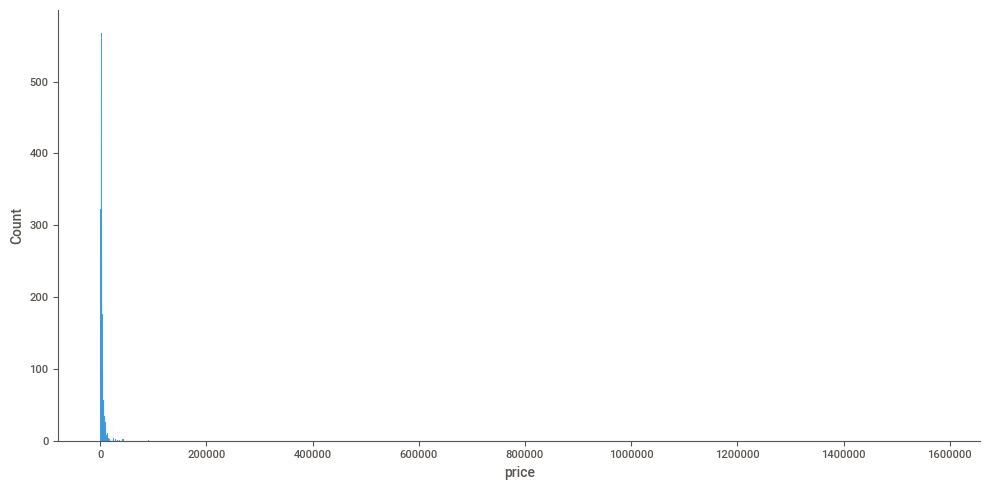

In [ ]:
#rozkład zmiennej *price* jest skośny - prawostronny ze względu na obserwacje odstające z bardzo wysokimi cenami. W takiej sytuacji można
#albo usunąć takie obserwacje albo zastosować logarytm
#df.price.plot.hist()
sns.displot(data=df, x='price', kind='hist', aspect=2)

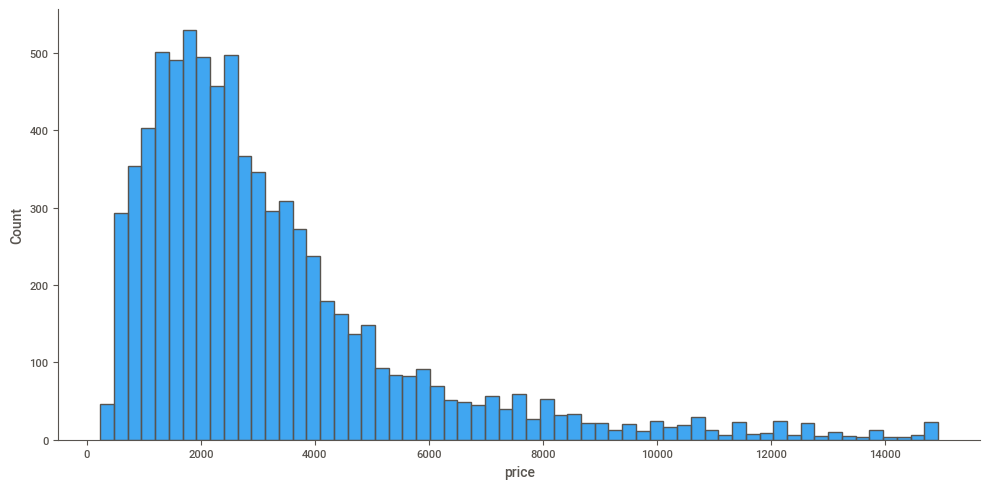

In [ ]:
#po ograniczeniu przedziału cen do 0-15k możemy dopiero zauważyć rzeczywistą charakterystykę
sns.displot(data=df.query('price > 0 & price < 15000'), x='price', kind='hist', aspect=2)

In [ ]:
#plt.show()
#df.query('price > 5 & price < 15000').price.plot.hist()
print('99.5% nieruchomości ma cenę niższą niż {0:.2f}'.format(np.percentile(df.price, 99.5)))

99.5% nieruchomości ma cenę niższą niż 41266.62


In [ ]:
#wycinam obserwacje odstające
df = df[(df.price <= np.percentile(df['price'], 99.5)) & (df.price > 0)]

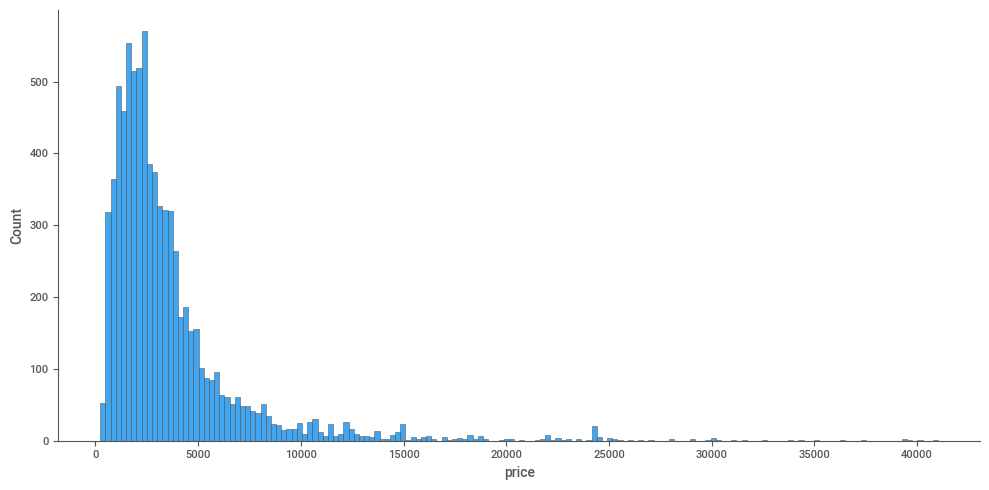

In [ ]:
#rozkład wygląda zdecydowanie lepiej - bez ograniczenia przedziału cen - kwoty są prawdopodobnie w koronach czeskich więc liczby jak najbardziej mają sens
sns.displot(data=df, x='price', kind='hist', aspect=2)

In [ ]:
df['price'].kurtosis() #rozkład jest wyostrzony

20.710266500912905

In [ ]:
df['price'].skew() #wartość ta wskazuje na rozkład prawoskośny

3.7795603400690827

In [ ]:
#kolumna price nie zawiera obserwacji z ceną 0
df[df['price']==0]

Empty DataFrame
Columns: [id, picture_url, host_id, host_since, host_location, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms, bathrooms_text, bedrooms, beds, amenities, price, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, has_availability, availability_30, availability_60, availability_90, availability_365, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, instant_bookable, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms, reviews_per_month]
Index: []

In [ ]:
#próbuję zlogarytmować cenę
df.loc[:,'log_price'] = np.log(df.loc[:,'price'])

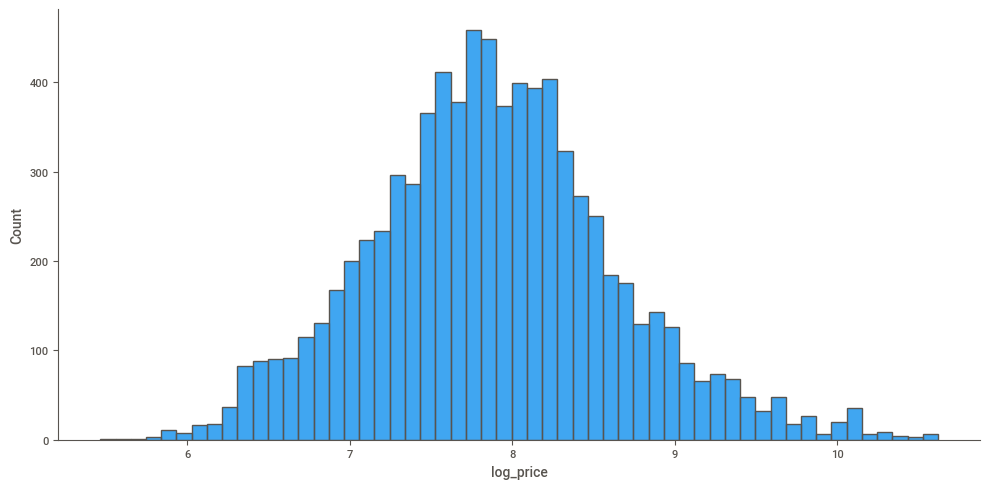

In [ ]:
#charakterystyka rozkładu zdecydowanie się poprawiła
sns.displot(data=df, x='log_price', kind='hist', aspect=2)

In [ ]:
#próbuję znormalizować dane Z-score
df['zs_price'] = (df['price'] - df['price'].mean()) / df['price'].std()

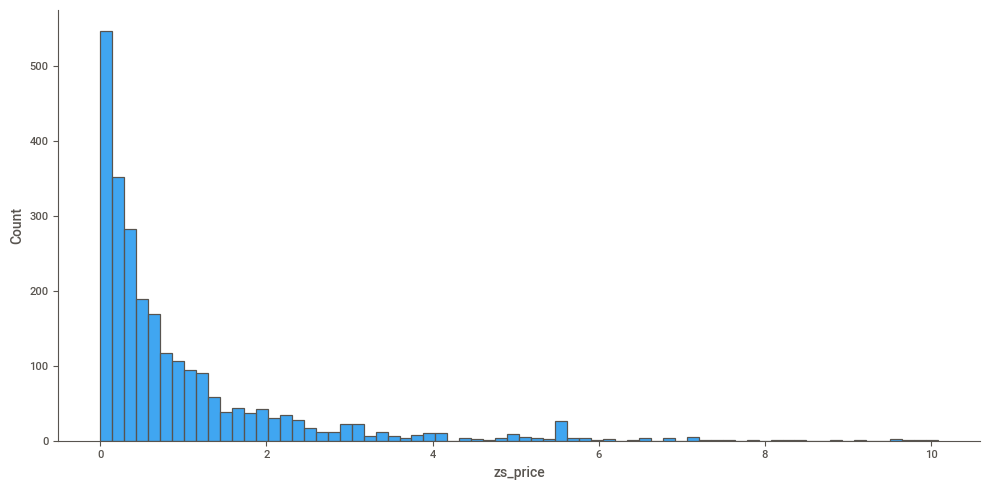

In [ ]:
#charakterystyka rozkładu po zastosowaniu z-score
sns.displot(data=df.query('zs_price > 0 & zs_price < 20'), x='zs_price', kind='hist', aspect=2)

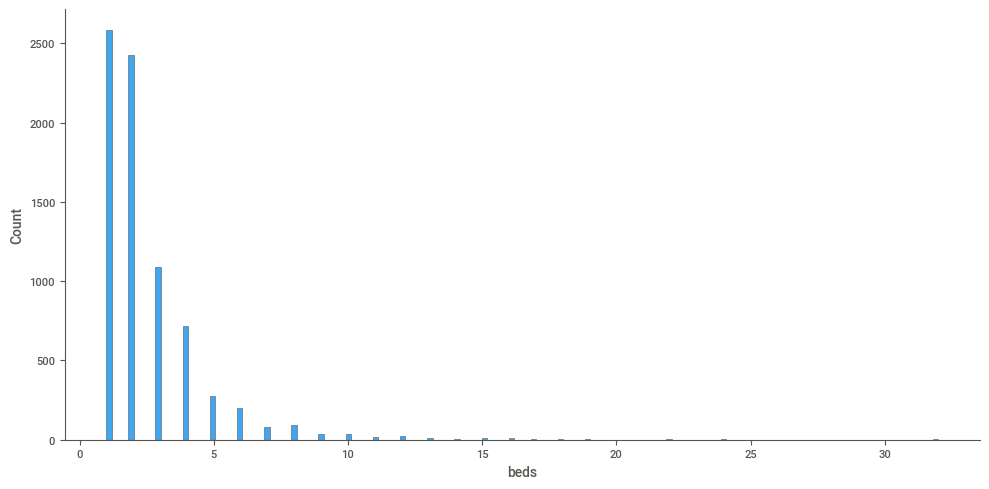

In [ ]:
#kolumna beds zawiera 254 brakujące wartości
#rozkład zmiennej *beds* jest skośny - prawostronny
sns.displot(data=df, x='beds', kind='hist', aspect=2)

In [ ]:
pd.options.display.max_rows = 15
df['beds'].describe()

count   7642.00
mean       2.56
std        2.19
min        1.00
25%        1.00
50%        2.00
75%        3.00
max       32.00
Name: beds, dtype: float64

In [ ]:
#Unique values in column bedrooms: [ 1.  2. nan  3.  5.  4.  6.  7. 10. 26.  8.  9. 12. 11. 25.]
#Unique values in column beds: [ 2.  3.  5.  1.  4. 16.  9. nan 12.  6.  7. 15. 14.  8. 10. 18. 11. 19.13. 22. 24. 23. 20. 17. 32. 25.]

In [ ]:
#brakujące wartości w kolumnie bedrooms możemy uzupełnić na podstawie zależności liczby łóżek i sypialni; 800 nulli w bedrooms, 21 w beds
df.loc[df['bedrooms'].isnull(), ['bedrooms', 'beds']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 8 to 7884
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bedrooms  0 non-null      float64
 1   beds      779 non-null    float64
dtypes: float64(2)
memory usage: 18.8 KB


In [ ]:
df.groupby(['beds'])['bedrooms'].mean().round()

beds
1.00     1.00
2.00     1.00
3.00     2.00
4.00     2.00
5.00     2.00
         ... 
22.00    4.00
23.00    8.00
24.00   14.00
25.00   25.00
32.00    8.00
Name: bedrooms, Length: 25, dtype: float64

In [ ]:
df['bedrooms_2'] = df['bedrooms'].fillna(df.groupby(['beds'])['bedrooms'].transform('mean').round())

In [ ]:
df['bedrooms'].mean().round() #moda i średnia są równe 1, uzupełniam średnią

1.0

In [ ]:
df['bedrooms_2'] = df['bedrooms'].fillna(df['bedrooms'].mean().round())
df.loc[df['bedrooms'].isnull(), ['bedrooms_2', 'beds']].info() #wszystkie brakujące rekordy zostały uzupełnione, teraz możemy uzupełnić informację o łózkach
# pozostałe wartości możemy uzupełnić średnią bez grupowania lub 1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 8 to 7884
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms_2  800 non-null    float64
 1   beds        779 non-null    float64
dtypes: float64(2)
memory usage: 18.8 KB


In [ ]:
df[['beds', 'bedrooms_2']][df['bedrooms'].isnull()]

beds  bedrooms_2
8     1.00        1.00
17    1.00        1.00
28    1.00        1.00
58    1.00        1.00
60    1.00        1.00
...    ...         ...
7880  4.00        1.00
7881  4.00        1.00
7882  4.00        1.00
7883  3.00        1.00
7884  3.00        1.00

[800 rows x 2 columns]

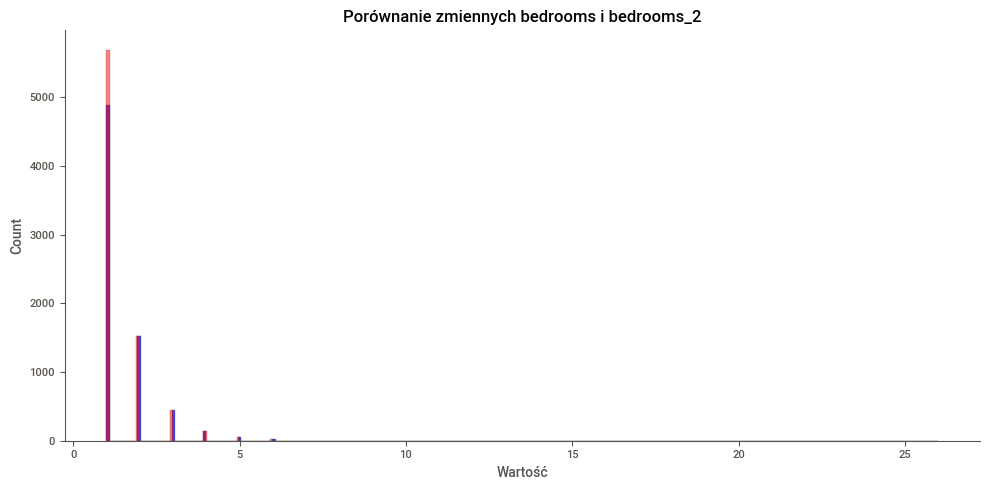

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='bedrooms', color='blue', kde=False)
sns.histplot(data=df, x='bedrooms_2', color='red', kde=False, alpha=0.5)
sns.despine()

plt.title("Porównanie zmiennych bedrooms i bedrooms_2")
plt.xlabel("Wartość")
plt.tight_layout()
plt.show()


In [ ]:
#brakujące wartości w kolumnie *beds* możemy uzupełnić ilością sypialni korzystając z poprawionej kolumny bedrooms_2
df.loc[df['beds'].isnull(), ['bedrooms', 'bedrooms_2', 'beds']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 79 to 7935
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    232 non-null    float64
 1   bedrooms_2  253 non-null    float64
 2   beds        0 non-null      float64
dtypes: float64(3)
memory usage: 7.9 KB


In [ ]:
df.groupby(['bedrooms_2'])['beds'].mean().round()

bedrooms_2
1.00     2.00
2.00     3.00
3.00     5.00
4.00     8.00
5.00     9.00
6.00    12.00
7.00    11.00
8.00    23.00
9.00    14.00
10.00   14.00
11.00   32.00
12.00   24.00
25.00   25.00
26.00   24.00
Name: beds, dtype: float64

In [ ]:
df['beds_2'] = df['beds'].fillna(df.groupby(['bedrooms_2'])['beds'].transform('mean').round())

In [ ]:
#nie mamy aktualnie nullowych wartości w kolumnie beds, sprawdzmy jej statystyki
df.loc[df['beds_2'].isnull(), ['bedrooms', 'beds_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bedrooms  0 non-null      float64
 1   beds_2    0 non-null      float64
dtypes: float64(2)
memory usage: 0.0 bytes


In [ ]:
df[['bedrooms_2', 'beds_2']][df['beds'].isnull()] #uzupełnione wartości wyglądają sensownie

bedrooms_2  beds_2
79          2.00    3.00
455         1.00    2.00
597         1.00    2.00
608         1.00    2.00
975         1.00    2.00
...          ...     ...
7931        1.00    2.00
7932        1.00    2.00
7933        1.00    2.00
7934        1.00    2.00
7935        1.00    2.00

[253 rows x 2 columns]

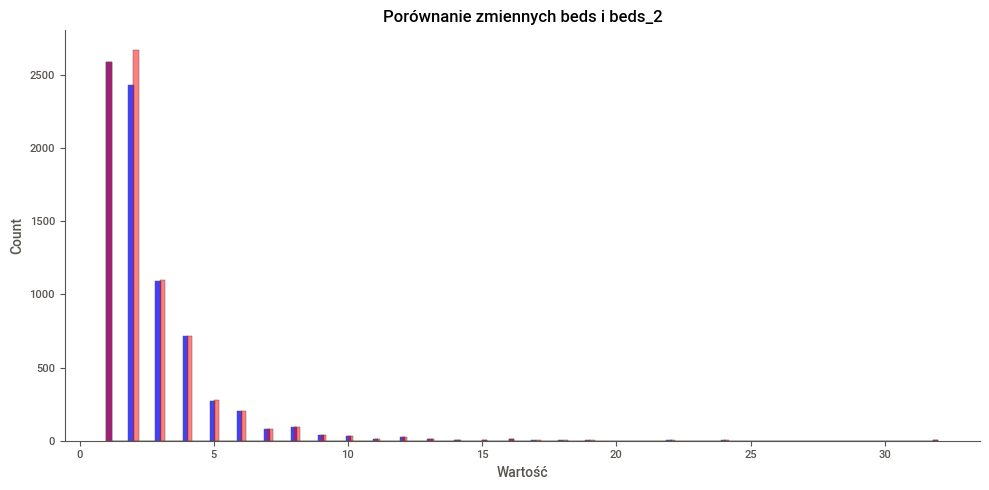

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='beds', color='blue', kde=False)
sns.histplot(data=df, x='beds_2', color='red', kde=False, alpha=0.5)
sns.despine()

plt.title("Porównanie zmiennych beds i beds_2")
plt.xlabel("Wartość")
plt.tight_layout()
plt.show()

In [ ]:
#usuwam nadmiarowe kolumny z nullami i zmieniam nazwy poprawionych
df.drop(['bedrooms', 'beds'], axis=1, inplace=True)
df = df.rename(columns={"bedrooms_2": "bedrooms", "beds_2": "beds"})

In [ ]:
df.describe()

id      host_id  host_response_rate  \
count               7895.00      7895.00             6854.00   
mean  193700497367047200.00 151757763.26                0.94   
std   312588362054870656.00 159966332.47                0.17   
min                 3884.00      2738.00                0.00   
25%             18955105.00  15683232.00                0.99   
50%             38273238.00  81230345.00                1.00   
75%   603284801522155136.00 257779276.00                1.00   
max   787592455865712896.00 492269421.00                1.00   

       host_acceptance_rate  host_listings_count  host_total_listings_count  \
count               7222.00              7895.00                    7895.00   
mean                   0.91                25.27                      37.50   
std                    0.21               105.99                     185.34   
min                    0.00                 0.00                       0.00   
25%                    0.94                 2.00                       3.00   
50%                    1.00                 6.00                       8.00   
75%                    1.00                26.00                      32.00   
max                    1.00              1797.00                    5136.00   

       latitude  longitude  accommodates  bathrooms    price  minimum_nights  \
count   7895.00    7895.00       7895.00       0.00  7895.00         7895.00   
mean      50.08      14.43          3.90        NaN  3626.11            5.81   
std        0.02       0.03          2.50        NaN  3709.13           28.81   
min       49.95      14.28          1.00        NaN   236.00            1.00   
25%       50.07      14.42          2.00        NaN  1613.00            1.00   
50%       50.08      14.43          4.00        NaN  2568.00            2.00   
75%       50.09      14.45          4.00        NaN  4131.00            2.00   
max       50.17      14.68         16.00        NaN 41031.00         1100.00   

       maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
count         7895.00                 7895.00                 7895.00   
mean           634.98                    5.27                   10.48   
std            479.56                   25.29                   38.71   
min              1.00                    1.00                    1.00   
25%            180.00                    1.00                    2.00   
50%            365.00                    2.00                    3.00   
75%           1125.00                    2.00                    4.00   
max           9000.00                  999.00                 1100.00   

       minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
count                 7895.00                 7895.00                 7895.00   
mean                   719.42                  775.11                    8.06   
std                    468.27                  448.04                   33.81   
min                      1.00                    1.00                    1.00   
25%                    365.00                  365.00                    1.00   
50%                   1125.00                 1125.00                    2.00   
75%                   1125.00                 1125.00                    3.00   
max                   3333.00                 3333.00                  999.00   

       maximum_nights_avg_ntm  availability_30  availability_60  \
count                 7895.00          7895.00          7895.00   
mean                   752.79            12.65            30.23   
std                    450.84             9.96            21.54   
min                      1.00             0.00             0.00   
25%                    365.00             2.00             6.00   
50%                   1125.00            13.00            35.00   
75%                   1125.00            21.00            50.00   
max                   3333.00            30.00            60.00   

       availability_90 

In [ ]:
len(df) #wcześniej mieliśmy 7935 rekordów -> 7895

7895

In [ ]:
#zmienna accommodates jest cała uzupełniona
pd.options.display.max_rows = None
df.accommodates.info()

<class 'pandas.core.series.Series'>
Int64Index: 7895 entries, 0 to 7939
Series name: accommodates
Non-Null Count  Dtype
--------------  -----
7895 non-null   int64
dtypes: int64(1)
memory usage: 381.4 KB


In [ ]:
df.accommodates.describe()

count   7895.00
mean       3.90
std        2.50
min        1.00
25%        2.00
50%        4.00
75%        4.00
max       16.00
Name: accommodates, dtype: float64

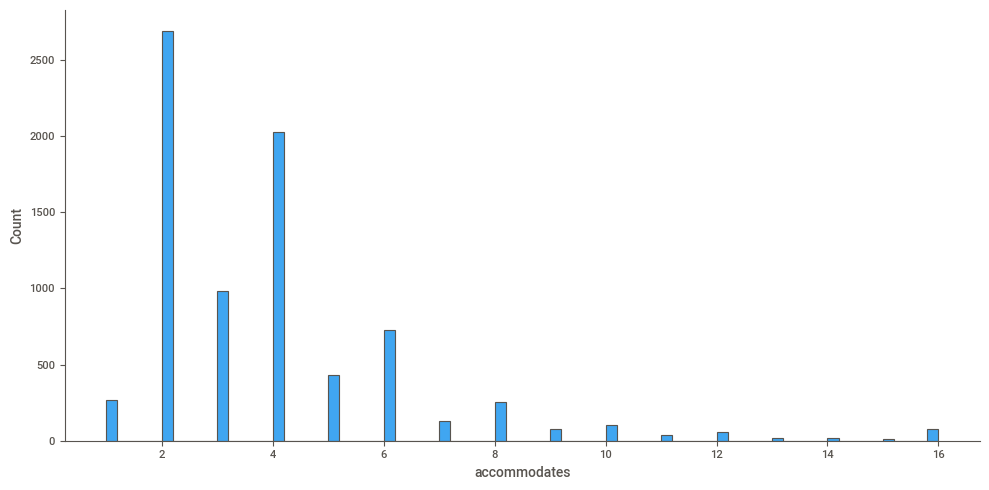

In [ ]:
#kolumna accommodates jest cała uzupełniona i nie zawiera wartości szczególnie odstających
sns.displot(data=df, x='accommodates', kind='hist', aspect=2)

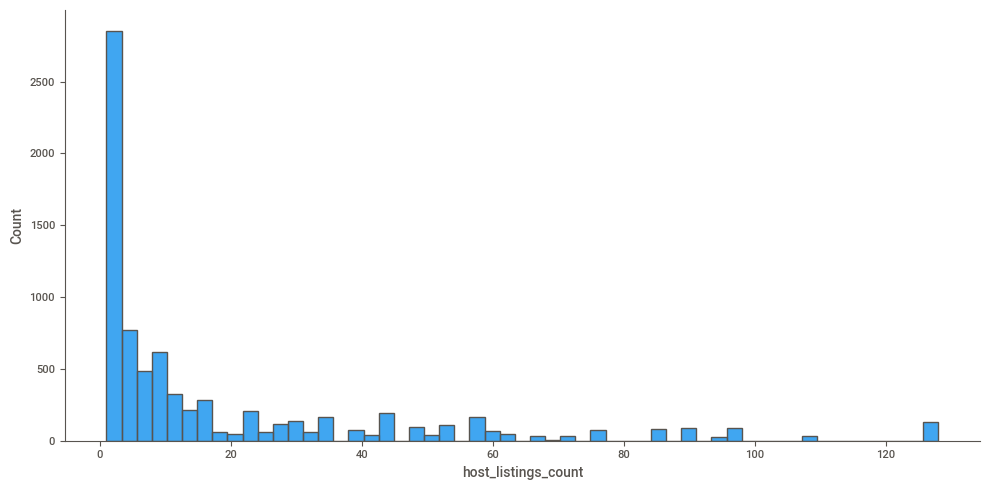

In [ ]:
#występują pojedynczy hości posiadający bardzo duże liczby ogłoszeń #odciąć funkcją percentile 0.95
#rozkład zmiennej *host_listings_count* jest skośny - prawostronny
sns.displot(data=df, x='host_listings_count', kind='hist', aspect=2)

In [ ]:
np.percentile(df.host_listings_count, 99.5) #99.5% hostów ma mniej niż 128 ogloszeń

128.0

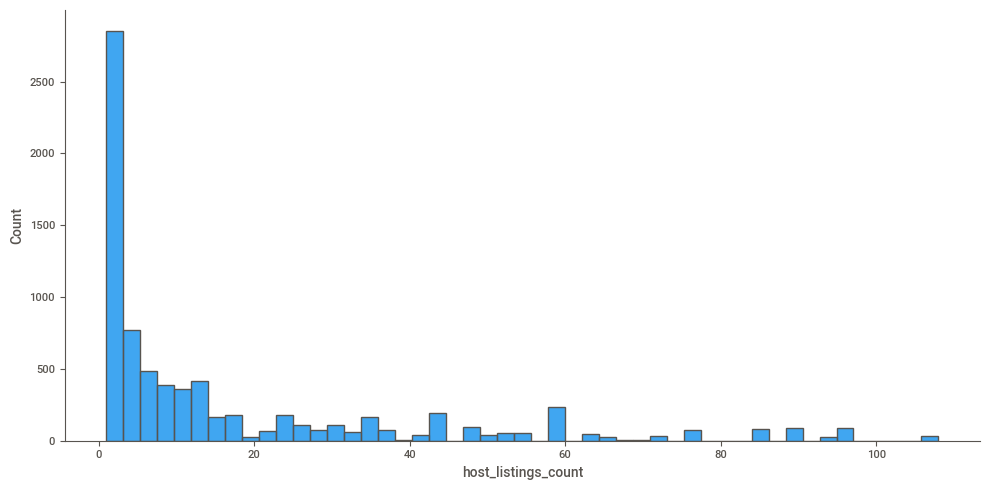

In [ ]:
sns.displot(data=df.query('host_listings_count > 0 & host_listings_count < 128'), x='host_listings_count', kind='hist', aspect=2)

In [ ]:
#wycinamy obserwacje odstające
df = df[(df.host_listings_count <= np.percentile(df['host_listings_count'], 99.5)) & (df.host_listings_count > 0)]

In [ ]:
#7895 -> 7834
len(df)

7834

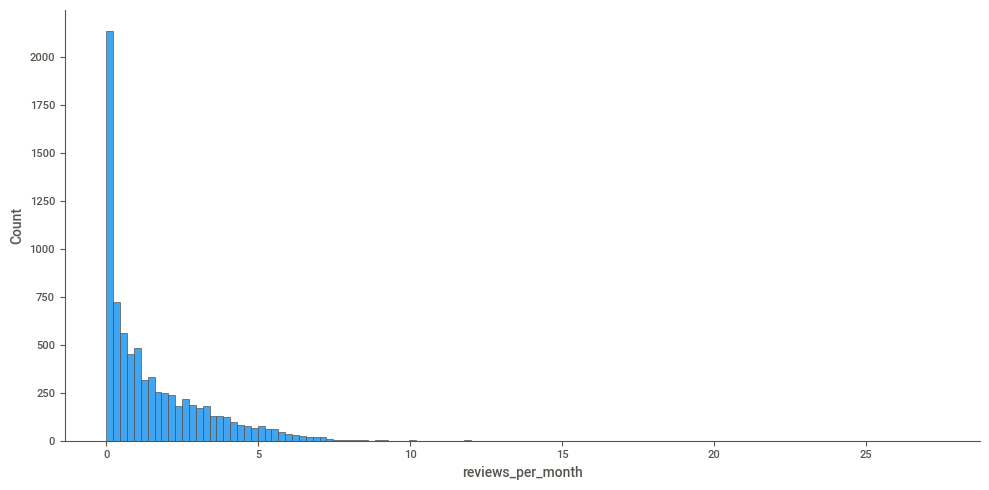

In [ ]:
#mamy bardzo dużo nieuzupełnionych wartości co było już widać we wcześniejszych puntkach - uzupełniam nulle zerami
sns.displot(data=df, x='reviews_per_month', kind='hist', aspect=2)

In [ ]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

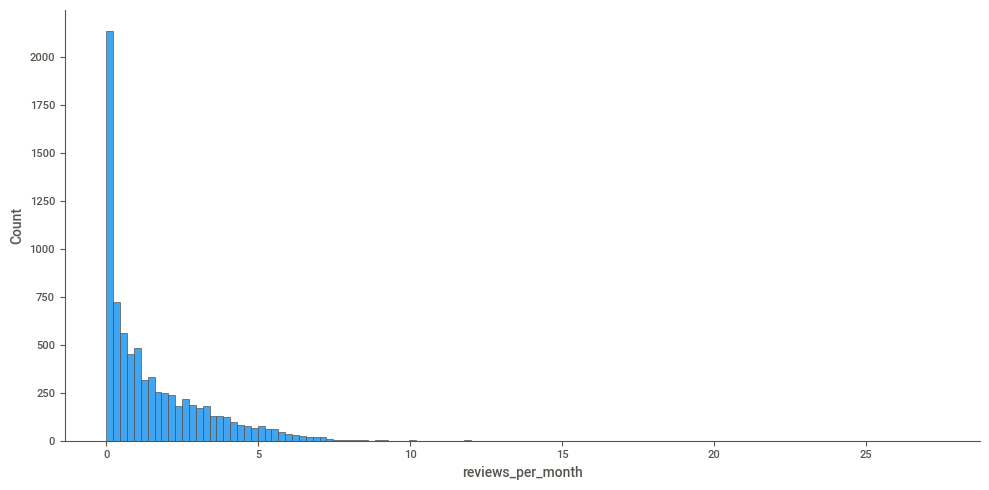

In [ ]:
sns.displot(data=df, x='reviews_per_month', kind='hist', aspect=2)

In [ ]:
#ilość nulli w poszczególnych kolumnach numerycznych po poprawkach
df_nb = df.select_dtypes(include = 'number').isna().sum()
df_nb[df_nb.values > 0].sort_values(ascending=False)

bathrooms                      7834
review_scores_accuracy         1139
review_scores_checkin          1139
review_scores_location         1139
review_scores_value            1139
review_scores_cleanliness      1138
review_scores_communication    1138
review_scores_rating           1118
host_response_rate             1041
host_acceptance_rate            648
dtype: int64

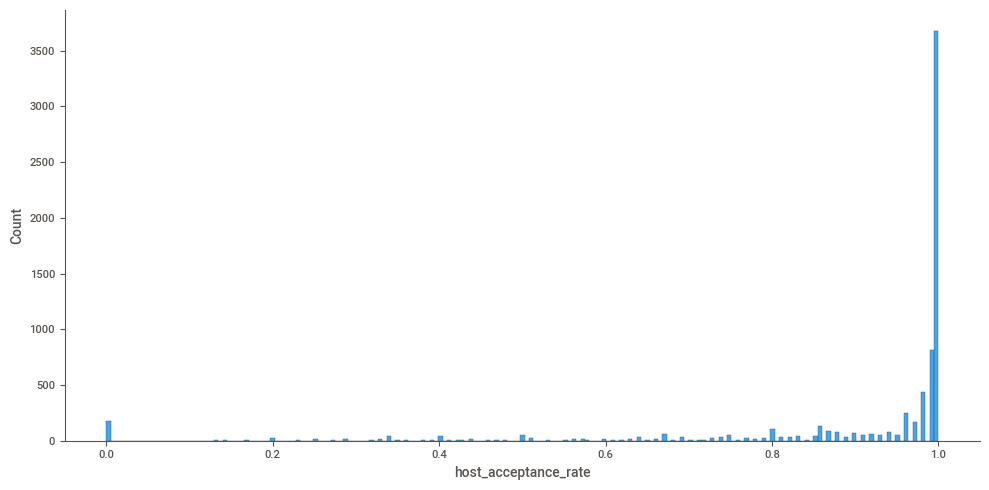

In [ ]:
sns.displot(data=df, x='host_acceptance_rate', kind='hist', aspect=2)

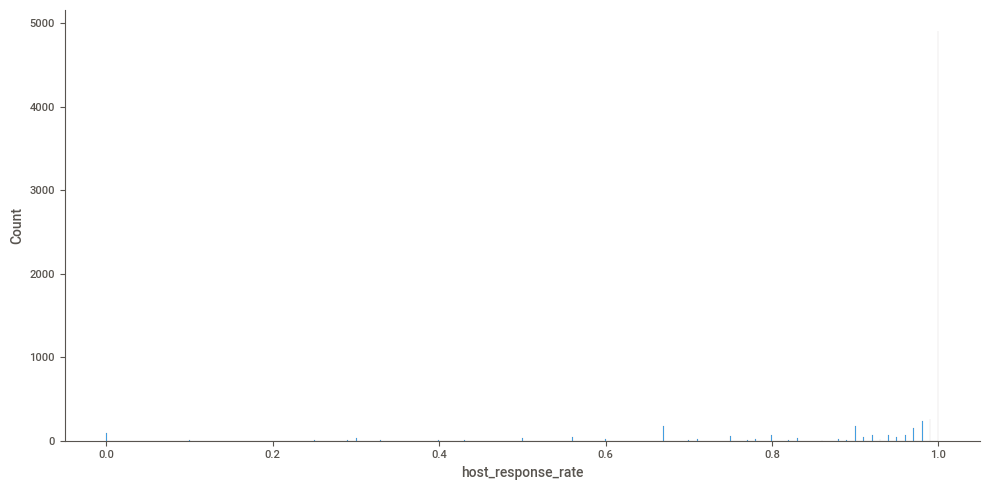

In [ ]:
sns.displot(data=df, x='host_response_rate', kind='hist', aspect=2)

In [ ]:
#uzupełniam brakujące wartości średnią
df['host_response_rate_2'] = df['host_response_rate'].fillna(df['host_response_rate'].mean())

In [ ]:
#uzupełniam brakujące wartości średnią
df['host_acceptance_rate_2'] = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].mean())

In [ ]:
df['host_response_rate_2'].mean()

0.9465184749006331

In [ ]:
df['host_acceptance_rate_2'].mean()

0.9101683829668802

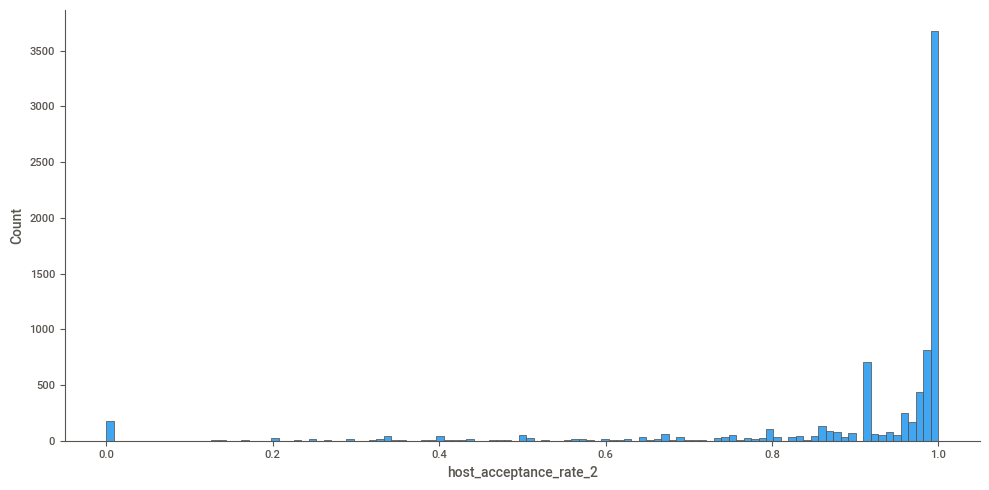

In [ ]:
sns.displot(data=df, x='host_acceptance_rate_2', kind='hist', aspect=2)

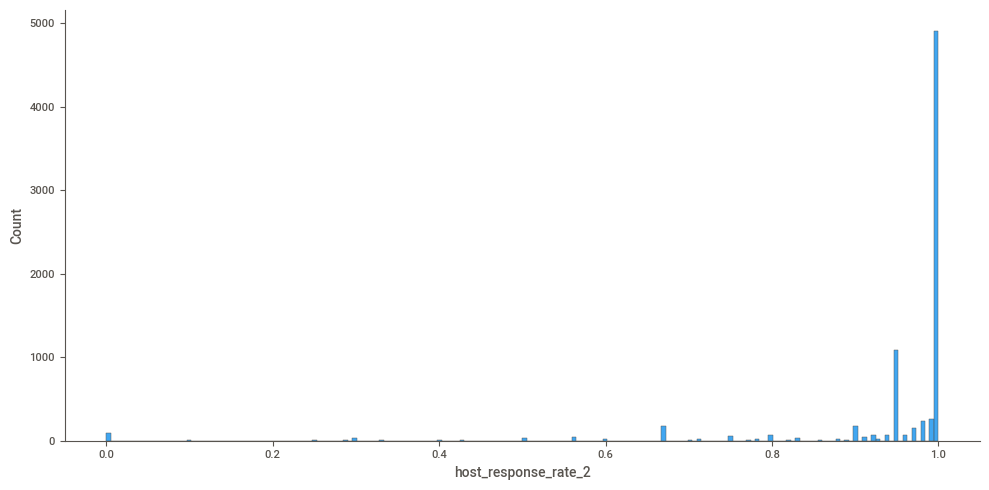

In [ ]:
sns.displot(data=df, x='host_response_rate_2', kind='hist', aspect=2)

In [ ]:
#usuwam oryginalne kolumny i zmieniam nazwy poprawionych
df.drop(['host_response_rate', 'host_acceptance_rate'], axis=1, inplace=True)
df = df.rename(columns={"host_acceptance_rate_2": "host_acceptance_rate", "host_response_rate_2": "host_response_rate"})

In [ ]:
#ilość nulli w poszczególnych kolumnach numerycznych po poprawkach
df_nb = df.select_dtypes(include = 'number').isna().sum()
df_nb[df_nb.values > 0].sort_values(ascending=False)

bathrooms                      7834
review_scores_accuracy         1139
review_scores_checkin          1139
review_scores_location         1139
review_scores_value            1139
review_scores_cleanliness      1138
review_scores_communication    1138
review_scores_rating           1118
dtype: int64

In [ ]:
#wyciągnięcie z tekstu infomarcji o łazienkach i uzupełnienie brakujących danych średnią
df.bathrooms_text.unique()

array(['1.5 baths', '1 bath', '1 private bath', '2 baths',
       '1 shared bath', '1.5 shared baths', nan, '3 baths', '0 baths',
       '3.5 baths', '2 shared baths', 'Half-bath', '2.5 baths',
       '8 shared baths', '4 baths', '5 baths', '10 shared baths',
       '2.5 shared baths', '3 shared baths', 'Shared half-bath',
       '12 shared baths', '6 baths', '9 baths', 'Private half-bath',
       '5.5 baths', '12 baths', '4.5 baths', '3.5 shared baths',
       '11.5 baths', '11 shared baths', '0 shared baths', '6.5 baths',
       '10 baths', '11.5 shared baths'], dtype=object)

In [ ]:
df.bathrooms_text.str.split().str[0].unique()

array(['1.5', '1', '2', nan, '3', '0', '3.5', 'Half-bath', '2.5', '8',
       '4', '5', '10', 'Shared', '12', '6', '9', 'Private', '5.5', '4.5',
       '11.5', '11', '6.5'], dtype=object)

In [ ]:
df.bathrooms = np.where(
    df.bathrooms_text.str.contains('half', case=False, na=False),
    0.5,
    df.bathrooms_text.str.split().str[0]
).astype('float64')

In [ ]:
df.bathrooms.unique()

array([ 1.5,  1. ,  2. ,  nan,  3. ,  0. ,  3.5,  0.5,  2.5,  8. ,  4. ,
        5. , 10. , 12. ,  6. ,  9. ,  5.5,  4.5, 11.5, 11. ,  6.5])

In [ ]:
df.bathrooms.describe()

count   7811.00
mean       1.28
std        0.91
min        0.00
25%        1.00
50%        1.00
75%        1.50
max       12.00
Name: bathrooms, dtype: float64

In [ ]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean().round())

In [ ]:
df['bathrooms'].describe()

count   7834.00
mean       1.28
std        0.91
min        0.00
25%        1.00
50%        1.00
75%        1.50
max       12.00
Name: bathrooms, dtype: float64

#### b) zmienne kategoryczne

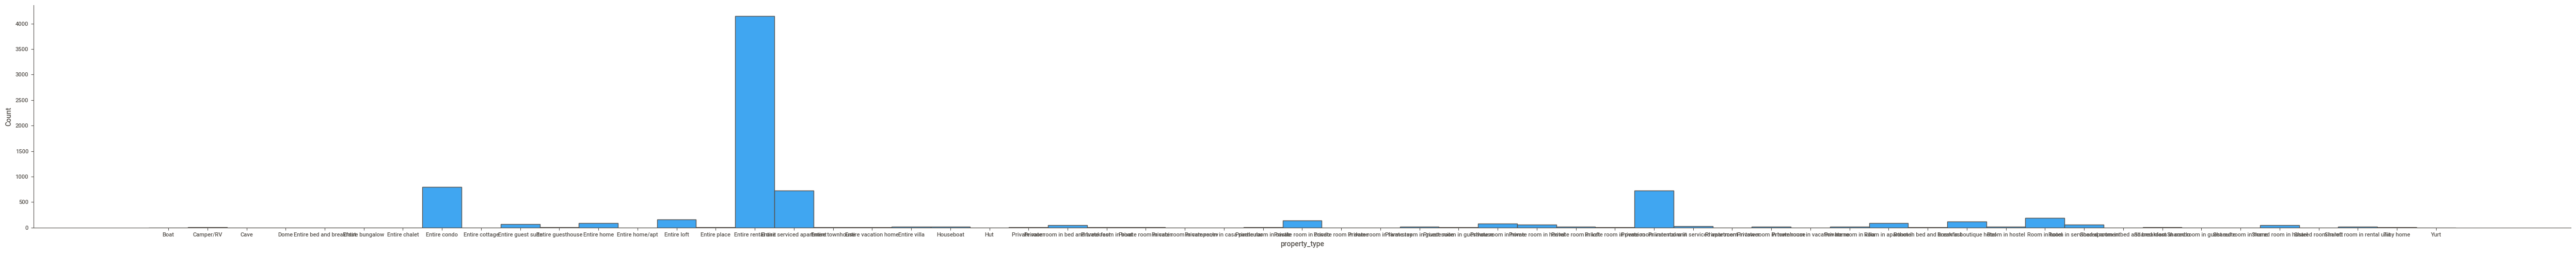

In [ ]:
#zmienna property_type zawiera bardzo dużo różnych typów nieruchomości, dużo lepiej wygląda room_type która agreguje je do 4 głównych kategorii pokojów/lokali które tak naprawdę interesują
sns.displot(data=df, x='property_type', kind='hist', aspect=10)

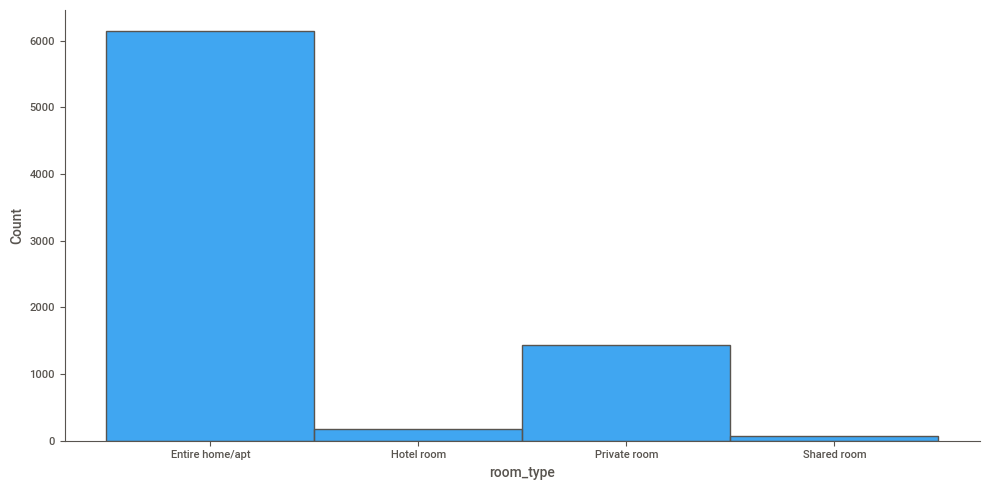

In [ ]:
sns.displot(data=df, x='room_type', kind='hist', aspect=2) #zmienna nie zawiera nulli

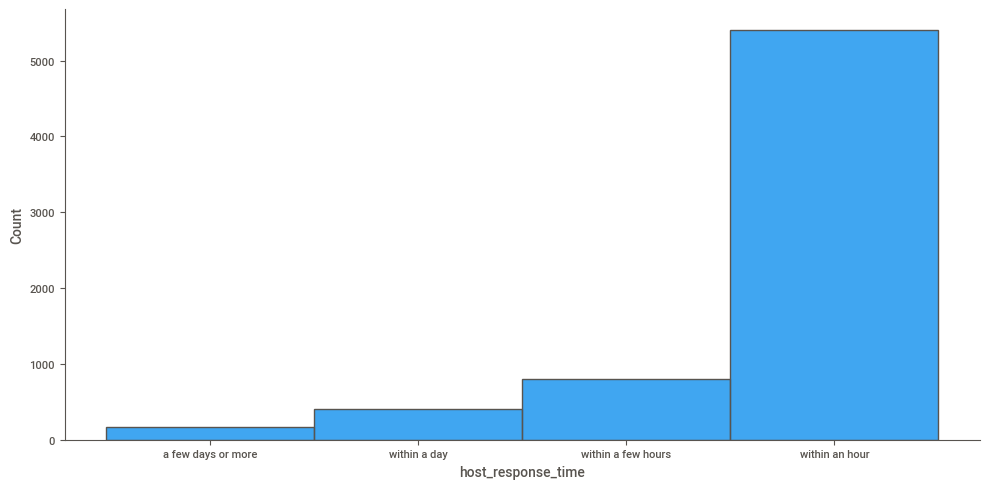

In [ ]:
sns.displot(data=df, x='host_response_time', kind='hist', aspect=2)  #zmienna zawiera 1055 nulli -> najlepiej będzie uzupełnić wartością najczęściej występującą

In [ ]:
df['host_response_time'].mode()

0    within an hour
Name: host_response_time, dtype: category
Categories (4, object): ['a few days or more', 'within a day', 'within a few hours', 'within an hour']

In [ ]:
#uzupełnienie informacji o szybkosci odpowiedzi hosta wartością najczęściej występującą
df['host_response_time_2'] = df['host_response_time'].fillna(df['host_response_time'].mode())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7834 entries, 0 to 7939
Data columns (total 62 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            7834 non-null   int64   
 1   picture_url                                   7834 non-null   object  
 2   host_id                                       7834 non-null   int64   
 3   host_since                                    7834 non-null   object  
 4   host_location                                 6299 non-null   object  
 5   host_response_time                            6793 non-null   category
 6   host_is_superhost                             7834 non-null   bool    
 7   host_picture_url                              7834 non-null   object  
 8   host_neighbourhood                            7024 non-null   object  
 9   host_listings_count                           7834 n

In [ ]:
#usuwam oryginalną kolumnę i zmieniam nazwę tej uzupełnionej
df.drop(['host_response_time'], axis = 1, inplace = True)
df = df.rename(columns={"host_response_time_2": "host_response_time"})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7834 entries, 0 to 7939
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            7834 non-null   int64   
 1   picture_url                                   7834 non-null   object  
 2   host_id                                       7834 non-null   int64   
 3   host_since                                    7834 non-null   object  
 4   host_location                                 6299 non-null   object  
 5   host_is_superhost                             7834 non-null   bool    
 6   host_picture_url                              7834 non-null   object  
 7   host_neighbourhood                            7024 non-null   object  
 8   host_listings_count                           7834 non-null   int64   
 9   host_total_listings_count                     7834 n

## 8. Zbadanie zależności między zmiennymi

#### a) macierze korelacji dla zmiennych numerycznych

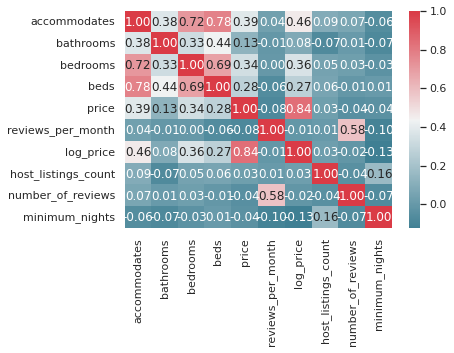

In [ ]:
#najsilniejsze korelacje możemy zauważyć dla zmiennych price-accommodates, beds-bathrooms, beds-accommodates
corr1 = df[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'reviews_per_month', 'log_price', 'host_listings_count', 'number_of_reviews', 'minimum_nights']].corr()

colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr1, cmap = colormap, annot = True, fmt=".2f")

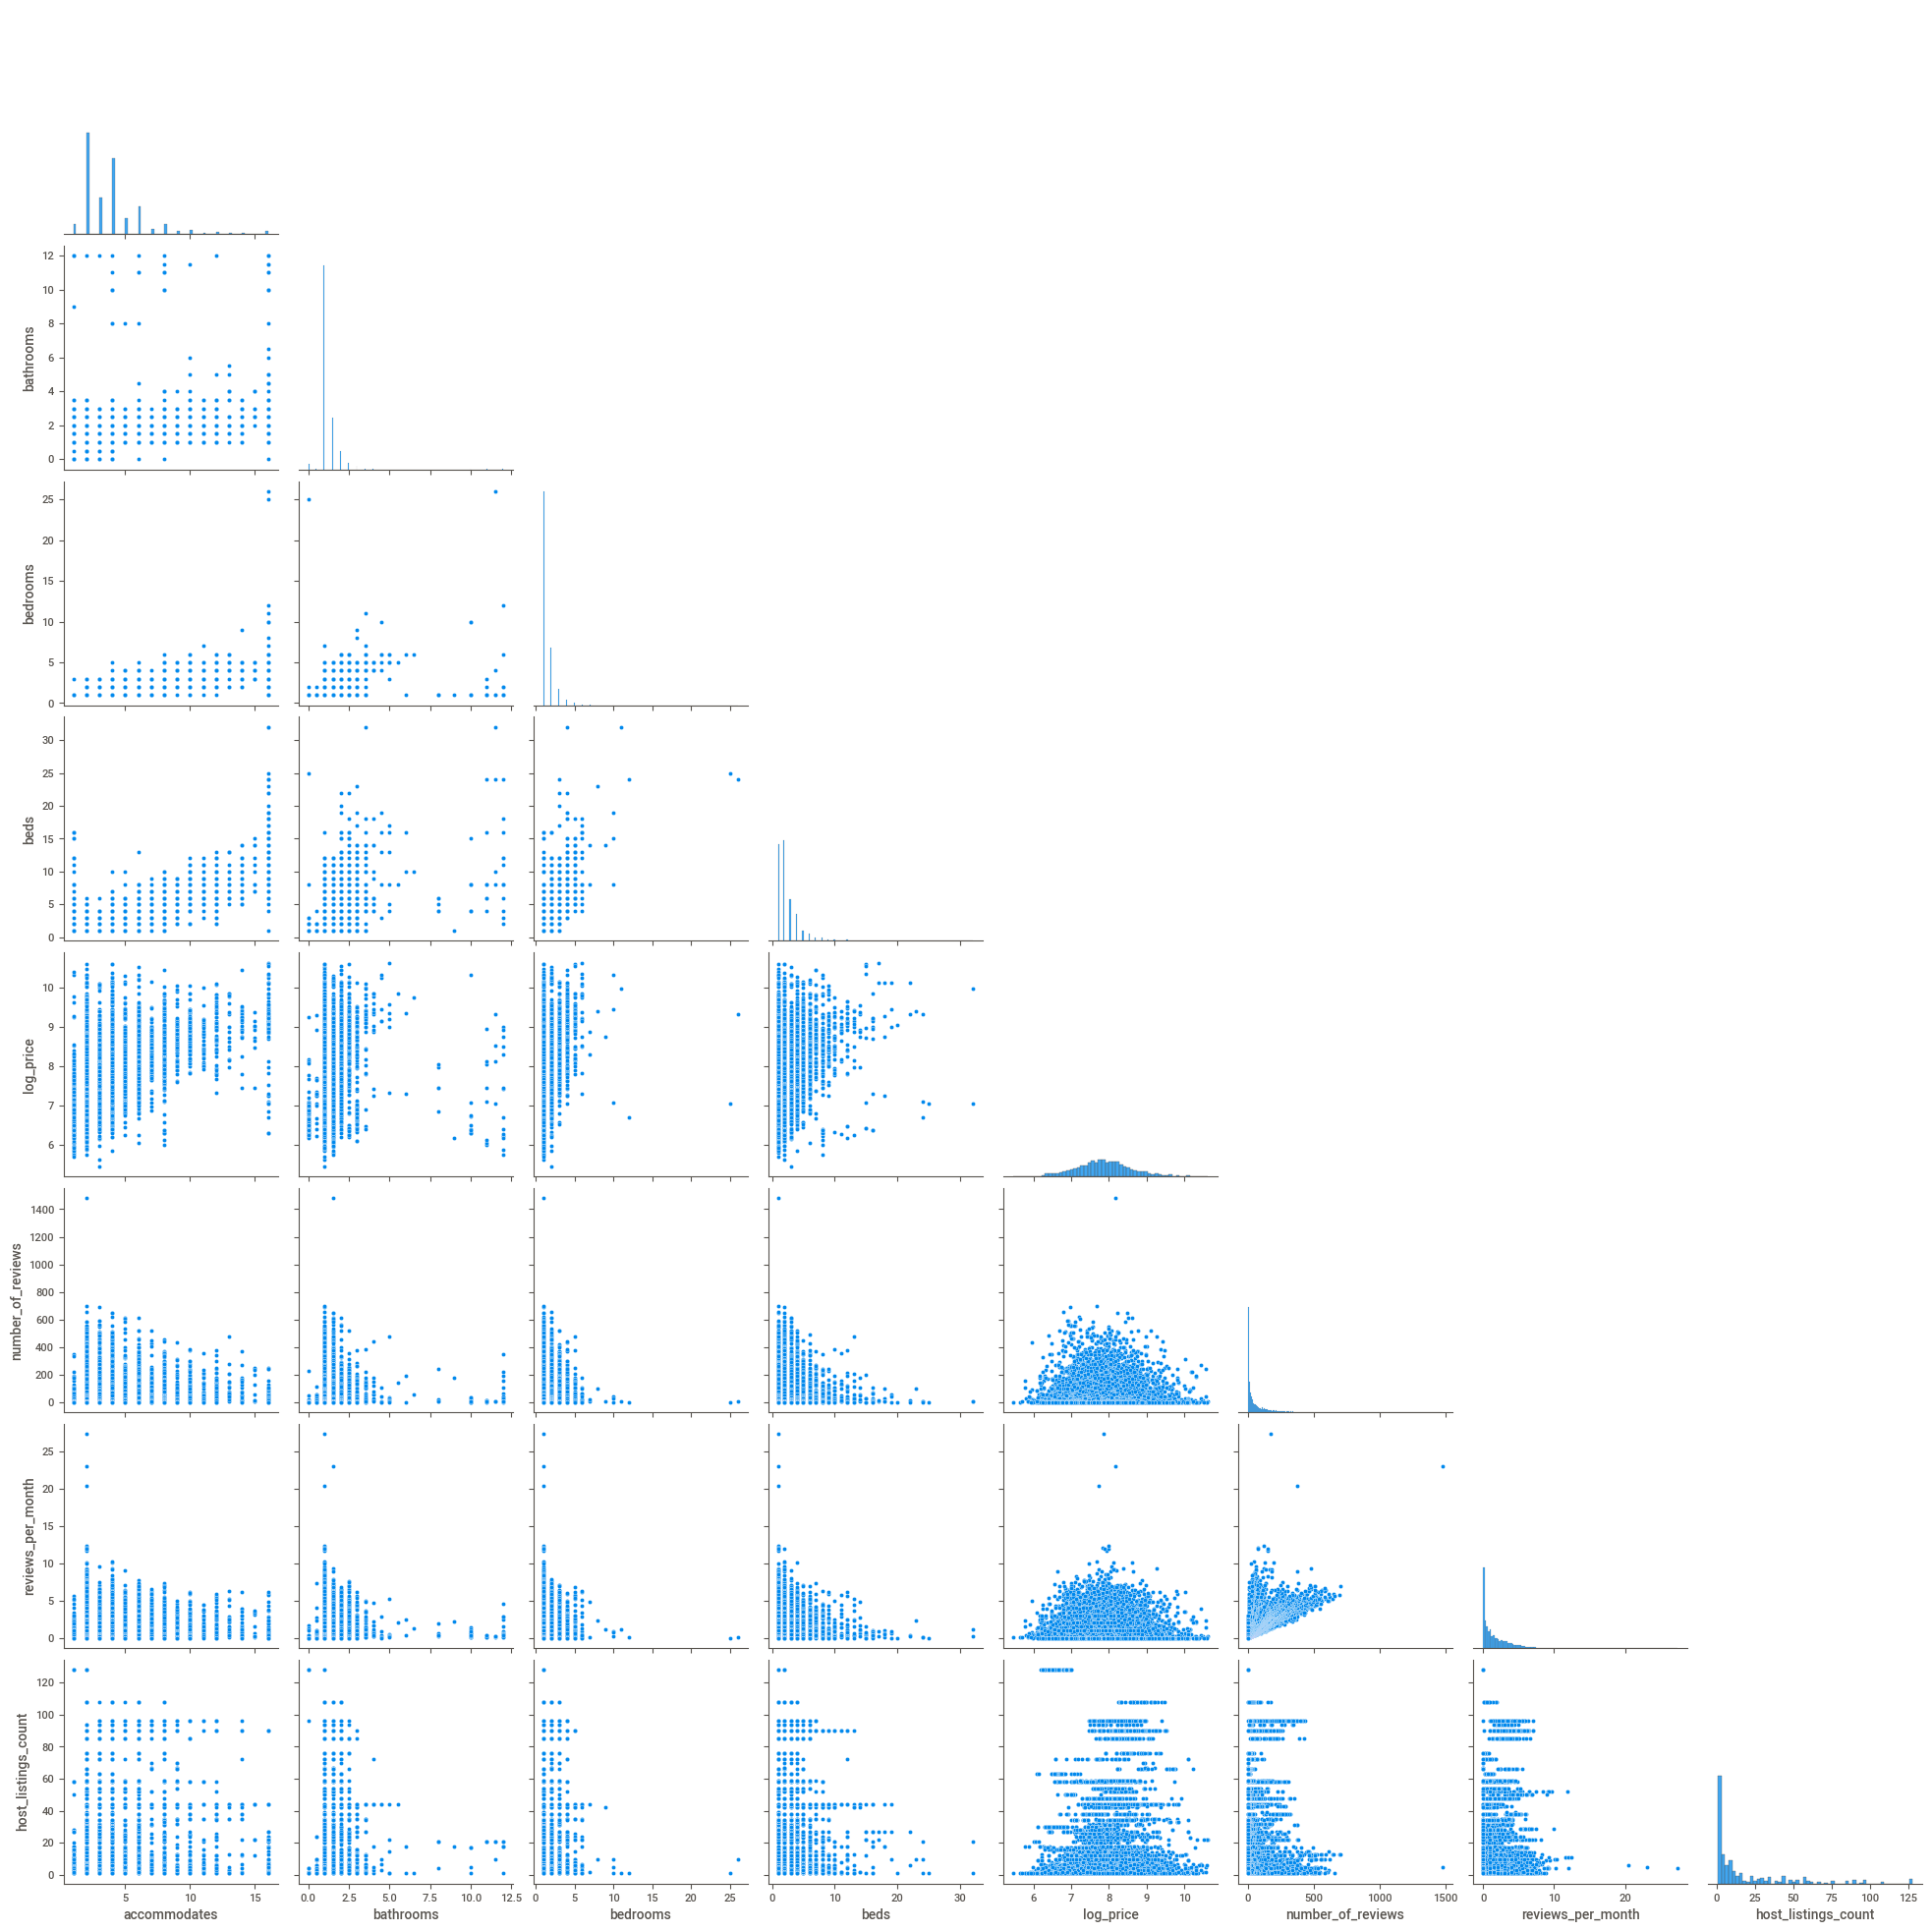

In [ ]:
#wykres par zmiennych
sns.pairplot(
    df,
    x_vars=['accommodates', 'bathrooms', 'bedrooms', 'beds', 'log_price', 'number_of_reviews', 'reviews_per_month', 'host_listings_count'],
    y_vars=['accommodates', 'bathrooms', 'bedrooms', 'beds', 'log_price', 'number_of_reviews', 'reviews_per_month', 'host_listings_count'],
    corner=True
)

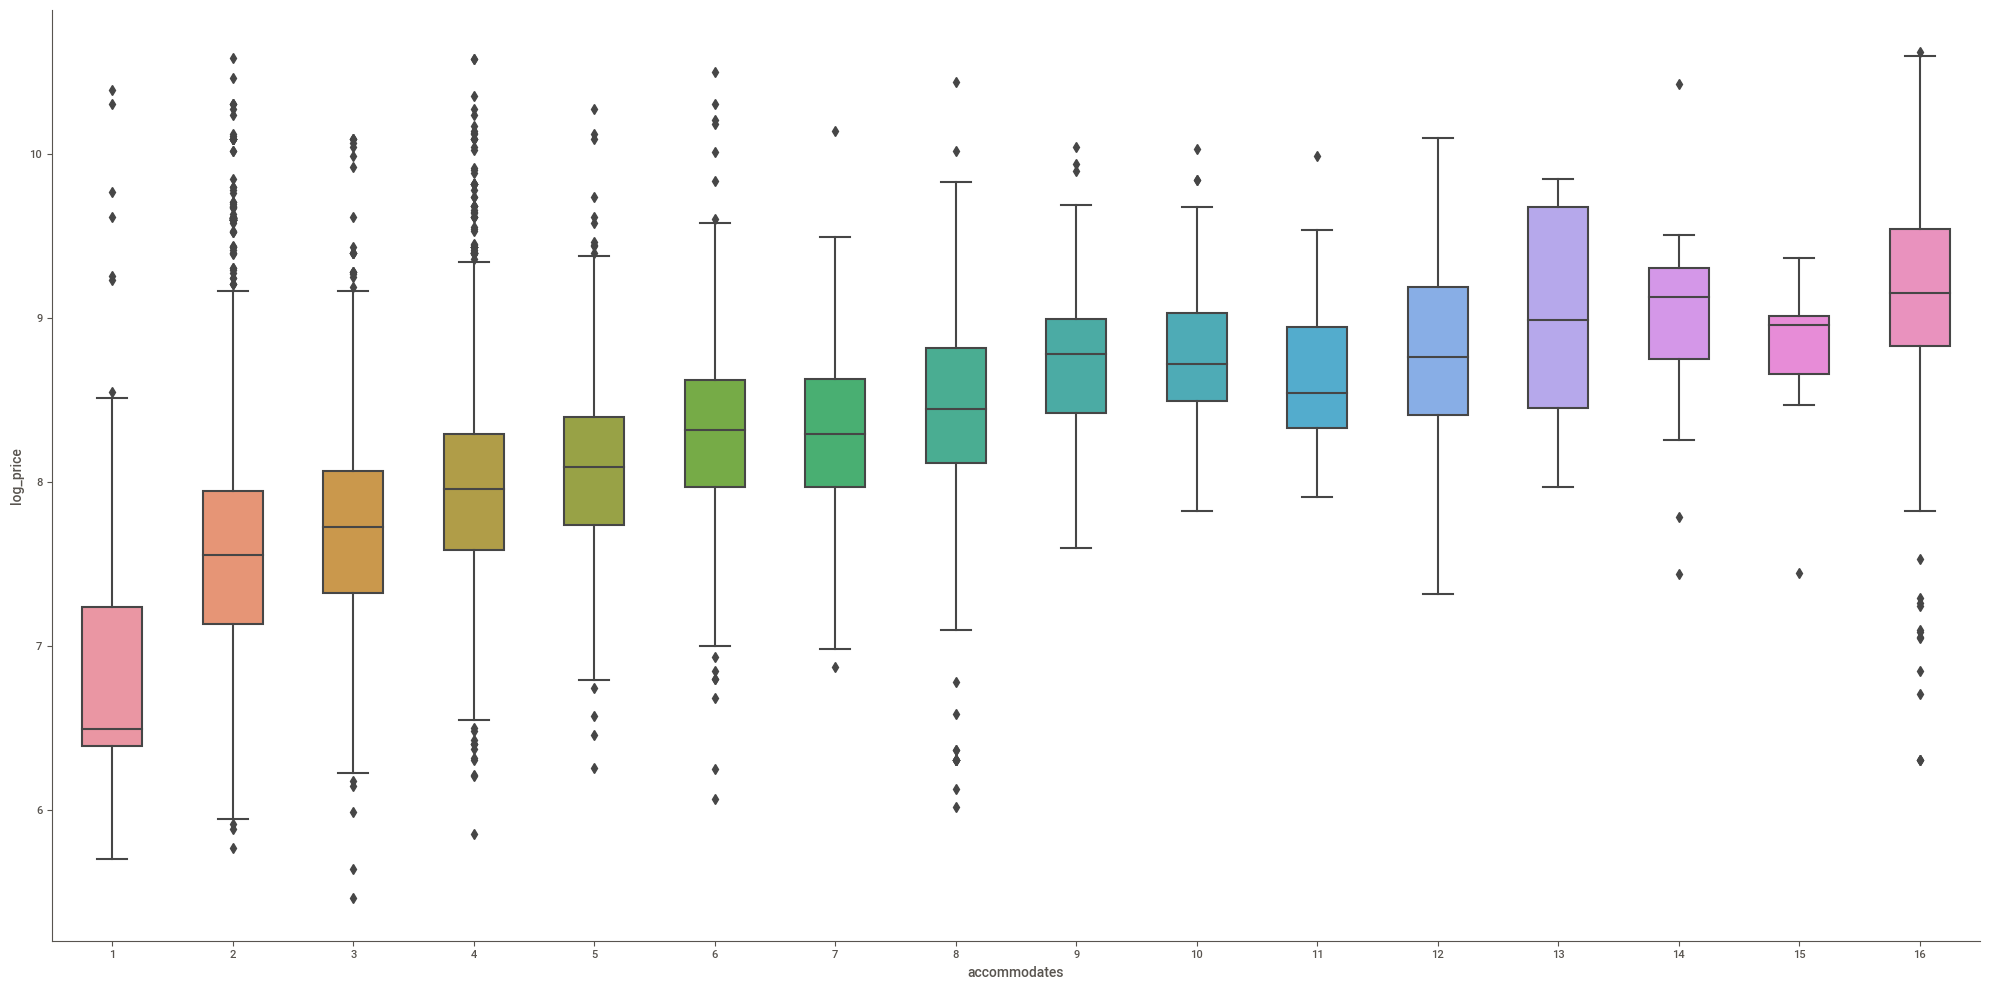

In [ ]:
#zależność log_price od ilości gości
sns.catplot(
    data=df,
    x='accommodates', y='log_price', kind='box',
    height=10, aspect=2, width=0.5
)

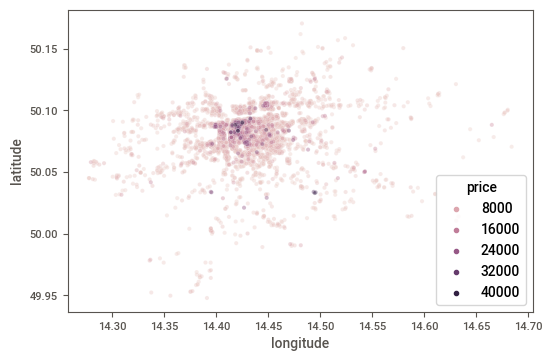

In [ ]:
#zależnośc ceny od lokalizacji
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import plot as plotoffline

geo = df[['latitude', 'longitude', 'price']]
geo = geo.sort_values("price", ascending=True)
geo.describe()
sns.scatterplot(x="longitude",
                y="latitude",
                hue="price",
                data=geo,
                alpha=0.4)

#### b) zależności pomiędzy zmiennymi kategorycznymi oraz kategorycznymi i numerycznymi

In [ ]:
#dwie zmienne kategoryczne
confusion_matrix = pd.crosstab(df['host_response_time'], df['room_type'])

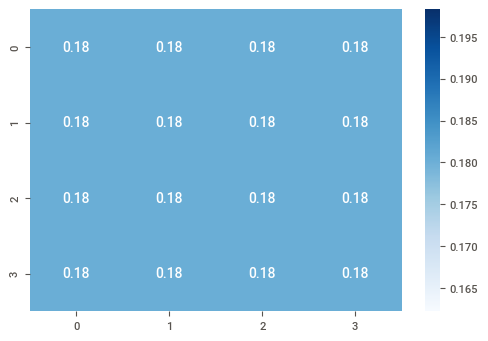

In [ ]:
cramer = np.sqrt(stats.chi2_contingency(confusion_matrix)[0] / (confusion_matrix.sum().sum()))
cramer_matrix = np.ones((confusion_matrix.shape[0], confusion_matrix.shape[1])) * cramer

sns.heatmap(cramer_matrix, annot=True, cmap='Blues')

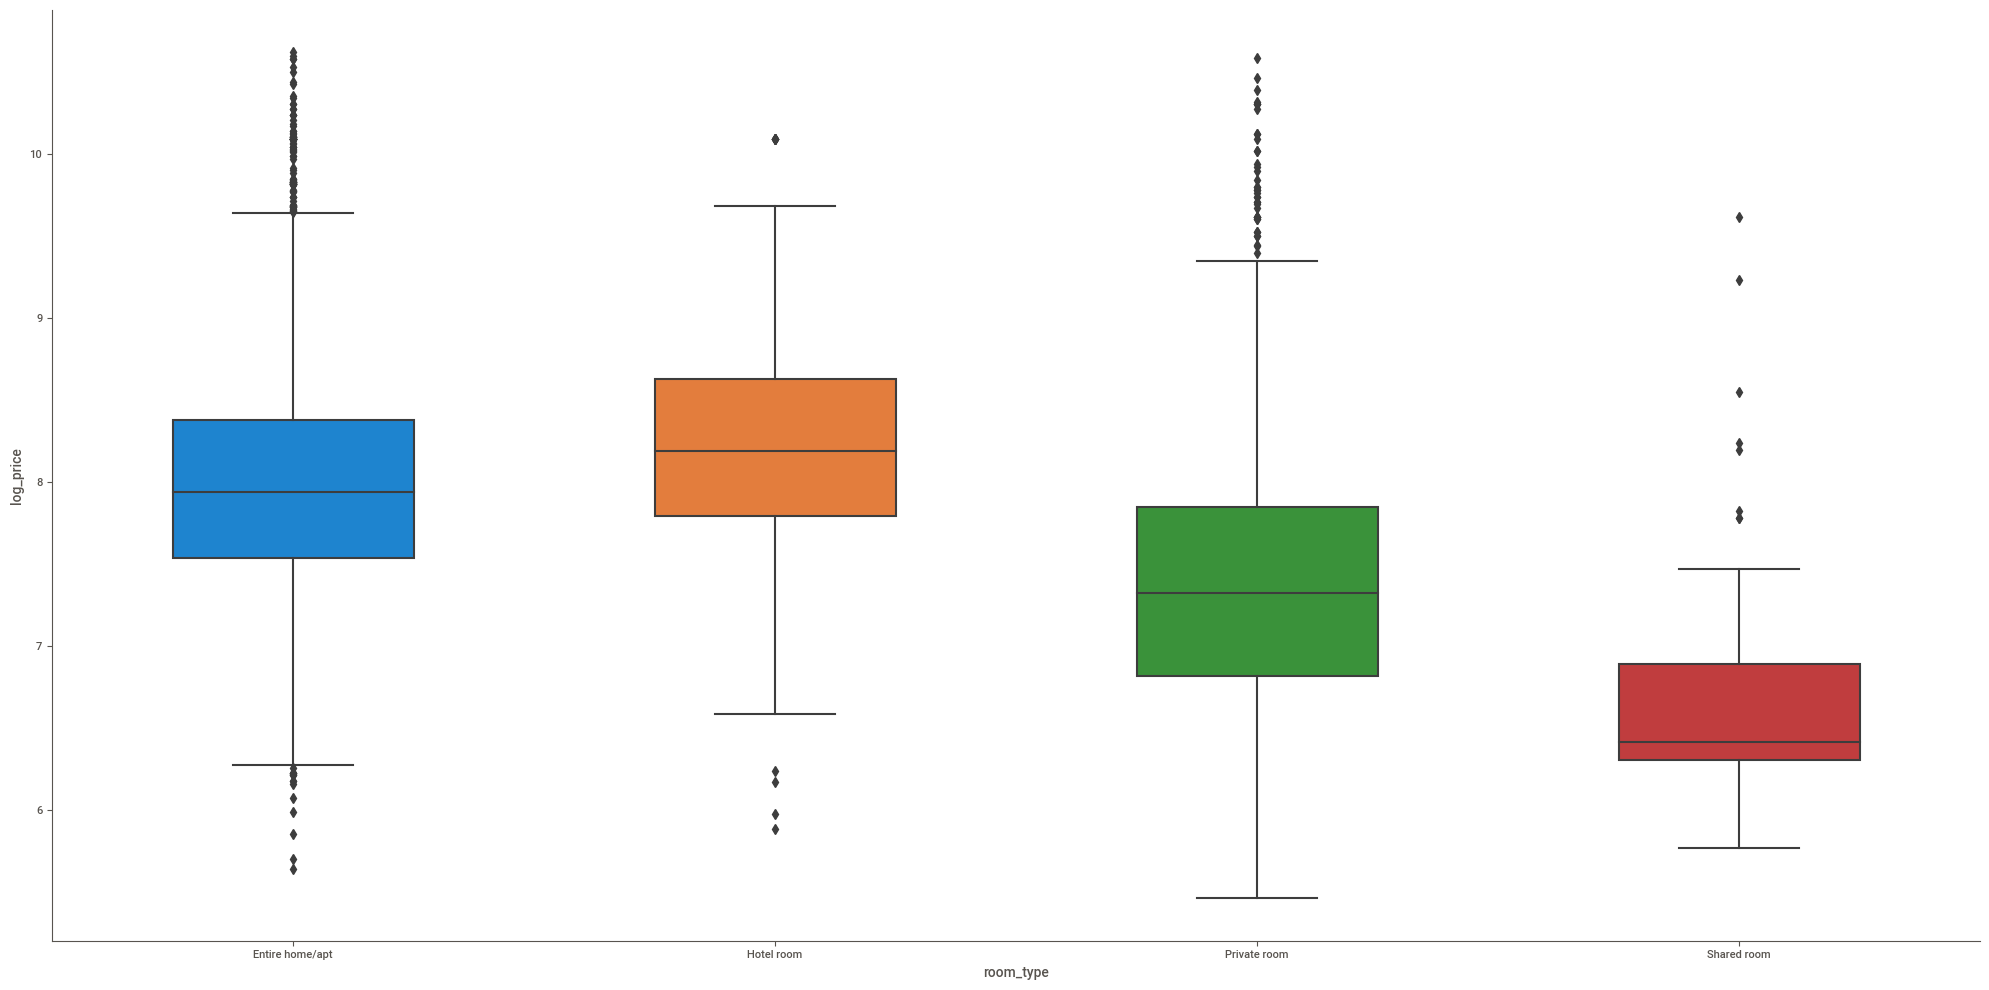

In [ ]:
#zależność ceny apartamentu od jego rodzaju
sns.catplot(
    data=df,
    x='room_type', y='log_price', kind='box',
    height=10, aspect=2, width=0.5
)

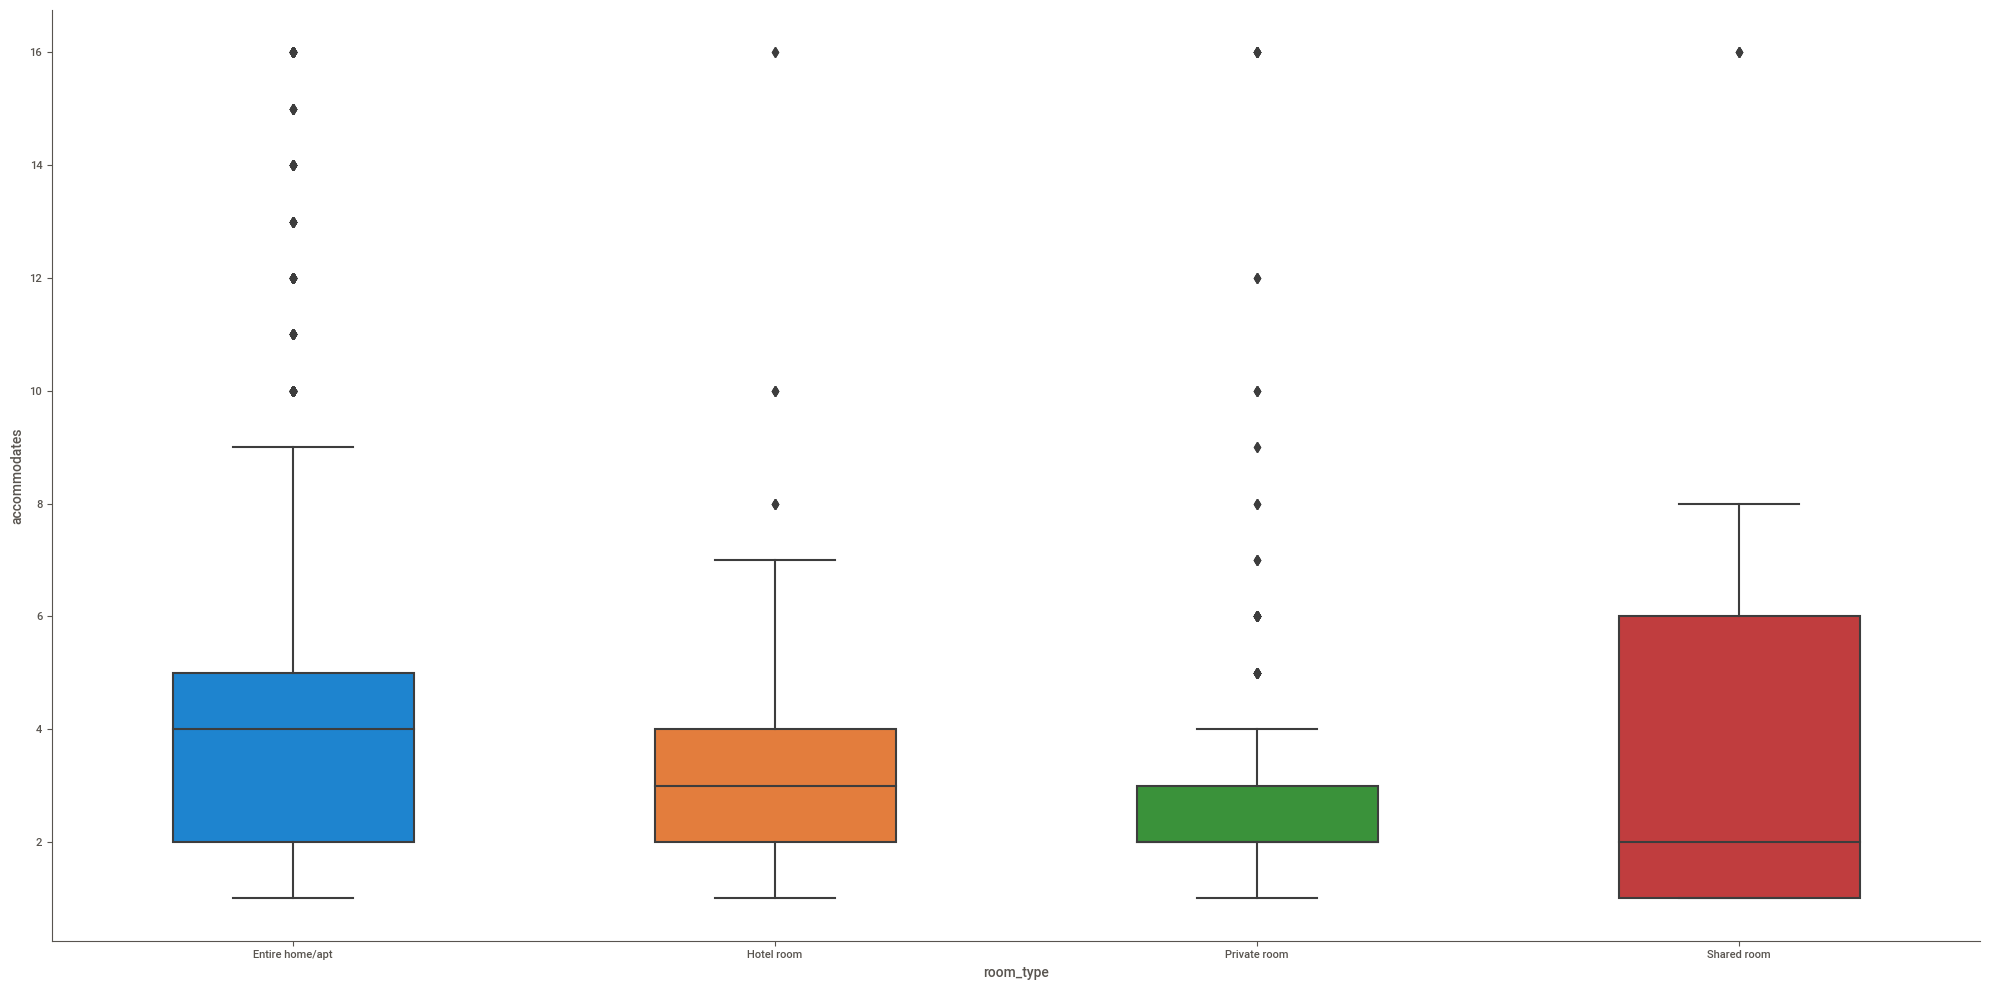

In [ ]:
#zależność liczby gości od rodzaju apartamentu
sns.catplot(
    data=df,
    x='room_type', y='accommodates', kind='box',
    height=10, aspect=2, width=0.5
)

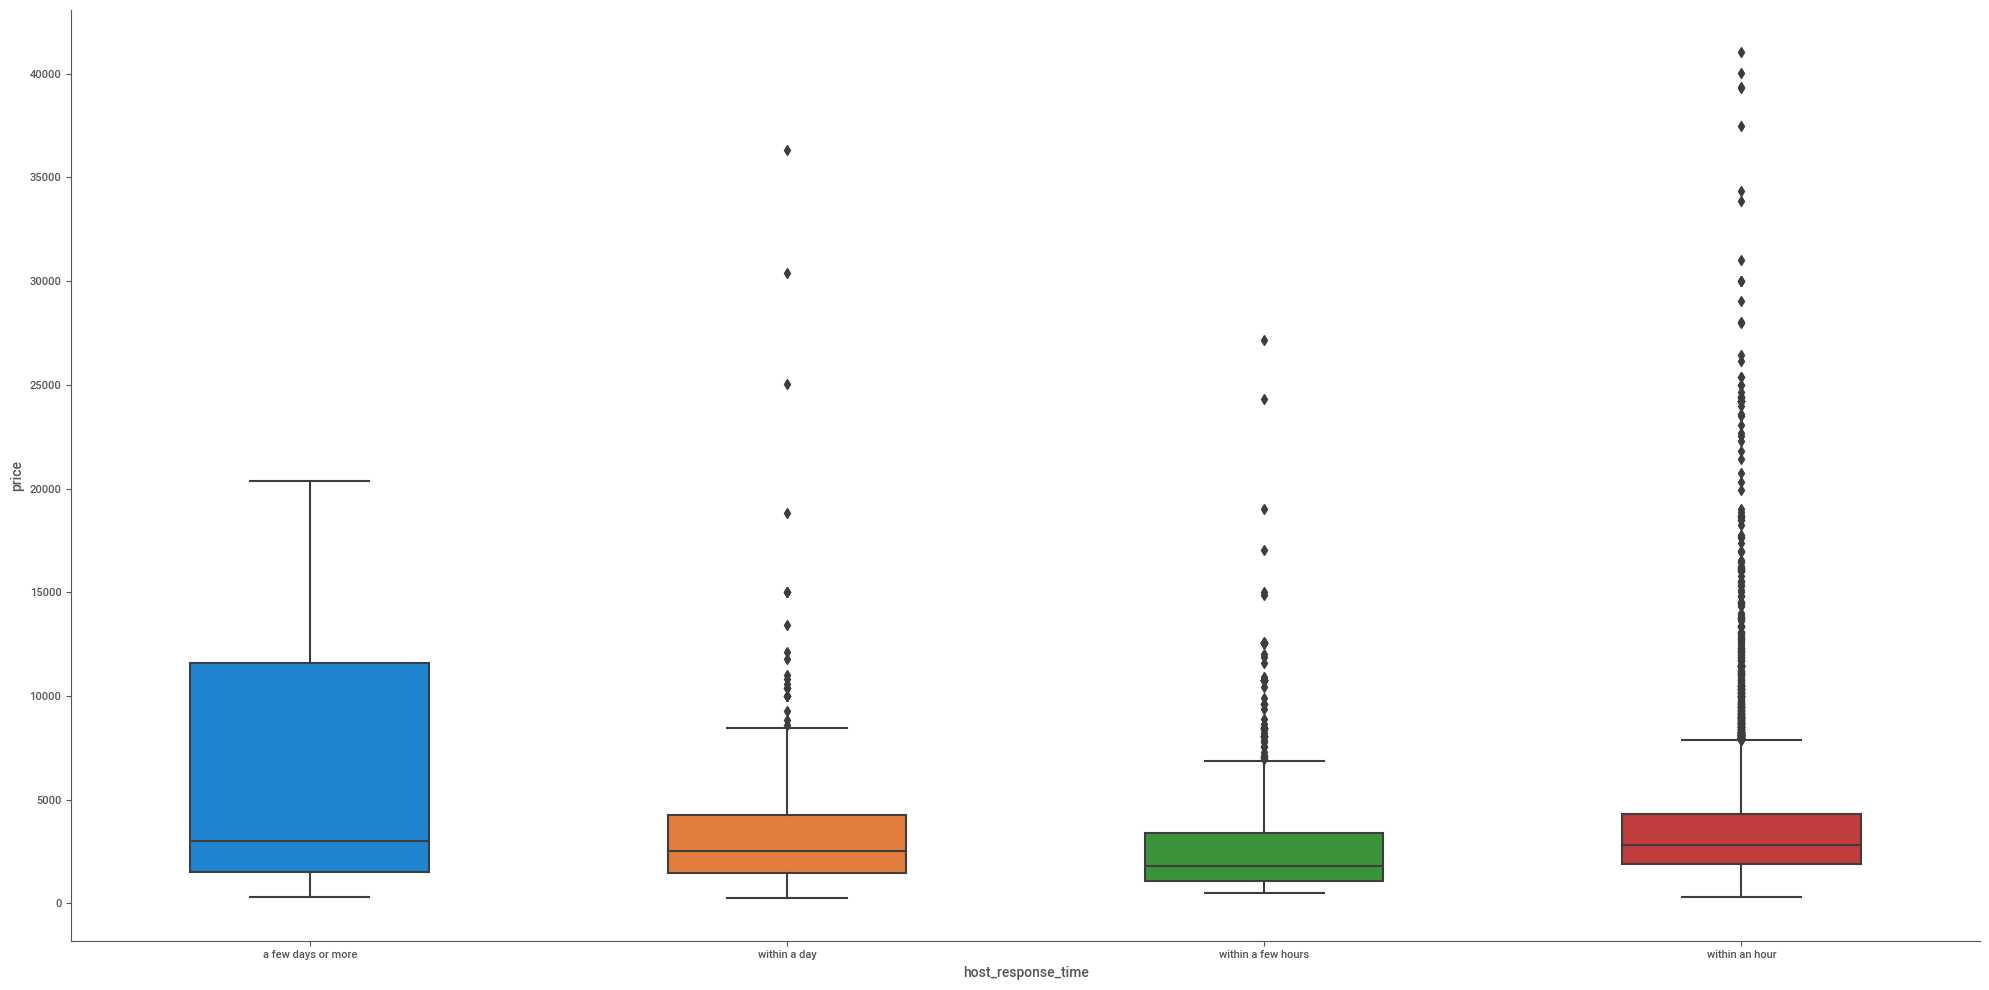

In [ ]:
#zależność ceny od czasu odpowiedzi hosta
sns.catplot(
    data=df,
    x='host_response_time', y='price', kind='box',
    height=10, aspect=2, width=0.5
)

In [ ]:
#model liniowy dla zmiennej kategorycznej host_response_time objaśniającej zmienną price
model = smf.ols('price ~ host_response_time', data=df).fit() #R-squared: 0.017

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     38.30
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.56e-24
Time:                        18:05:30   Log-Likelihood:                -64950.
No. Observations:                6794   AIC:                         1.299e+05
Df Residuals:                    6790   BIC:                         1.299e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
#model liniowy dla zmiennej kategorycznej room_type objaśniającej zmienną price
model2 = smf.ols('price ~ room_type', data=df).fit() #R-squared: 0.024

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     65.23
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.18e-41
Time:                        18:05:32   Log-Likelihood:                -75234.
No. Observations:                7834   AIC:                         1.505e+05
Df Residuals:                    7830   BIC:                         1.505e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             